# *AOML - Project*
## Medical Insurance Fraud Detection
### S040 - Imaz Shaikh
### S042 - Vikramaditya Singhai

In [1]:
!pip install shutup

# *Imports*

In [2]:
import warnings
warnings.filterwarnings('ignore')
import shutup
shutup.please()
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
import time
import optuna
from xgboost import  XGBRegressor, plot_importance
from catboost import  CatBoostRegressor
from lightgbm import  LGBMRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import  LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# *About The Data :* 
# The data set contains information about the last 79210 claim payments made.

* #### Amount - Amount of the claim payment in dollars
* #### Severity - The severity rating of damage to the patient, from 1 (emotional trauma) to 9 (death)
* #### Age - Age of the claimant in years
* #### Private Attorney - Whether the claimant was represented by a private attorney
* #### Marital Status - Marital status of the claimant
* #### Specialty - Specialty of the physician involved in the lawsuit
* #### Insurance - Type of medical insurance carried by the patient
* #### Gender - Patient Gender

In [3]:
df = pd.read_csv('medicalmalpractice.csv')

In [4]:
df

,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
0,57041,7,62,1,2,Family Practice,Private,Male
1,324976,6,38,1,2,OBGYN,No Insurance,Female
2,135383,4,34,1,2,Cardiology,Unknown,Male
3,829742,7,42,1,1,Pediatrics,No Insurance,Female
4,197675,3,60,0,2,OBGYN,Medicare/Medicaid,Female
...,...,...,...,...,...,...,...,...
79205,25305,4,64,1,2,General Surgery,Unknown,Male
79206,43098,3,87,0,4,Orthopedic Surgery,Unknown,Male
79207,35398,3,81,0,4,Anesthesiology,Unknown,Male
79208,154228,9,19,0,4,Dermatology,Unknown,Female


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79210 entries, 0 to 79209
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Amount            79210 non-null  int64 
 1   Severity          79210 non-null  int64 
 2   Age               79210 non-null  int64 
 3   Private Attorney  79210 non-null  int64 
 4   Marital Status    79210 non-null  int64 
 5   Specialty         79210 non-null  object
 6   Insurance         79210 non-null  object
 7   Gender            79210 non-null  object
dtypes: int64(5), object(3)
memory usage: 4.8+ MB


In [6]:
df.describe()

,Amount,Severity,Age,Private Attorney,Marital Status
count,79210.000000,79210.000000,79210.000000,79210.000000,79210.000000
mean,157484.554816,4.799659,42.701868,0.660889,1.889559
std,193135.093293,2.083439,19.811063,0.473411,1.002502
min,1576.000000,1.000000,0.000000,0.000000,0.000000
25%,43670.250000,3.000000,28.000000,0.000000,1.000000
50%,98131.000000,4.000000,43.000000,1.000000,2.000000
75%,154675.250000,7.000000,58.000000,1.000000,2.000000
max,926411.000000,9.000000,87.000000,1.000000,4.000000


In [7]:
new_column_names = {'Private Attorney': 'Private_Attorney', 'Marital Status': 'Marital_Status'}
df.rename(columns=new_column_names, inplace=True)
df

,Amount,Severity,Age,Private_Attorney,Marital_Status,Specialty,Insurance,Gender
0,57041,7,62,1,2,Family Practice,Private,Male
1,324976,6,38,1,2,OBGYN,No Insurance,Female
2,135383,4,34,1,2,Cardiology,Unknown,Male
3,829742,7,42,1,1,Pediatrics,No Insurance,Female
4,197675,3,60,0,2,OBGYN,Medicare/Medicaid,Female
...,...,...,...,...,...,...,...,...
79205,25305,4,64,1,2,General Surgery,Unknown,Male
79206,43098,3,87,0,4,Orthopedic Surgery,Unknown,Male
79207,35398,3,81,0,4,Anesthesiology,Unknown,Male
79208,154228,9,19,0,4,Dermatology,Unknown,Female


## Conversion Of Num To String For OneHotEncoding

In [8]:
df['Private_Attorney'].replace(0, 'Not Private', inplace=True)
df['Private_Attorney'].replace(1, 'Private', inplace=True)

df['Marital_Status'].replace(0, 'Divorced', inplace=True)
df['Marital_Status'].replace(1, 'Single', inplace=True)
df['Marital_Status'].replace(2, 'Married', inplace=True)
df['Marital_Status'].replace(3, 'Widowed', inplace=True)
df['Marital_Status'].replace(4, 'Unknown', inplace=True)

# *EDA*

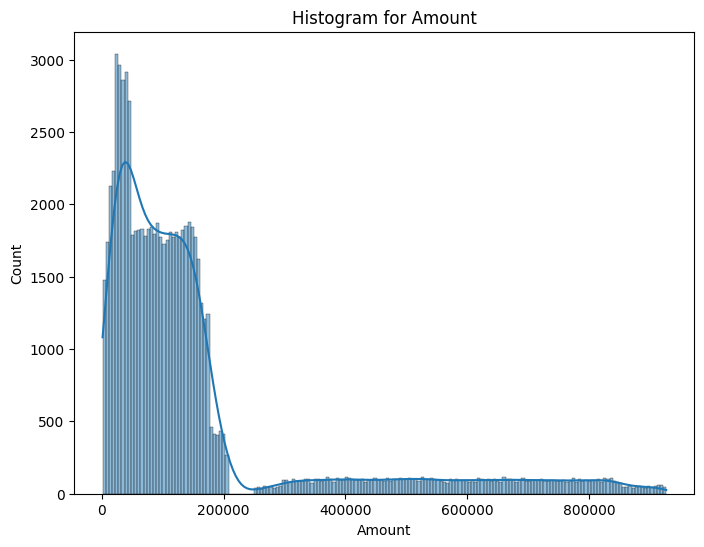

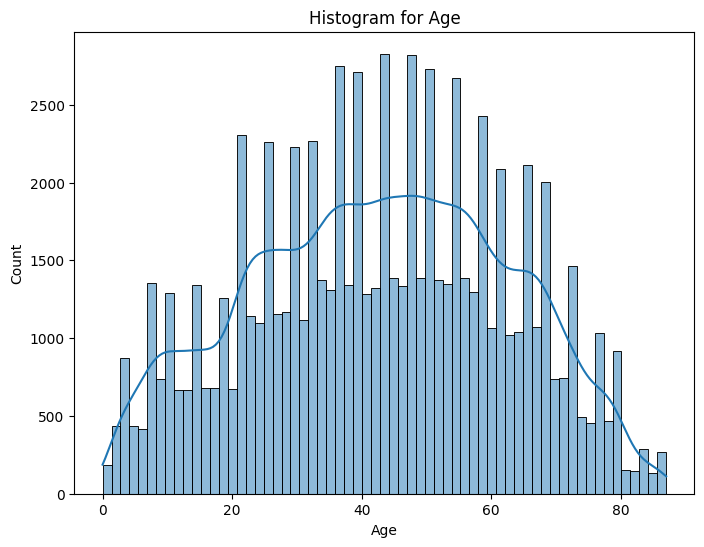

In [9]:
numeric_columns = ['Amount', 'Age']
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Histogram for {column}')
    plt.show()

* Histogram Of Amount Shows That The Majority of the values are Skewed To The Left. The amount greater than 154675.250000 are the outliers in our data. If we drop these values there would be reduction of 25% in our data.
* Also as the 'Amount' is our target variable it cannot be standardized.
* The Histogram Of Age Shows that the ages are ranging from New Borns to As High as 87 years Old. This is however normally distributed.

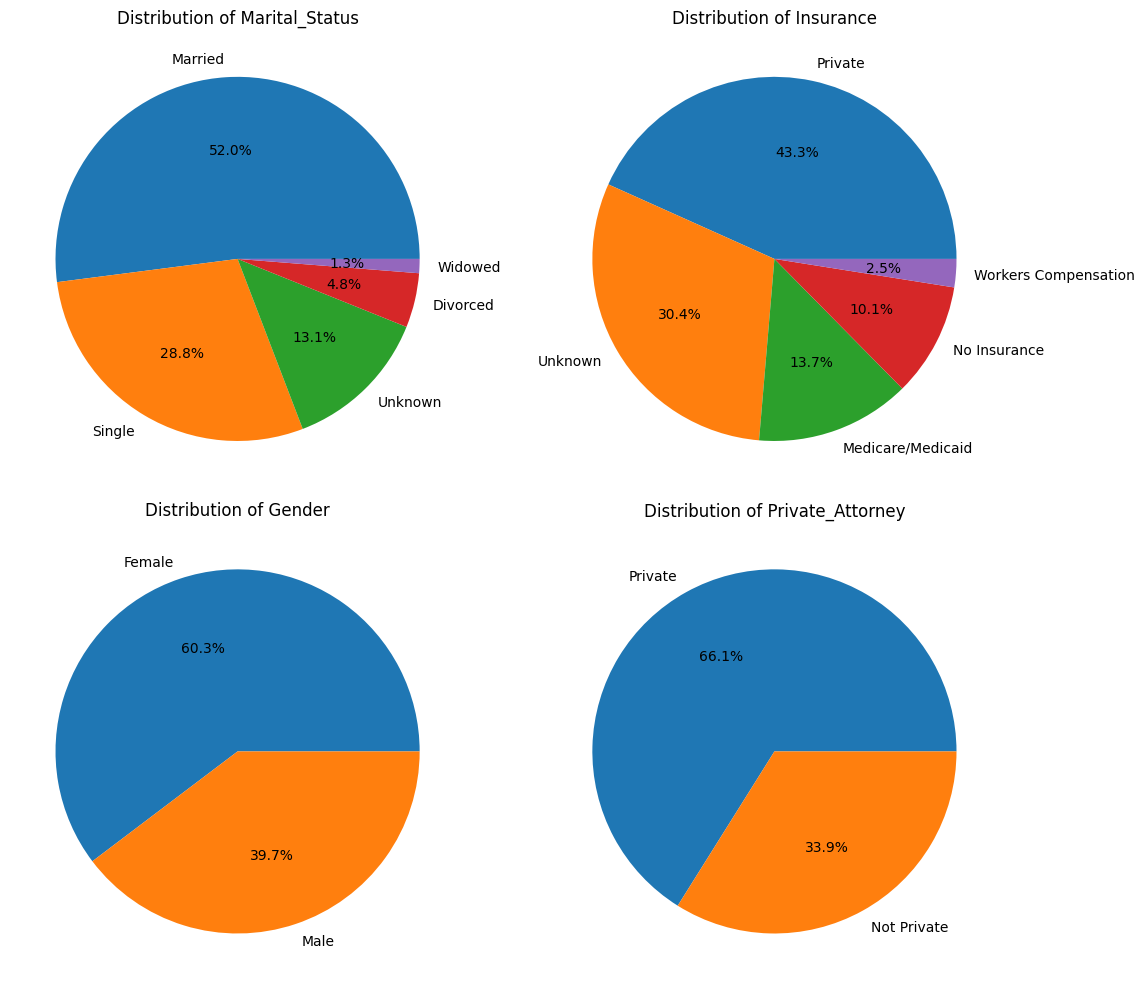

In [10]:
categorical_columns = ['Marital_Status', 'Insurance', 'Gender', 'Private_Attorney']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, (column, ax) in enumerate(zip(categorical_columns, axes.flat)):
    category_counts = df[column].value_counts()
    ax.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=0)
    ax.set_title(f'Distribution of {column}')

plt.tight_layout()

plt.show()

Distribution of Marital_Status:
* The majority (around 52%) are married.
* Around 30% are single.
* There are smaller percentages of divorced and unknown marital statuses (around 13% and 5%, respectively).

Distribution of Insurance:
* There seems to be a relatively even split between those with insurance (around 43%) and those without or a different form of it (around 57%).

Distribution of Gender:
* The data seems to be slightly skewed towards females (around 60%).
* Males make up around 40%.

Distribution of Private_Attorney:
* There appears to be a larger proportion with a private attorney (around 66%).
* Roughly one-third (around 34%) don't have a private attorney.

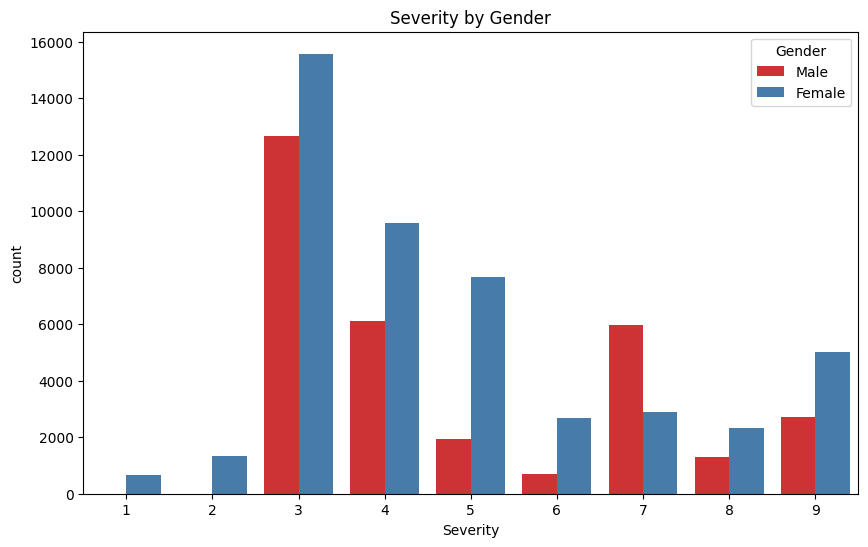

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Severity', hue='Gender', palette='Set1')
plt.title('Severity by Gender')
plt.show()

This Shows that Females Have Reported A Fraud More Times In Most Of The Severity Levels As Compared To Males.

In [12]:
gender_amt = df.groupby('Gender').describe()['Amount']
gender_amt.transpose()

Gender,Female,Male
count,47770.000000,31440.000000
mean,150957.808290,167401.306775
std,159467.182911,234897.588948
min,1578.000000,1576.000000
25%,63112.500000,28414.250000
50%,111449.500000,66576.500000
75%,159819.500000,142946.250000
max,851373.000000,926411.000000


There Is Very Minimal Difference In The Amount That is Payed By Both Males & Females And Majority Of The Payments Fall Under $160000

# *MODELLING*

In [13]:
categorical = ['Private_Attorney', 'Marital_Status', 'Specialty', 'Insurance', 'Gender']
df_final = pd.get_dummies(df, columns=categorical)
df_final

,Amount,Severity,Age,Private_Attorney_Not Private,Private_Attorney_Private,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Marital_Status_Widowed,...,Specialty_Resident,Specialty_Thoracic Surgery,Specialty_Urological Surgery,Insurance_Medicare/Medicaid,Insurance_No Insurance,Insurance_Private,Insurance_Unknown,Insurance_Workers Compensation,Gender_Female,Gender_Male
0,57041,7,62,False,True,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,324976,6,38,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,135383,4,34,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,829742,7,42,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
4,197675,3,60,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79205,25305,4,64,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
79206,43098,3,87,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
79207,35398,3,81,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
79208,154228,9,19,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [14]:
# To Test If Standardizing Yields Better Results

In [15]:
# categorical = ['Private_Attorney', 'Marital_Status', 'Specialty', 'Insurance', 'Gender']
# df_final = pd.get_dummies(df, columns=categorical, drop_first = True)
# df_final['Amount'] = StandardScaler().fit_transform(df[['Amount']])
# df_final

In [16]:
# To Remove The Outlier Values In Amount But Removes 25% Of The Data

In [17]:
# categorical = ['Private_Attorney', 'Marital_Status', 'Specialty', 'Insurance', 'Gender']
# df_final = pd.get_dummies(df, columns=categorical)
# df_final = df_final[df_final['Amount'] <= 154675.25]
# df_final

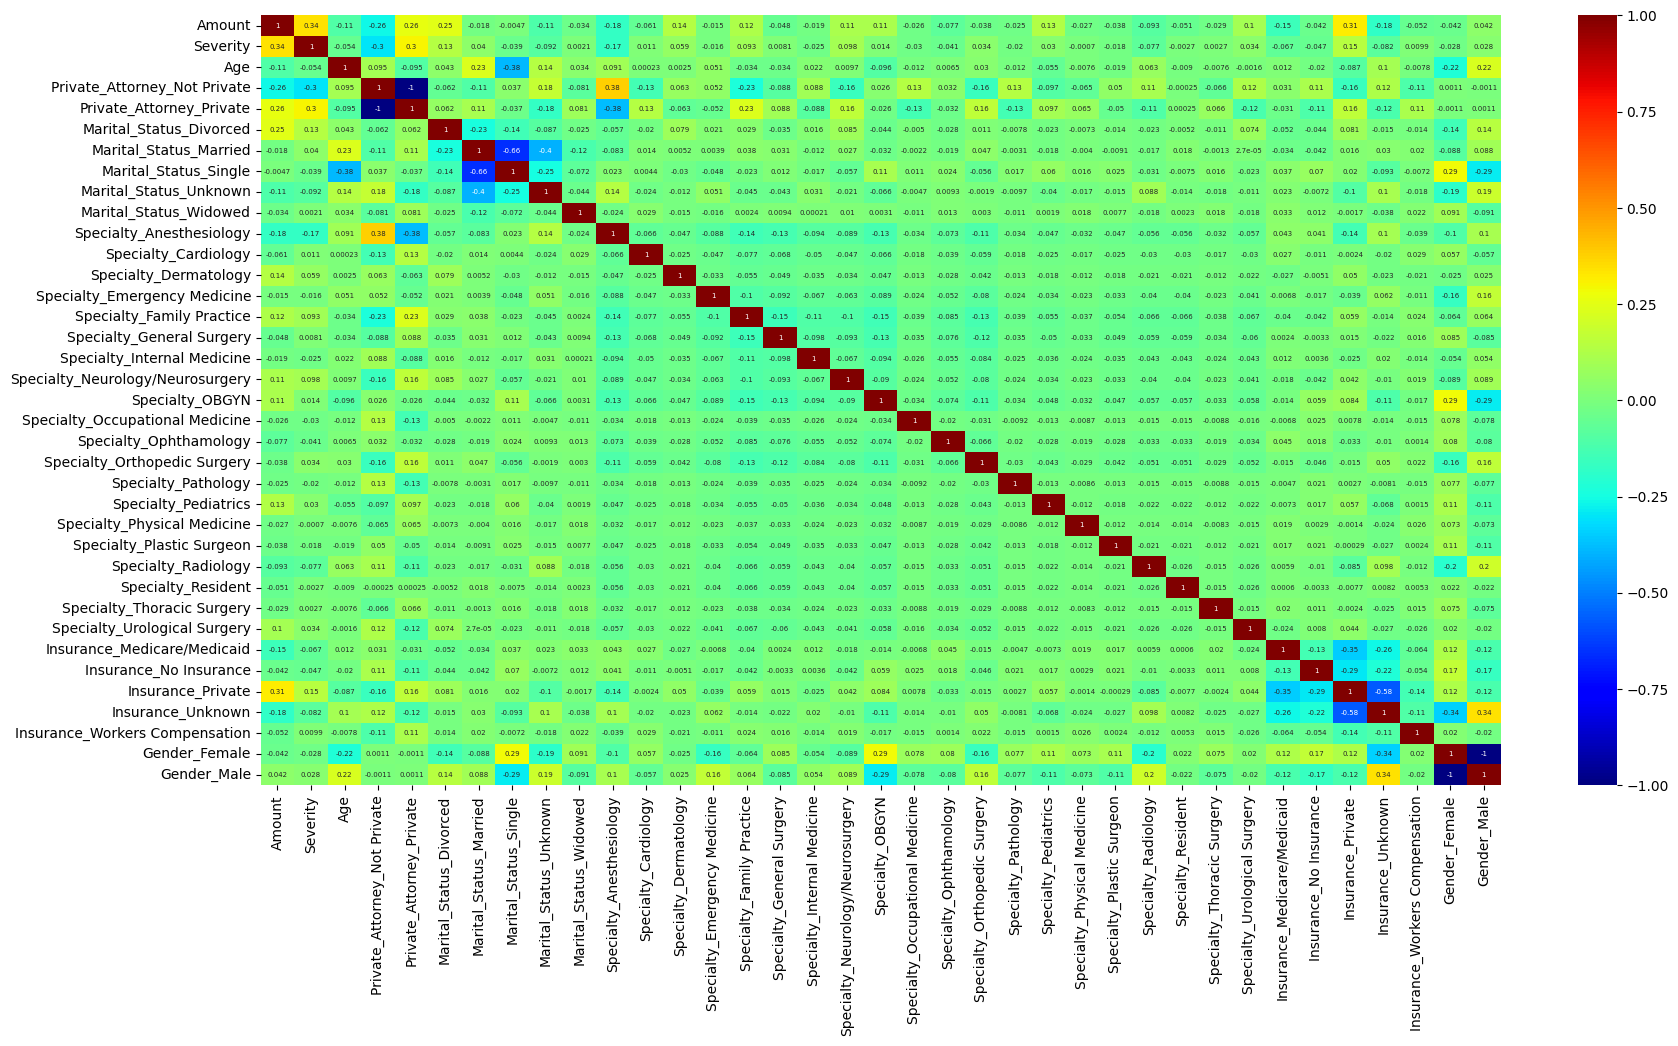

In [18]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_final.corr(), cmap='jet', annot=True, annot_kws={"size": 5})
plt.show()

In [19]:
x = df_final.drop(["Amount"],axis=1)
y = df_final['Amount']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

# *Base Testing*

## DECISION TREE BASE

In [21]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

dt_pred = dt_model.predict(x_test)
print('Root Mean Squared Error: ',mean_squared_error(y_test,dt_pred)**0.5)
print('R Square: ',r2_score(y_test,dt_pred))

Root Mean Squared Error:  139369.4841730343
R Square:  0.4913004264081301


## RANDOM FOREST BASE

In [22]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

rf_pred = rf_model.predict(x_test)
print('Root Mean Squared Error: ',mean_squared_error(y_test,rf_pred)**0.5)
print('R Square: ',r2_score(y_test,rf_pred))

Root Mean Squared Error:  127395.28754313296
R Square:  0.5749571498993806


## GRADIENT BOOST BASE

In [23]:
gb_model = GradientBoostingRegressor(random_state=0)
gb_model.fit(x_train, y_train)
gb_pred = gb_model.predict(x_test)

print('Root Mean Squared Error: ', mean_squared_error(y_test, gb_pred)**0.5)
print('R Square: ', r2_score(y_test, gb_pred))

Root Mean Squared Error:  136690.51612972806
R Square:  0.5106689717871641


## LIGHTGBM BASE

In [24]:
lgbm_model = LGBMRegressor()
lgbm_model.fit(x_train,y_train)

lgbm_pred = lgbm_model.predict(x_test)
print('Root Mean Squared Error: ',mean_squared_error(y_test,lgbm_pred)**0.5)
print('R Square: ',r2_score(y_test,lgbm_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 166
[LightGBM] [Info] Number of data points in the train set: 63368, number of used features: 36
[LightGBM] [Info] Start training from score 156908.754640
Root Mean Squared Error:  116561.10761989614
R Square:  0.6441775713644352


## XGB MODEL BASE

In [25]:
xgb_model = XGBRegressor()
xgb_model.fit(x_train,y_train)

xgb_pred = xgb_model.predict(x_test)
print('Root Mean Squared Error: ',mean_squared_error(y_test,xgb_pred)**0.5)
print('R Square: ',r2_score(y_test,xgb_pred))
print("Mean Absolute Error: " + str(mean_absolute_error(xgb_pred, y_test)))

Root Mean Squared Error:  117345.93077461852
R Square:  0.6393698301153754
Mean Absolute Error: 73528.60413283059


### We Will use XGB & LGBM for further testing as these are yielding the best results as of now on base models. The other models can be used and will be approached later as we may also try stacking. For now we try to get the best most score from these params with hyperparameter optimization

# *Hyperparameter Tuning With Modeling*

## Cross Validation With XGB
#### Basic Test As Base Model Was Not Giving Optimal Accuracy

In [26]:
# model = XGBRegressor()
# cv_scores = cross_val_score(model, x, y, cv=100, scoring='r2')

# print("Cross-Validation R-squared Scores:", cv_scores)

# mean_r2 = cv_scores.mean()
# print("Mean R-squared Score:", mean_r2)

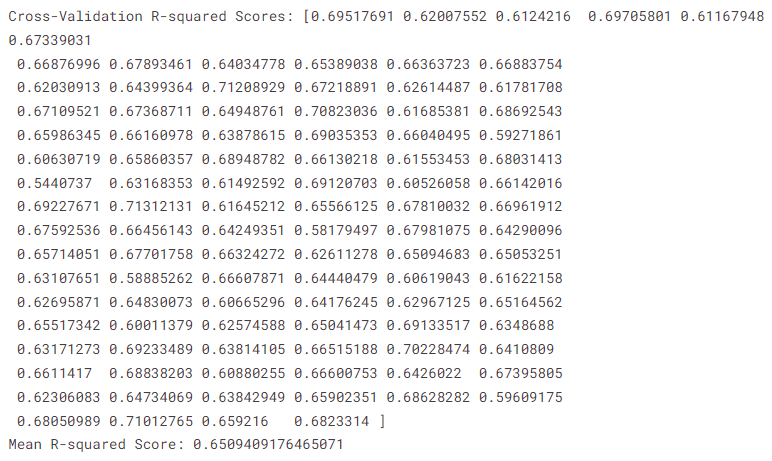

## XGB WITH RANDOMIZED SEARCH FOR PARAM RANGES

In [27]:
# param_grid = {
#     'n_estimators': range(100, 1000, 200), 
#     'learning_rate': [0.01, 0.05, 0.1],   
#     'max_depth': [3, 5, 8, 12],    
#     'min_child_weight': [1, 5, 10],
#     'gamma': [0, 0.5, 1],          
#     'reg_alpha': [0, 0.1, 1],       
#     'reg_lambda': [0, 0.1, 1],     
# }

# xgb_model = XGBRegressor(objective='reg:squarederror', verbosity=1) 

# rnd_search = RandomizedSearchCV(xgb_model, param_grid, n_iter=5, scoring='r2', cv=3, random_state=42, n_jobs=-1)

# rnd_search.fit(x_train, y_train)  

# print("Best parameters:", rnd_search.best_params_)
# best_model = rnd_search.best_estimator_

# best_model_pred = best_model.predict(x_test)
# print('Root Mean Squared Error (Best Model): ', mean_squared_error(y_test, best_model_pred)**0.5)
# print('R Square (Best Model): ', r2_score(y_test, best_model_pred))

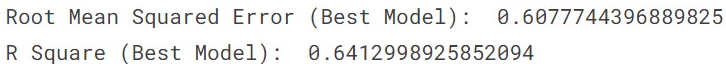

## XGB WITH OPTUNA
#### Values Tuned With Results Taken From Randomized Search For XGB

In [28]:
# def objective(trial, x_train, y_train):
#     param_grid = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 150),
#         'learning_rate': trial.suggest_float('learning_rate', 0.03, 0.07),
#         'num_leaves': trial.suggest_int('num_leaves', 80, 100),
#         'max_depth': trial.suggest_categorical('max_depth', [1, 5, 8]),
#         'lambda_l1': trial.suggest_float('lambda_l1', 0, 0.05),
#         'lambda_l2': trial.suggest_float('lambda_l2', 0, 0.2),
#     }

#     xgb_model = XGBRegressor(verbose=0, **param_grid)
#     xgb_model.fit(x_train, y_train)
#     preds = xgb_model.predict(x_test)

#     r2 = r2_score(y_test, preds)
#     return r2

# study = optuna.create_study(study_name='XGB OPTUNA', direction='maximize')
# study.optimize(lambda trial: objective(trial, x_train, y_train), n_trials=10)

# best_params = study.best_params
# best_model = XGBRegressor(verbose=0, **best_params)
# best_model.fit(x_train, y_train)

# best_model_pred = best_model.predict(x_test)
# print('Root Mean Squared Error (Best Model): ', np.sqrt(mean_squared_error(y_test, best_model_pred)))
# print('R Square (Best Model): ', r2_score(y_test, best_model_pred))

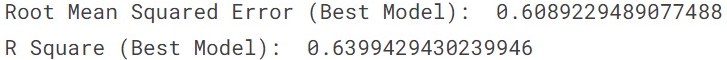

## Cross Validation With LGBM
#### Basic Test As Base Model Was Not Giving Optimal Accuracy

In [29]:
# model = LGBMRegressor(verbose=0)
# cv_scores = cross_val_score(model, x, y, cv=100, scoring='r2')

# print("Cross-Validation R-squared Scores:", cv_scores)

# mean_r2 = cv_scores.mean()
# print("Mean R-squared Score:", mean_r2)

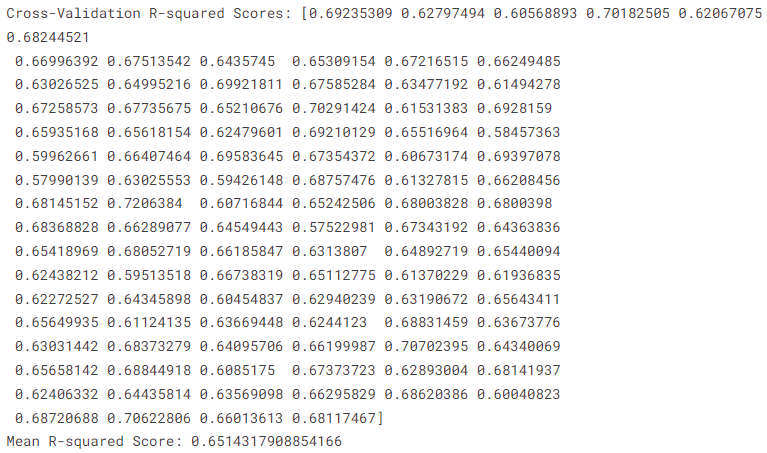

## LGBM WITH RANDOMIZED SEARCH FOR PARAM RANGES

In [30]:
# param_grid = {
#     'n_estimators': range(100, 1000, 200),
#     'learning_rate': [0.01, 0.05, 0.1],
#     'num_leaves': [31, 60, 90, 120],
#     'max_depth': [-1, 5, 8, 12],
#     'min_data_in_leaf': [20, 50, 100],
#     'lambda_l1': [0, 0.1, 1],
#     'lambda_l2': [0, 0.1, 1],
# }
# lgb_model = LGBMRegressor(verbose=0)

# rnd_search = RandomizedSearchCV(lgb_model, param_grid, n_iter=10, 
#                                 scoring='r2', cv=5, random_state=42, n_jobs=-1) 

# rnd_search.fit(x_train, y_train) 

# print("Best parameters:", rnd_search.best_params_)
# best_model = rnd_search.best_estimator_

# best_model_pred = best_model.predict(x_test)
# print('Root Mean Squared Error (Best Model): ', mean_squared_error(y_test, best_model_pred)**0.5)
# print('R Square (Best Model): ', r2_score(y_test, best_model_pred))

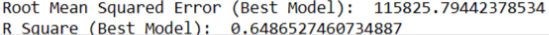

## LGBM WITH GRID SEARCH FOR BASIC HYPERPARAM TUNING
#### Values Tuned With Results From Randomized Search

In [31]:
# param_grid = {
#     'n_estimators': range(500, 1000, 100),
#     'learning_rate': [0.01, 0.05, 0.1],
#     'num_leaves': range(90, 180, 10),
#     'max_depth': [-1, 3, 5, 7, 9, 12, 15, 25],
#     'min_child_weight': [1, 3, 5, 7, 15, 25],
#     'reg_alpha': [0, 0.1],
#     'reg_lambda': [0, 0.1],
# }
# lgb_model = LGBMRegressor(verbose=1)

# grid_search = GridSearchCV(lgb_model, param_grid, scoring='r2', cv=5, n_jobs=-1)

# grid_search.fit(x_train, y_train)

# print("Best parameters:", grid_search.best_params_)
# best_model = grid_search.best_estimator_

# best_model_pred = best_model.predict(x_test)
# print('Root Mean Squared Error (Best Model): ', np.sqrt(mean_squared_error(y_test, best_model_pred)))
# print('R Square (Best Model): ', r2_score(y_test, best_model_pred))

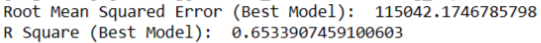

## LGBM WITH OPTUNA TUNING

In [32]:
# import optuna
# from lightgbm import LGBMRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# def objective(trial, x_train, y_train):
#     param_grid = {
#         'num_leaves': trial.suggest_int('num_leaves', 40, 80),
#         'n_estimators': trial.suggest_int('n_estimators', 200, 400),
#         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 30, 70),
#         'max_depth': trial.suggest_categorical('max_depth', [-1, 5, 8, 12]),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.2),
#         'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.5, 2.0),
#         'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.5, 2.0)
#     }

#     lgb_model = LGBMRegressor(verbose=0, **param_grid)
#     lgb_model.fit(x_train, y_train)
#     preds = lgb_model.predict(x_test)

#     r2 = r2_score(y_test, preds)
#     return r2

# study = optuna.create_study(study_name='LGBM OPTUNA', direction='maximize')
# study.optimize(lambda trial: objective(trial, x_train, y_train), n_trials=500)

# best_params = study.best_params
# best_model = LGBMRegressor(verbose=0, **best_params)
# best_model.fit(x_train, y_train)

# best_model_pred = best_model.predict(x_test)
# print('Root Mean Squared Error (Best Model): ', np.sqrt(mean_squared_error(y_test, best_model_pred)))
# print('R Square (Best Model): ', r2_score(y_test, best_model_pred))

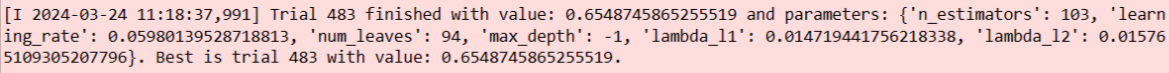

# *Model Stacking*

## MODEL STACKING : BASE LEARNER - XGB & LGBM, META LEARNER - LinearRegressor

In [33]:
# import optuna
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# import numpy as np

# def xgb_objective(trial):
#     param_grid = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 150),
#         'learning_rate': trial.suggest_float('learning_rate', 0.03, 0.07),
#         'num_leaves': trial.suggest_int('num_leaves', 80, 100),
#         'max_depth': trial.suggest_categorical('max_depth', [1, 5, 8]),
#         'lambda_l1': trial.suggest_float('lambda_l1', 0, 0.05),
#         'lambda_l2': trial.suggest_float('lambda_l2', 0, 0.2),
#     }
#     model = XGBRegressor(**param_grid)
#     model.fit(x_train, y_train)
#     preds = model.predict(x_test)
#     return r2_score(y_test, preds)

# with warnings.catch_warnings():
#     warnings.filterwarnings("ignore", message="No further splits with positive gain, best gain: -inf")

#     def lgbm_objective(trial):
#         param_grid = {
#             'num_leaves': trial.suggest_int('num_leaves', 80, 160),
#             'n_estimators': trial.suggest_int('n_estimators', 200, 400),
#             'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 20, 60),
#             'max_depth': trial.suggest_categorical('max_depth', [-1, 5, 8, 12]),
#             'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.2),
#             'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.5, 2.0),
#             'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.5, 2.0)
#         }
#         model = LGBMRegressor(**param_grid)
#         model.fit(x_train, y_train)
#         preds = model.predict(x_test)
#         return r2_score(y_test, preds)

# xgb_study = optuna.create_study(study_name='XGB OPTUNA', direction='maximize')
# xgb_study.optimize(xgb_objective, n_trials=400)

# lgbm_study = optuna.create_study(study_name='LGBM OPTUNA', direction='maximize')
# lgbm_study.optimize(lgbm_objective, n_trials=400)

# best_xgb_params = xgb_study.best_params
# best_xgb_model = XGBRegressor(**best_xgb_params)
# best_xgb_model.fit(x_train, y_train)

# best_lgbm_params = lgbm_study.best_params
# best_lgbm_model = LGBMRegressor(**best_lgbm_params)
# best_lgbm_model.fit(x_train, y_train)

# xgb_preds = best_xgb_model.predict(x_test)
# lgbm_preds = best_lgbm_model.predict(x_test)

# stacked_features_train = np.column_stack((xgb_preds, lgbm_preds))

# meta_learner = LinearRegression()
# meta_learner.fit(stacked_features_train, y_test)

# stacked_features_test = np.column_stack((best_xgb_model.predict(x_test), best_lgbm_model.predict(x_test)))
# stacked_predictions = meta_learner.predict(stacked_features_test)

# print('Linear Regression As Meta Evaluation : ')
# print('Root Mean Squared Error (Stacked Model): ', np.sqrt(mean_squared_error(y_test, stacked_predictions)))
# print('R Square (Stacked Model): ', r2_score(y_test, stacked_predictions))

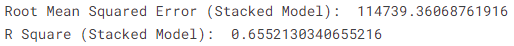

## MODEL STACKING : BASE LEARNER - XGB & LGBM, META LEARNER - RandomForestRegressor

In [34]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np

def xgb_objective(trial):
    param_grid = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 150),
        'learning_rate': trial.suggest_float('learning_rate', 0.03, 0.07),
        'num_leaves': trial.suggest_int('num_leaves', 80, 100),
        'max_depth': trial.suggest_categorical('max_depth', [1, 5, 8]),
        'lambda_l1': trial.suggest_float('lambda_l1', 0, 0.05),
        'lambda_l2': trial.suggest_float('lambda_l2', 0, 0.2),
    }
    model = XGBRegressor(**param_grid)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    return r2_score(y_test, preds)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="No further splits with positive gain, best gain: -inf")

    def lgbm_objective(trial):
        param_grid = {
            'num_leaves': trial.suggest_int('num_leaves', 80, 160),
            'n_estimators': trial.suggest_int('n_estimators', 200, 400),
            'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 20, 60),
            'max_depth': trial.suggest_categorical('max_depth', [-1, 5, 8, 12]),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.2),
            'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.5, 2.0),
            'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.5, 2.0)
        }
        model = LGBMRegressor(**param_grid)
        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        return r2_score(y_test, preds)

xgb_study = optuna.create_study(study_name='XGB OPTUNA', direction='maximize')
xgb_study.optimize(xgb_objective, n_trials=400)

lgbm_study = optuna.create_study(study_name='LGBM OPTUNA', direction='maximize')
lgbm_study.optimize(lgbm_objective, n_trials=400)

best_xgb_params = xgb_study.best_params
best_xgb_model = XGBRegressor(**best_xgb_params)
best_xgb_model.fit(x_train, y_train)

best_lgbm_params = lgbm_study.best_params
best_lgbm_model = LGBMRegressor(**best_lgbm_params)
best_lgbm_model.fit(x_train, y_train)

xgb_preds = best_xgb_model.predict(x_test)
lgbm_preds = best_lgbm_model.predict(x_test)

stacked_features_train = np.column_stack((xgb_preds, lgbm_preds))

meta_learner = RandomForestRegressor()
meta_learner.fit(stacked_features_train, y_test)

stacked_features_test = np.column_stack((best_xgb_model.predict(x_test), best_lgbm_model.predict(x_test)))
stacked_predictions = meta_learner.predict(stacked_features_test)

print('Random Forest Regressor As Meta Evaluation : ')
print('Root Mean Squared Error (Stacked Model): ', np.sqrt(mean_squared_error(y_test, stacked_predictions)))
print('R Square (Stacked Model): ', r2_score(y_test, stacked_predictions))

[I 2024-04-06 11:16:37,882] A new study created in memory with name: XGB OPTUNA
[I 2024-04-06 11:16:38,984] Trial 0 finished with value: 0.2187530053872293 and parameters: {'n_estimators': 64, 'learning_rate': 0.03442255775871442, 'num_leaves': 98, 'max_depth': 1, 'lambda_l1': 0.023347583973595293, 'lambda_l2': 0.13995174929575774}. Best is trial 0 with value: 0.2187530053872293.
[I 2024-04-06 11:16:40,287] Trial 1 finished with value: 0.26568315885065674 and parameters: {'n_estimators': 83, 'learning_rate': 0.04906495308061584, 'num_leaves': 87, 'max_depth': 1, 'lambda_l1': 0.011968880030677326, 'lambda_l2': 0.08959689796230835}. Best is trial 1 with value: 0.26568315885065674.
[I 2024-04-06 11:16:41,467] Trial 2 finished with value: 0.2702736116840665 and parameters: {'n_estimators': 71, 'learning_rate': 0.060949698253411524, 'num_leaves': 96, 'max_depth': 1, 'lambda_l1': 0.015057031697872238, 'lambda_l2': 0.07422353631142518}. Best is trial 2 with value: 0.2702736116840665.
[I 2024-

[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] lambda_l2 is set=0.6919257909189958, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6919257909189958
[LightGBM] [Warning] lambda_l1 is set=1.2716298898142508, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2716298898142508
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] lambda_l2 is set=0.6919257909189958, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6919257909189958
[LightGBM] [Warning] lambda_l1 is set=1.2716298898142508, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2716298898142508
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010725 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:41:16,962] Trial 0 finished with value: 0.6429793772573351 and parameters: {'num_leaves': 135, 'n_estimators': 268, 'min_data_in_leaf': 45, 'max_depth': 8, 'learning_rate': 0.08464255784491363, 'lambda_l2': 0.6919257909189958, 'lambda_l1': 1.2716298898142508}. Best is trial 0 with value: 0.6429793772573351.


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=1.0245653805045347, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0245653805045347
[LightGBM] [Warning] lambda_l1 is set=1.5515107791893692, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5515107791893692
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=1.0245653805045347, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0245653805045347
[LightGBM] [Warning] lambda_l1 is set=1.5515107791893692, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5515107791893692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008789 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:41:20,446] Trial 1 finished with value: 0.5954573195507931 and parameters: {'num_leaves': 152, 'n_estimators': 263, 'min_data_in_leaf': 32, 'max_depth': 12, 'learning_rate': 0.005676502179022638, 'lambda_l2': 1.0245653805045347, 'lambda_l1': 1.5515107791893692}. Best is trial 0 with value: 0.6429793772573351.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=1.390725359136117, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.390725359136117
[LightGBM] [Warning] lambda_l1 is set=1.7485545895127586, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7485545895127586
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=1.390725359136117, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.390725359136117
[LightGBM] [Warning] lambda_l1 is set=1.7485545895127586, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7485545895127586
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008635 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:41:22,378] Trial 2 finished with value: 0.4457646560393178 and parameters: {'num_leaves': 85, 'n_estimators': 205, 'min_data_in_leaf': 29, 'max_depth': 5, 'learning_rate': 0.006035419229655051, 'lambda_l2': 1.390725359136117, 'lambda_l1': 1.7485545895127586}. Best is trial 0 with value: 0.6429793772573351.


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.6738814548534986, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6738814548534986
[LightGBM] [Warning] lambda_l1 is set=1.2910266017084446, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2910266017084446
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.6738814548534986, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6738814548534986
[LightGBM] [Warning] lambda_l1 is set=1.2910266017084446, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2910266017084446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008652 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:41:25,550] Trial 3 finished with value: 0.6370625614857066 and parameters: {'num_leaves': 151, 'n_estimators': 375, 'min_data_in_leaf': 20, 'max_depth': -1, 'learning_rate': 0.10623290119704532, 'lambda_l2': 0.6738814548534986, 'lambda_l1': 1.2910266017084446}. Best is trial 0 with value: 0.6429793772573351.


[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] lambda_l2 is set=0.7832318209169251, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7832318209169251
[LightGBM] [Warning] lambda_l1 is set=1.0872875700096245, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0872875700096245
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] lambda_l2 is set=0.7832318209169251, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7832318209169251
[LightGBM] [Warning] lambda_l1 is set=1.0872875700096245, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0872875700096245
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008764 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:41:30,443] Trial 4 finished with value: 0.6439687255848314 and parameters: {'num_leaves': 146, 'n_estimators': 392, 'min_data_in_leaf': 37, 'max_depth': 12, 'learning_rate': 0.0633117800574035, 'lambda_l2': 0.7832318209169251, 'lambda_l1': 1.0872875700096245}. Best is trial 4 with value: 0.6439687255848314.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=1.6731007531902191, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6731007531902191
[LightGBM] [Warning] lambda_l1 is set=1.6381778107817366, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6381778107817366
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=1.6731007531902191, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6731007531902191
[LightGBM] [Warning] lambda_l1 is set=1.6381778107817366, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6381778107817366
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008713 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:41:34,705] Trial 5 finished with value: 0.6397723842355851 and parameters: {'num_leaves': 139, 'n_estimators': 395, 'min_data_in_leaf': 29, 'max_depth': 8, 'learning_rate': 0.02475434158744643, 'lambda_l2': 1.6731007531902191, 'lambda_l1': 1.6381778107817366}. Best is trial 4 with value: 0.6439687255848314.


[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] lambda_l2 is set=0.5173297734941575, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5173297734941575
[LightGBM] [Warning] lambda_l1 is set=0.6107379268011776, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6107379268011776
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] lambda_l2 is set=0.5173297734941575, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5173297734941575
[LightGBM] [Warning] lambda_l1 is set=0.6107379268011776, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6107379268011776
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008621 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:41:37,533] Trial 6 finished with value: 0.5494049996674264 and parameters: {'num_leaves': 111, 'n_estimators': 346, 'min_data_in_leaf': 44, 'max_depth': 5, 'learning_rate': 0.008506802954672868, 'lambda_l2': 0.5173297734941575, 'lambda_l1': 0.6107379268011776}. Best is trial 4 with value: 0.6439687255848314.


[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] lambda_l2 is set=0.71445181214103, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.71445181214103
[LightGBM] [Warning] lambda_l1 is set=0.8296997050186831, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8296997050186831
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] lambda_l2 is set=0.71445181214103, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.71445181214103
[LightGBM] [Warning] lambda_l1 is set=0.8296997050186831, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8296997050186831
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008630 seconds.
You can set `force_col_wise=true` to remove th

[I 2024-04-06 11:41:40,744] Trial 7 finished with value: 0.6447980274966167 and parameters: {'num_leaves': 141, 'n_estimators': 287, 'min_data_in_leaf': 54, 'max_depth': -1, 'learning_rate': 0.0889975044784154, 'lambda_l2': 0.71445181214103, 'lambda_l1': 0.8296997050186831}. Best is trial 7 with value: 0.6447980274966167.


[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] lambda_l2 is set=1.351783160725252, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.351783160725252
[LightGBM] [Warning] lambda_l1 is set=1.6184073953818883, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6184073953818883
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] lambda_l2 is set=1.351783160725252, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.351783160725252
[LightGBM] [Warning] lambda_l1 is set=1.6184073953818883, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6184073953818883
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008571 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:41:45,553] Trial 8 finished with value: 0.6440459127734 and parameters: {'num_leaves': 129, 'n_estimators': 363, 'min_data_in_leaf': 45, 'max_depth': -1, 'learning_rate': 0.009295335915391955, 'lambda_l2': 1.351783160725252, 'lambda_l1': 1.6184073953818883}. Best is trial 7 with value: 0.6447980274966167.


[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] lambda_l2 is set=1.120799912858731, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.120799912858731
[LightGBM] [Warning] lambda_l1 is set=0.6338647459042236, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6338647459042236
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] lambda_l2 is set=1.120799912858731, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.120799912858731
[LightGBM] [Warning] lambda_l1 is set=0.6338647459042236, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6338647459042236
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008666 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:41:49,233] Trial 9 finished with value: 0.6479368256337519 and parameters: {'num_leaves': 129, 'n_estimators': 338, 'min_data_in_leaf': 44, 'max_depth': -1, 'learning_rate': 0.03866712556501825, 'lambda_l2': 1.120799912858731, 'lambda_l1': 0.6338647459042236}. Best is trial 9 with value: 0.6479368256337519.


[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] lambda_l2 is set=1.0654637598235452, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0654637598235452
[LightGBM] [Warning] lambda_l1 is set=0.567613767590524, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.567613767590524
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] lambda_l2 is set=1.0654637598235452, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0654637598235452
[LightGBM] [Warning] lambda_l1 is set=0.567613767590524, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.567613767590524
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008727 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:41:52,827] Trial 10 finished with value: 0.6481735625622063 and parameters: {'num_leaves': 113, 'n_estimators': 323, 'min_data_in_leaf': 56, 'max_depth': -1, 'learning_rate': 0.03089454388772887, 'lambda_l2': 1.0654637598235452, 'lambda_l1': 0.567613767590524}. Best is trial 10 with value: 0.6481735625622063.


[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] lambda_l2 is set=1.0558910767163978, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0558910767163978
[LightGBM] [Warning] lambda_l1 is set=0.5021423379602672, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5021423379602672
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] lambda_l2 is set=1.0558910767163978, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0558910767163978
[LightGBM] [Warning] lambda_l1 is set=0.5021423379602672, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5021423379602672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008596 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:41:56,532] Trial 11 finished with value: 0.6476058083787035 and parameters: {'num_leaves': 108, 'n_estimators': 329, 'min_data_in_leaf': 60, 'max_depth': -1, 'learning_rate': 0.031621721736376805, 'lambda_l2': 1.0558910767163978, 'lambda_l1': 0.5021423379602672}. Best is trial 10 with value: 0.6481735625622063.


[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53
[LightGBM] [Warning] lambda_l2 is set=1.2665718669747557, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2665718669747557
[LightGBM] [Warning] lambda_l1 is set=0.7372172934211666, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7372172934211666
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53
[LightGBM] [Warning] lambda_l2 is set=1.2665718669747557, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2665718669747557
[LightGBM] [Warning] lambda_l1 is set=0.7372172934211666, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7372172934211666
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008823 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:42:00,435] Trial 12 finished with value: 0.6493589025995015 and parameters: {'num_leaves': 118, 'n_estimators': 319, 'min_data_in_leaf': 53, 'max_depth': -1, 'learning_rate': 0.019380581179994978, 'lambda_l2': 1.2665718669747557, 'lambda_l1': 0.7372172934211666}. Best is trial 12 with value: 0.6493589025995015.


[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] lambda_l2 is set=1.9613138662775742, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9613138662775742
[LightGBM] [Warning] lambda_l1 is set=0.7992624503098128, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7992624503098128
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] lambda_l2 is set=1.9613138662775742, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9613138662775742
[LightGBM] [Warning] lambda_l1 is set=0.7992624503098128, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7992624503098128
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008579 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:42:04,133] Trial 13 finished with value: 0.6483411709448039 and parameters: {'num_leaves': 96, 'n_estimators': 313, 'min_data_in_leaf': 54, 'max_depth': -1, 'learning_rate': 0.016583346136543085, 'lambda_l2': 1.9613138662775742, 'lambda_l1': 0.7992624503098128}. Best is trial 12 with value: 0.6493589025995015.


[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] lambda_l2 is set=1.9772030884286278, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9772030884286278
[LightGBM] [Warning] lambda_l1 is set=0.8007105671262107, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8007105671262107
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] lambda_l2 is set=1.9772030884286278, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9772030884286278
[LightGBM] [Warning] lambda_l1 is set=0.8007105671262107, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8007105671262107
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008643 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:42:07,690] Trial 14 finished with value: 0.6445384842121149 and parameters: {'num_leaves': 93, 'n_estimators': 299, 'min_data_in_leaf': 52, 'max_depth': -1, 'learning_rate': 0.015109025272916802, 'lambda_l2': 1.9772030884286278, 'lambda_l1': 0.8007105671262107}. Best is trial 12 with value: 0.6493589025995015.


[LightGBM] [Warning] min_data_in_leaf is set=51, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=51
[LightGBM] [Warning] lambda_l2 is set=1.9620449036650192, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9620449036650192
[LightGBM] [Warning] lambda_l1 is set=0.7910249943654809, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7910249943654809
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=51, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=51
[LightGBM] [Warning] lambda_l2 is set=1.9620449036650192, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9620449036650192
[LightGBM] [Warning] lambda_l1 is set=0.7910249943654809, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7910249943654809
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008532 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:42:10,607] Trial 15 finished with value: 0.6461324806683628 and parameters: {'num_leaves': 103, 'n_estimators': 234, 'min_data_in_leaf': 51, 'max_depth': -1, 'learning_rate': 0.016977715447732262, 'lambda_l2': 1.9620449036650192, 'lambda_l1': 0.7910249943654809}. Best is trial 12 with value: 0.6493589025995015.


[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] lambda_l2 is set=1.4657424934281194, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4657424934281194
[LightGBM] [Warning] lambda_l1 is set=0.9999772584345313, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9999772584345313
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] lambda_l2 is set=1.4657424934281194, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4657424934281194
[LightGBM] [Warning] lambda_l1 is set=0.9999772584345313, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9999772584345313
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008570 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:42:14,060] Trial 16 finished with value: 0.6242324228294519 and parameters: {'num_leaves': 97, 'n_estimators': 320, 'min_data_in_leaf': 60, 'max_depth': 8, 'learning_rate': 0.014848600877647585, 'lambda_l2': 1.4657424934281194, 'lambda_l1': 0.9999772584345313}. Best is trial 12 with value: 0.6493589025995015.


[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l2 is set=1.60440848383734, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.60440848383734
[LightGBM] [Warning] lambda_l1 is set=0.7095126663140081, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7095126663140081
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l2 is set=1.60440848383734, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.60440848383734
[LightGBM] [Warning] lambda_l1 is set=0.7095126663140081, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7095126663140081
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008525 seconds.
You can set `force_col_wise=true` to remove th

[I 2024-04-06 11:42:17,400] Trial 17 finished with value: 0.6415465752460595 and parameters: {'num_leaves': 122, 'n_estimators': 280, 'min_data_in_leaf': 50, 'max_depth': 12, 'learning_rate': 0.1676531156633003, 'lambda_l2': 1.60440848383734, 'lambda_l1': 0.7095126663140081}. Best is trial 12 with value: 0.6493589025995015.


[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] lambda_l2 is set=1.2301327029601714, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2301327029601714
[LightGBM] [Warning] lambda_l1 is set=0.9726151069709054, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9726151069709054
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] lambda_l2 is set=1.2301327029601714, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2301327029601714
[LightGBM] [Warning] lambda_l1 is set=0.9726151069709054, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9726151069709054
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008643 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:42:19,663] Trial 18 finished with value: 0.5813051765683547 and parameters: {'num_leaves': 83, 'n_estimators': 310, 'min_data_in_leaf': 39, 'max_depth': 5, 'learning_rate': 0.019849241813408636, 'lambda_l2': 1.2301327029601714, 'lambda_l1': 0.9726151069709054}. Best is trial 12 with value: 0.6493589025995015.


[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] lambda_l2 is set=0.9050559605430167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9050559605430167
[LightGBM] [Warning] lambda_l1 is set=0.9019743001924347, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9019743001924347
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] lambda_l2 is set=0.9050559605430167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9050559605430167
[LightGBM] [Warning] lambda_l1 is set=0.9019743001924347, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9019743001924347
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008559 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:42:22,242] Trial 19 finished with value: 0.6504087986661813 and parameters: {'num_leaves': 94, 'n_estimators': 248, 'min_data_in_leaf': 48, 'max_depth': -1, 'learning_rate': 0.047075695974887394, 'lambda_l2': 0.9050559605430167, 'lambda_l1': 0.9019743001924347}. Best is trial 19 with value: 0.6504087986661813.


[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] lambda_l2 is set=0.8711038310745816, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8711038310745816
[LightGBM] [Warning] lambda_l1 is set=0.9432012063310014, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9432012063310014
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] lambda_l2 is set=0.8711038310745816, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8711038310745816
[LightGBM] [Warning] lambda_l1 is set=0.9432012063310014, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9432012063310014
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008594 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:42:24,972] Trial 20 finished with value: 0.6496235842254747 and parameters: {'num_leaves': 120, 'n_estimators': 245, 'min_data_in_leaf': 48, 'max_depth': -1, 'learning_rate': 0.04927525798796907, 'lambda_l2': 0.8711038310745816, 'lambda_l1': 0.9432012063310014}. Best is trial 19 with value: 0.6504087986661813.


[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] lambda_l2 is set=0.8748253130710216, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8748253130710216
[LightGBM] [Warning] lambda_l1 is set=0.9354309661646141, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9354309661646141
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] lambda_l2 is set=0.8748253130710216, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8748253130710216
[LightGBM] [Warning] lambda_l1 is set=0.9354309661646141, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9354309661646141
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008612 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:42:27,641] Trial 21 finished with value: 0.6481684739701385 and parameters: {'num_leaves': 121, 'n_estimators': 241, 'min_data_in_leaf': 48, 'max_depth': -1, 'learning_rate': 0.053344573552887416, 'lambda_l2': 0.8748253130710216, 'lambda_l1': 0.9354309661646141}. Best is trial 19 with value: 0.6504087986661813.


[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] lambda_l2 is set=0.8973268385053725, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8973268385053725
[LightGBM] [Warning] lambda_l1 is set=1.172837029271616, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.172837029271616
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] lambda_l2 is set=0.8973268385053725, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8973268385053725
[LightGBM] [Warning] lambda_l1 is set=1.172837029271616, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.172837029271616
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008617 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:42:29,984] Trial 22 finished with value: 0.6493897234810143 and parameters: {'num_leaves': 117, 'n_estimators': 201, 'min_data_in_leaf': 47, 'max_depth': -1, 'learning_rate': 0.04535897239620465, 'lambda_l2': 0.8973268385053725, 'lambda_l1': 1.172837029271616}. Best is trial 19 with value: 0.6504087986661813.


[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] lambda_l2 is set=0.8928629128316539, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8928629128316539
[LightGBM] [Warning] lambda_l1 is set=1.2580392241891174, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2580392241891174
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] lambda_l2 is set=0.8928629128316539, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8928629128316539
[LightGBM] [Warning] lambda_l1 is set=1.2580392241891174, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2580392241891174
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008738 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:42:32,248] Trial 23 finished with value: 0.6493848217900313 and parameters: {'num_leaves': 105, 'n_estimators': 200, 'min_data_in_leaf': 48, 'max_depth': -1, 'learning_rate': 0.05044001765508317, 'lambda_l2': 0.8928629128316539, 'lambda_l1': 1.2580392241891174}. Best is trial 19 with value: 0.6504087986661813.


[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] lambda_l2 is set=0.9066107646008076, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9066107646008076
[LightGBM] [Warning] lambda_l1 is set=1.0848638805741666, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0848638805741666
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] lambda_l2 is set=0.9066107646008076, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9066107646008076
[LightGBM] [Warning] lambda_l1 is set=1.0848638805741666, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0848638805741666
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008684 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:42:34,873] Trial 24 finished with value: 0.6494111524440649 and parameters: {'num_leaves': 128, 'n_estimators': 226, 'min_data_in_leaf': 41, 'max_depth': -1, 'learning_rate': 0.041244980749545565, 'lambda_l2': 0.9066107646008076, 'lambda_l1': 1.0848638805741666}. Best is trial 19 with value: 0.6504087986661813.


[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] lambda_l2 is set=0.6171814111505807, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6171814111505807
[LightGBM] [Warning] lambda_l1 is set=0.9094312111271339, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9094312111271339
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] lambda_l2 is set=0.6171814111505807, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6171814111505807
[LightGBM] [Warning] lambda_l1 is set=0.9094312111271339, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9094312111271339
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008579 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:42:37,318] Trial 25 finished with value: 0.6480299274666699 and parameters: {'num_leaves': 129, 'n_estimators': 229, 'min_data_in_leaf': 35, 'max_depth': -1, 'learning_rate': 0.06163901397572106, 'lambda_l2': 0.6171814111505807, 'lambda_l1': 0.9094312111271339}. Best is trial 19 with value: 0.6504087986661813.


[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] lambda_l2 is set=0.8012380029491647, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8012380029491647
[LightGBM] [Warning] lambda_l1 is set=1.1110621049838176, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1110621049838176
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] lambda_l2 is set=0.8012380029491647, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8012380029491647
[LightGBM] [Warning] lambda_l1 is set=1.1110621049838176, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1110621049838176
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008594 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:42:39,160] Trial 26 finished with value: 0.6342554402389684 and parameters: {'num_leaves': 88, 'n_estimators': 250, 'min_data_in_leaf': 42, 'max_depth': 5, 'learning_rate': 0.17113610324291395, 'lambda_l2': 0.8012380029491647, 'lambda_l1': 1.1110621049838176}. Best is trial 19 with value: 0.6504087986661813.


[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] lambda_l2 is set=0.9173847994942339, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9173847994942339
[LightGBM] [Warning] lambda_l1 is set=1.390740142588325, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.390740142588325
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] lambda_l2 is set=0.9173847994942339, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9173847994942339
[LightGBM] [Warning] lambda_l1 is set=1.390740142588325, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.390740142588325
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008781 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:42:41,606] Trial 27 finished with value: 0.6384646948450625 and parameters: {'num_leaves': 101, 'n_estimators': 223, 'min_data_in_leaf': 38, 'max_depth': 8, 'learning_rate': 0.03928695241983341, 'lambda_l2': 0.9173847994942339, 'lambda_l1': 1.390740142588325}. Best is trial 19 with value: 0.6504087986661813.


[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] lambda_l2 is set=0.5879500082024499, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5879500082024499
[LightGBM] [Warning] lambda_l1 is set=1.9371575449830538, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9371575449830538
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] lambda_l2 is set=0.5879500082024499, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5879500082024499
[LightGBM] [Warning] lambda_l1 is set=1.9371575449830538, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9371575449830538
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008584 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:42:44,104] Trial 28 finished with value: 0.6450170488876494 and parameters: {'num_leaves': 125, 'n_estimators': 216, 'min_data_in_leaf': 41, 'max_depth': 12, 'learning_rate': 0.1285668225264613, 'lambda_l2': 0.5879500082024499, 'lambda_l1': 1.9371575449830538}. Best is trial 19 with value: 0.6504087986661813.


[LightGBM] [Warning] min_data_in_leaf is set=57, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=57
[LightGBM] [Warning] lambda_l2 is set=0.7562152976772037, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7562152976772037
[LightGBM] [Warning] lambda_l1 is set=0.8978690120737288, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8978690120737288
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=57, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=57
[LightGBM] [Warning] lambda_l2 is set=0.7562152976772037, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7562152976772037
[LightGBM] [Warning] lambda_l1 is set=0.8978690120737288, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8978690120737288
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009734 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:42:46,910] Trial 29 finished with value: 0.6439707220233294 and parameters: {'num_leaves': 133, 'n_estimators': 259, 'min_data_in_leaf': 57, 'max_depth': 8, 'learning_rate': 0.07598479668451527, 'lambda_l2': 0.7562152976772037, 'lambda_l1': 0.8978690120737288}. Best is trial 19 with value: 0.6504087986661813.


[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] lambda_l2 is set=1.1546536384512713, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1546536384512713
[LightGBM] [Warning] lambda_l1 is set=1.0685948700469008, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0685948700469008
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] lambda_l2 is set=1.1546536384512713, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1546536384512713
[LightGBM] [Warning] lambda_l1 is set=1.0685948700469008, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0685948700469008
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008732 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:42:50,254] Trial 30 finished with value: 0.6498262030291946 and parameters: {'num_leaves': 160, 'n_estimators': 249, 'min_data_in_leaf': 34, 'max_depth': -1, 'learning_rate': 0.024693728679957273, 'lambda_l2': 1.1546536384512713, 'lambda_l1': 1.0685948700469008}. Best is trial 19 with value: 0.6504087986661813.


[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] lambda_l2 is set=1.150463893571448, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.150463893571448
[LightGBM] [Warning] lambda_l1 is set=1.0822754960438687, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0822754960438687
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] lambda_l2 is set=1.150463893571448, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.150463893571448
[LightGBM] [Warning] lambda_l1 is set=1.0822754960438687, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0822754960438687
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008680 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:42:53,521] Trial 31 finished with value: 0.6500816075714473 and parameters: {'num_leaves': 160, 'n_estimators': 246, 'min_data_in_leaf': 34, 'max_depth': -1, 'learning_rate': 0.02608058370659761, 'lambda_l2': 1.150463893571448, 'lambda_l1': 1.0822754960438687}. Best is trial 19 with value: 0.6504087986661813.


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=1.1569224959108724, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1569224959108724
[LightGBM] [Warning] lambda_l1 is set=1.025340628168658, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.025340628168658
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=1.1569224959108724, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1569224959108724
[LightGBM] [Warning] lambda_l1 is set=1.025340628168658, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.025340628168658
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008570 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:42:57,062] Trial 32 finished with value: 0.6511015518160453 and parameters: {'num_leaves': 160, 'n_estimators': 271, 'min_data_in_leaf': 32, 'max_depth': -1, 'learning_rate': 0.023611450129418992, 'lambda_l2': 1.1569224959108724, 'lambda_l1': 1.025340628168658}. Best is trial 32 with value: 0.6511015518160453.


[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] lambda_l2 is set=1.1778960375039855, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1778960375039855
[LightGBM] [Warning] lambda_l1 is set=1.3465947875084447, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3465947875084447
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] lambda_l2 is set=1.1778960375039855, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1778960375039855
[LightGBM] [Warning] lambda_l1 is set=1.3465947875084447, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3465947875084447
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008606 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:43:00,565] Trial 33 finished with value: 0.6500424646646696 and parameters: {'num_leaves': 160, 'n_estimators': 270, 'min_data_in_leaf': 33, 'max_depth': -1, 'learning_rate': 0.025466608268717352, 'lambda_l2': 1.1778960375039855, 'lambda_l1': 1.3465947875084447}. Best is trial 32 with value: 0.6511015518160453.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.9855936041631619, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9855936041631619
[LightGBM] [Warning] lambda_l1 is set=1.4533686243065975, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4533686243065975
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.9855936041631619, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9855936041631619
[LightGBM] [Warning] lambda_l1 is set=1.4533686243065975, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4533686243065975
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008612 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:43:04,278] Trial 34 finished with value: 0.6501265450242664 and parameters: {'num_leaves': 160, 'n_estimators': 272, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.011731344072947528, 'lambda_l2': 0.9855936041631619, 'lambda_l1': 1.4533686243065975}. Best is trial 32 with value: 0.6511015518160453.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.9799443484439901, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9799443484439901
[LightGBM] [Warning] lambda_l1 is set=1.486875563916393, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.486875563916393
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.9799443484439901, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9799443484439901
[LightGBM] [Warning] lambda_l1 is set=1.486875563916393, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.486875563916393
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008578 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:43:07,963] Trial 35 finished with value: 0.6412244225821494 and parameters: {'num_leaves': 155, 'n_estimators': 270, 'min_data_in_leaf': 23, 'max_depth': 12, 'learning_rate': 0.011644050139774154, 'lambda_l2': 0.9799443484439901, 'lambda_l1': 1.486875563916393}. Best is trial 32 with value: 0.6511015518160453.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.9934771064341898, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9934771064341898
[LightGBM] [Warning] lambda_l1 is set=1.2473673929886213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2473673929886213
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.9934771064341898, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9934771064341898
[LightGBM] [Warning] lambda_l1 is set=1.2473673929886213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2473673929886213
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008615 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:43:11,877] Trial 36 finished with value: 0.6419213044929069 and parameters: {'num_leaves': 148, 'n_estimators': 294, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.007881580198177899, 'lambda_l2': 0.9934771064341898, 'lambda_l1': 1.2473673929886213}. Best is trial 32 with value: 0.6511015518160453.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=1.3132946166131365, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3132946166131365
[LightGBM] [Warning] lambda_l1 is set=1.829119308629149, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.829119308629149
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=1.3132946166131365, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3132946166131365
[LightGBM] [Warning] lambda_l1 is set=1.829119308629149, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.829119308629149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008605 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:43:14,074] Trial 37 finished with value: 0.547476507761639 and parameters: {'num_leaves': 153, 'n_estimators': 260, 'min_data_in_leaf': 26, 'max_depth': 5, 'learning_rate': 0.011042270372649064, 'lambda_l2': 1.3132946166131365, 'lambda_l1': 1.829119308629149}. Best is trial 32 with value: 0.6511015518160453.


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=1.0947223715121002, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0947223715121002
[LightGBM] [Warning] lambda_l1 is set=1.4924754104253792, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4924754104253792
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=1.0947223715121002, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0947223715121002
[LightGBM] [Warning] lambda_l1 is set=1.4924754104253792, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4924754104253792
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008551 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:43:17,892] Trial 38 finished with value: 0.6230727484929992 and parameters: {'num_leaves': 156, 'n_estimators': 280, 'min_data_in_leaf': 30, 'max_depth': -1, 'learning_rate': 0.005999394406065133, 'lambda_l2': 1.0947223715121002, 'lambda_l1': 1.4924754104253792}. Best is trial 32 with value: 0.6511015518160453.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.9820331411728268, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9820331411728268
[LightGBM] [Warning] lambda_l1 is set=1.1669319851494377, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1669319851494377
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.9820331411728268, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9820331411728268
[LightGBM] [Warning] lambda_l1 is set=1.1669319851494377, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1669319851494377
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008545 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:43:20,753] Trial 39 finished with value: 0.5107980922587539 and parameters: {'num_leaves': 143, 'n_estimators': 214, 'min_data_in_leaf': 24, 'max_depth': 8, 'learning_rate': 0.00512469590803934, 'lambda_l2': 0.9820331411728268, 'lambda_l1': 1.1669319851494377}. Best is trial 32 with value: 0.6511015518160453.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.9820331411728268, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9820331411728268
[LightGBM] [Warning] lambda_l1 is set=1.1669319851494377, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1669319851494377
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l2 is set=0.8156613136876613, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8156613136876613
[LightGBM] [Warning] lambda_l1 is set=0.8785393773569901, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8785393773569901
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning]

[I 2024-04-06 11:43:24,439] Trial 40 finished with value: 0.6484034693512444 and parameters: {'num_leaves': 150, 'n_estimators': 279, 'min_data_in_leaf': 31, 'max_depth': 12, 'learning_rate': 0.0271184326382637, 'lambda_l2': 0.8156613136876613, 'lambda_l1': 0.8785393773569901}. Best is trial 32 with value: 0.6511015518160453.


[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] lambda_l2 is set=1.1800946100583631, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1800946100583631
[LightGBM] [Warning] lambda_l1 is set=1.3488915157041723, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3488915157041723
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] lambda_l2 is set=1.1800946100583631, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1800946100583631
[LightGBM] [Warning] lambda_l1 is set=1.3488915157041723, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3488915157041723
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008627 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:43:28,026] Trial 41 finished with value: 0.6502375557804255 and parameters: {'num_leaves': 159, 'n_estimators': 269, 'min_data_in_leaf': 33, 'max_depth': -1, 'learning_rate': 0.02235332768724508, 'lambda_l2': 1.1800946100583631, 'lambda_l1': 1.3488915157041723}. Best is trial 32 with value: 0.6511015518160453.


[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] lambda_l2 is set=1.439615717897143, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.439615717897143
[LightGBM] [Warning] lambda_l1 is set=1.4099581166136828, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4099581166136828
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] lambda_l2 is set=1.439615717897143, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.439615717897143
[LightGBM] [Warning] lambda_l1 is set=1.4099581166136828, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4099581166136828
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008724 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:43:31,463] Trial 42 finished with value: 0.6480576815544037 and parameters: {'num_leaves': 157, 'n_estimators': 258, 'min_data_in_leaf': 36, 'max_depth': -1, 'learning_rate': 0.01956710149364901, 'lambda_l2': 1.439615717897143, 'lambda_l1': 1.4099581166136828}. Best is trial 32 with value: 0.6511015518160453.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=1.1949237995324244, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1949237995324244
[LightGBM] [Warning] lambda_l1 is set=1.629020187064822, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.629020187064822
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=1.1949237995324244, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1949237995324244
[LightGBM] [Warning] lambda_l1 is set=1.629020187064822, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.629020187064822
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008969 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:43:35,302] Trial 43 finished with value: 0.6502910801879889 and parameters: {'num_leaves': 145, 'n_estimators': 290, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.01220746873788004, 'lambda_l2': 1.1949237995324244, 'lambda_l1': 1.629020187064822}. Best is trial 32 with value: 0.6511015518160453.


[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] lambda_l2 is set=1.211326260689859, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.211326260689859
[LightGBM] [Warning] lambda_l1 is set=1.6512553565283707, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6512553565283707
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] lambda_l2 is set=1.211326260689859, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.211326260689859
[LightGBM] [Warning] lambda_l1 is set=1.6512553565283707, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6512553565283707
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008574 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:43:39,159] Trial 44 finished with value: 0.6505862362959526 and parameters: {'num_leaves': 144, 'n_estimators': 295, 'min_data_in_leaf': 22, 'max_depth': -1, 'learning_rate': 0.012331529277948571, 'lambda_l2': 1.211326260689859, 'lambda_l1': 1.6512553565283707}. Best is trial 32 with value: 0.6511015518160453.


[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] lambda_l2 is set=1.5514770868914651, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5514770868914651
[LightGBM] [Warning] lambda_l1 is set=1.686757475407937, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.686757475407937
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] lambda_l2 is set=1.5514770868914651, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5514770868914651
[LightGBM] [Warning] lambda_l1 is set=1.686757475407937, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.686757475407937
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008534 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:43:43,047] Trial 45 finished with value: 0.6390751189633861 and parameters: {'num_leaves': 145, 'n_estimators': 292, 'min_data_in_leaf': 21, 'max_depth': -1, 'learning_rate': 0.007485541449654684, 'lambda_l2': 1.5514770868914651, 'lambda_l1': 1.686757475407937}. Best is trial 32 with value: 0.6511015518160453.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=1.3051671906613775, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3051671906613775
[LightGBM] [Warning] lambda_l1 is set=1.5926957813736842, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5926957813736842
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=1.3051671906613775, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3051671906613775
[LightGBM] [Warning] lambda_l1 is set=1.5926957813736842, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5926957813736842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008897 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:43:46,803] Trial 46 finished with value: 0.6513519477089817 and parameters: {'num_leaves': 138, 'n_estimators': 306, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.02214729918437802, 'lambda_l2': 1.3051671906613775, 'lambda_l1': 1.5926957813736842}. Best is trial 46 with value: 0.6513519477089817.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=1.274834471471734, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.274834471471734
[LightGBM] [Warning] lambda_l1 is set=1.601978414266481, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.601978414266481
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=1.274834471471734, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.274834471471734
[LightGBM] [Warning] lambda_l1 is set=1.601978414266481, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.601978414266481
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008575 seconds.
You can set `force_col_wise=true` to remove th

[I 2024-04-06 11:43:50,549] Trial 47 finished with value: 0.6494362893625129 and parameters: {'num_leaves': 136, 'n_estimators': 351, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.03451960243424332, 'lambda_l2': 1.274834471471734, 'lambda_l1': 1.601978414266481}. Best is trial 46 with value: 0.6513519477089817.


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=1.7469004941442625, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7469004941442625
[LightGBM] [Warning] lambda_l1 is set=1.7165711787195816, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7165711787195816
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=1.7469004941442625, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7469004941442625
[LightGBM] [Warning] lambda_l1 is set=1.7165711787195816, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7165711787195816
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008574 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:43:53,156] Trial 48 finished with value: 0.5664546659314587 and parameters: {'num_leaves': 140, 'n_estimators': 305, 'min_data_in_leaf': 20, 'max_depth': 5, 'learning_rate': 0.012908421039965194, 'lambda_l2': 1.7469004941442625, 'lambda_l1': 1.7165711787195816}. Best is trial 46 with value: 0.6513519477089817.


[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] lambda_l2 is set=1.3666757516052386, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3666757516052386
[LightGBM] [Warning] lambda_l1 is set=1.8185023388096873, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8185023388096873
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] lambda_l2 is set=1.3666757516052386, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3666757516052386
[LightGBM] [Warning] lambda_l1 is set=1.8185023388096873, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8185023388096873
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008831 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:43:57,421] Trial 49 finished with value: 0.6486637820523058 and parameters: {'num_leaves': 136, 'n_estimators': 330, 'min_data_in_leaf': 22, 'max_depth': -1, 'learning_rate': 0.009743427479008788, 'lambda_l2': 1.3666757516052386, 'lambda_l1': 1.8185023388096873}. Best is trial 46 with value: 0.6513519477089817.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=1.0565827199947357, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0565827199947357
[LightGBM] [Warning] lambda_l1 is set=1.5619478088889136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5619478088889136
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=1.0565827199947357, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0565827199947357
[LightGBM] [Warning] lambda_l1 is set=1.5619478088889136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5619478088889136
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008557 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:44:01,370] Trial 50 finished with value: 0.6517722456593144 and parameters: {'num_leaves': 147, 'n_estimators': 304, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.0137912407817657, 'lambda_l2': 1.0565827199947357, 'lambda_l1': 1.5619478088889136}. Best is trial 50 with value: 0.6517722456593144.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=1.2243724885392104, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2243724885392104
[LightGBM] [Warning] lambda_l1 is set=1.547169465055123, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.547169465055123
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=1.2243724885392104, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2243724885392104
[LightGBM] [Warning] lambda_l1 is set=1.547169465055123, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.547169465055123
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008565 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:44:05,185] Trial 51 finished with value: 0.6518096177913442 and parameters: {'num_leaves': 147, 'n_estimators': 289, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.01408436634429945, 'lambda_l2': 1.2243724885392104, 'lambda_l1': 1.547169465055123}. Best is trial 51 with value: 0.6518096177913442.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=1.0448336060817027, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0448336060817027
[LightGBM] [Warning] lambda_l1 is set=1.5551969188341535, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5551969188341535
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=1.0448336060817027, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0448336060817027
[LightGBM] [Warning] lambda_l1 is set=1.5551969188341535, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5551969188341535
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008531 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:44:09,145] Trial 52 finished with value: 0.6515542232206165 and parameters: {'num_leaves': 150, 'n_estimators': 302, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.014095676024589525, 'lambda_l2': 1.0448336060817027, 'lambda_l1': 1.5551969188341535}. Best is trial 51 with value: 0.6518096177913442.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=1.0554378570124099, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0554378570124099
[LightGBM] [Warning] lambda_l1 is set=1.5544132242162831, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5544132242162831
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=1.0554378570124099, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0554378570124099
[LightGBM] [Warning] lambda_l1 is set=1.5544132242162831, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5544132242162831
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008584 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:44:13,088] Trial 53 finished with value: 0.651464672356412 and parameters: {'num_leaves': 151, 'n_estimators': 302, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.01462855179735227, 'lambda_l2': 1.0554378570124099, 'lambda_l1': 1.5544132242162831}. Best is trial 51 with value: 0.6518096177913442.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=1.0448670727772806, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0448670727772806
[LightGBM] [Warning] lambda_l1 is set=1.5472663534873379, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5472663534873379
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=1.0448670727772806, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0448670727772806
[LightGBM] [Warning] lambda_l1 is set=1.5472663534873379, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5472663534873379
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008620 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:44:17,127] Trial 54 finished with value: 0.6522287369287909 and parameters: {'num_leaves': 152, 'n_estimators': 305, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.01431637699779047, 'lambda_l2': 1.0448670727772806, 'lambda_l1': 1.5472663534873379}. Best is trial 54 with value: 0.6522287369287909.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=1.0315929035398952, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0315929035398952
[LightGBM] [Warning] lambda_l1 is set=1.9842564612816584, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9842564612816584
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=1.0315929035398952, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0315929035398952
[LightGBM] [Warning] lambda_l1 is set=1.9842564612816584, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9842564612816584
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008804 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:44:21,116] Trial 55 finished with value: 0.6517838145595035 and parameters: {'num_leaves': 149, 'n_estimators': 308, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.015177517010939221, 'lambda_l2': 1.0315929035398952, 'lambda_l1': 1.9842564612816584}. Best is trial 54 with value: 0.6522287369287909.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=1.0458940056764912, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0458940056764912
[LightGBM] [Warning] lambda_l1 is set=1.961609377738686, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.961609377738686
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=1.0458940056764912, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0458940056764912
[LightGBM] [Warning] lambda_l1 is set=1.961609377738686, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.961609377738686
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008979 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:44:25,265] Trial 56 finished with value: 0.6528085782589454 and parameters: {'num_leaves': 149, 'n_estimators': 314, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.015227560434826119, 'lambda_l2': 1.0458940056764912, 'lambda_l1': 1.961609377738686}. Best is trial 56 with value: 0.6528085782589454.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=1.0537268335466345, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0537268335466345
[LightGBM] [Warning] lambda_l1 is set=1.9247797503705621, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9247797503705621
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=1.0537268335466345, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0537268335466345
[LightGBM] [Warning] lambda_l1 is set=1.9247797503705621, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9247797503705621
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008630 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:44:29,469] Trial 57 finished with value: 0.6492456101171482 and parameters: {'num_leaves': 149, 'n_estimators': 316, 'min_data_in_leaf': 24, 'max_depth': -1, 'learning_rate': 0.009924069375993076, 'lambda_l2': 1.0537268335466345, 'lambda_l1': 1.9247797503705621}. Best is trial 56 with value: 0.6528085782589454.


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.9503980837750755, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9503980837750755
[LightGBM] [Warning] lambda_l1 is set=1.8200766760205116, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8200766760205116
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.9503980837750755, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9503980837750755
[LightGBM] [Warning] lambda_l1 is set=1.8200766760205116, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8200766760205116
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008616 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:44:33,986] Trial 58 finished with value: 0.6423595030616029 and parameters: {'num_leaves': 153, 'n_estimators': 333, 'min_data_in_leaf': 30, 'max_depth': -1, 'learning_rate': 0.006970743389722134, 'lambda_l2': 0.9503980837750755, 'lambda_l1': 1.8200766760205116}. Best is trial 56 with value: 0.6528085782589454.


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=1.0906049064561307, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0906049064561307
[LightGBM] [Warning] lambda_l1 is set=1.9541758517005707, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9541758517005707
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=1.0906049064561307, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0906049064561307
[LightGBM] [Warning] lambda_l1 is set=1.9541758517005707, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9541758517005707
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008606 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:44:37,947] Trial 59 finished with value: 0.6375197919009157 and parameters: {'num_leaves': 148, 'n_estimators': 342, 'min_data_in_leaf': 20, 'max_depth': 8, 'learning_rate': 0.017082695156289747, 'lambda_l2': 1.0906049064561307, 'lambda_l1': 1.9541758517005707}. Best is trial 56 with value: 0.6528085782589454.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.8452726607452136, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8452726607452136
[LightGBM] [Warning] lambda_l1 is set=1.814498553603732, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.814498553603732
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.8452726607452136, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8452726607452136
[LightGBM] [Warning] lambda_l1 is set=1.814498553603732, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.814498553603732
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008557 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:44:42,209] Trial 60 finished with value: 0.6471434169183268 and parameters: {'num_leaves': 141, 'n_estimators': 323, 'min_data_in_leaf': 29, 'max_depth': 12, 'learning_rate': 0.0139873418496971, 'lambda_l2': 0.8452726607452136, 'lambda_l1': 1.814498553603732}. Best is trial 56 with value: 0.6528085782589454.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=1.0400781067603244, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0400781067603244
[LightGBM] [Warning] lambda_l1 is set=1.5326516642436097, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5326516642436097
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=1.0400781067603244, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0400781067603244
[LightGBM] [Warning] lambda_l1 is set=1.5326516642436097, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5326516642436097
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008559 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:44:46,143] Trial 61 finished with value: 0.6515708941113221 and parameters: {'num_leaves': 151, 'n_estimators': 301, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.01589765040090404, 'lambda_l2': 1.0400781067603244, 'lambda_l1': 1.5326516642436097}. Best is trial 56 with value: 0.6528085782589454.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=1.0223985951008818, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0223985951008818
[LightGBM] [Warning] lambda_l1 is set=1.7513300956756377, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7513300956756377
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=1.0223985951008818, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0223985951008818
[LightGBM] [Warning] lambda_l1 is set=1.7513300956756377, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7513300956756377
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008623 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:44:50,186] Trial 62 finished with value: 0.6530265854832287 and parameters: {'num_leaves': 147, 'n_estimators': 313, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.01697731255493013, 'lambda_l2': 1.0223985951008818, 'lambda_l1': 1.7513300956756377}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.9487656111865342, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9487656111865342
[LightGBM] [Warning] lambda_l1 is set=1.9949226856398015, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9949226856398015
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.9487656111865342, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9487656111865342
[LightGBM] [Warning] lambda_l1 is set=1.9949226856398015, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9949226856398015
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008611 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:44:54,251] Trial 63 finished with value: 0.6522677758771507 and parameters: {'num_leaves': 153, 'n_estimators': 313, 'min_data_in_leaf': 23, 'max_depth': -1, 'learning_rate': 0.017280308837207648, 'lambda_l2': 0.9487656111865342, 'lambda_l1': 1.9949226856398015}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.9533584958043574, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9533584958043574
[LightGBM] [Warning] lambda_l1 is set=1.9708965625586512, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9708965625586512
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.9533584958043574, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9533584958043574
[LightGBM] [Warning] lambda_l1 is set=1.9708965625586512, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9708965625586512
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008594 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:44:58,289] Trial 64 finished with value: 0.6522307394233379 and parameters: {'num_leaves': 147, 'n_estimators': 311, 'min_data_in_leaf': 23, 'max_depth': -1, 'learning_rate': 0.01779773218743254, 'lambda_l2': 0.9533584958043574, 'lambda_l1': 1.9708965625586512}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.8411614690767618, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8411614690767618
[LightGBM] [Warning] lambda_l1 is set=1.990519116503566, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.990519116503566
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.8411614690767618, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8411614690767618
[LightGBM] [Warning] lambda_l1 is set=1.990519116503566, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.990519116503566
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008535 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:45:02,379] Trial 65 finished with value: 0.652117908460305 and parameters: {'num_leaves': 154, 'n_estimators': 315, 'min_data_in_leaf': 23, 'max_depth': -1, 'learning_rate': 0.018017206945317315, 'lambda_l2': 0.8411614690767618, 'lambda_l1': 1.990519116503566}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] lambda_l2 is set=0.7258943209479223, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7258943209479223
[LightGBM] [Warning] lambda_l1 is set=1.7543168392058552, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7543168392058552
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] lambda_l2 is set=0.7258943209479223, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7258943209479223
[LightGBM] [Warning] lambda_l1 is set=1.7543168392058552, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7543168392058552
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008593 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:45:04,947] Trial 66 finished with value: 0.5825903699417377 and parameters: {'num_leaves': 155, 'n_estimators': 352, 'min_data_in_leaf': 22, 'max_depth': 5, 'learning_rate': 0.01734088390449373, 'lambda_l2': 0.7258943209479223, 'lambda_l1': 1.7543168392058552}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.8328000133726836, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8328000133726836
[LightGBM] [Warning] lambda_l1 is set=1.9993952799717605, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9993952799717605
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.8328000133726836, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8328000133726836
[LightGBM] [Warning] lambda_l1 is set=1.9993952799717605, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9993952799717605
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009246 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:45:08,914] Trial 67 finished with value: 0.6522100656976695 and parameters: {'num_leaves': 142, 'n_estimators': 313, 'min_data_in_leaf': 23, 'max_depth': -1, 'learning_rate': 0.01860155974912255, 'lambda_l2': 0.8328000133726836, 'lambda_l1': 1.9993952799717605}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.8415644752241462, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8415644752241462
[LightGBM] [Warning] lambda_l1 is set=1.9122292771582285, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9122292771582285
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.8415644752241462, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8415644752241462
[LightGBM] [Warning] lambda_l1 is set=1.9122292771582285, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9122292771582285
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008583 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:45:12,361] Trial 68 finished with value: 0.6516066219110347 and parameters: {'num_leaves': 133, 'n_estimators': 314, 'min_data_in_leaf': 23, 'max_depth': -1, 'learning_rate': 0.03029531265013556, 'lambda_l2': 0.8415644752241462, 'lambda_l1': 1.9122292771582285}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] lambda_l2 is set=0.6698032287000449, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6698032287000449
[LightGBM] [Warning] lambda_l1 is set=1.8834823537458396, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8834823537458396
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] lambda_l2 is set=0.6698032287000449, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6698032287000449
[LightGBM] [Warning] lambda_l1 is set=1.8834823537458396, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8834823537458396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008536 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:45:16,586] Trial 69 finished with value: 0.6517517531529963 and parameters: {'num_leaves': 154, 'n_estimators': 325, 'min_data_in_leaf': 21, 'max_depth': -1, 'learning_rate': 0.018954471291732892, 'lambda_l2': 0.6698032287000449, 'lambda_l1': 1.8834823537458396}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.7635130010298707, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7635130010298707
[LightGBM] [Warning] lambda_l1 is set=1.9901090974246718, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9901090974246718
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.7635130010298707, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7635130010298707
[LightGBM] [Warning] lambda_l1 is set=1.9901090974246718, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9901090974246718
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008711 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:45:20,652] Trial 70 finished with value: 0.652141494062516 and parameters: {'num_leaves': 142, 'n_estimators': 336, 'min_data_in_leaf': 23, 'max_depth': -1, 'learning_rate': 0.02130049448059888, 'lambda_l2': 0.7635130010298707, 'lambda_l1': 1.9901090974246718}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.7695009949730519, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7695009949730519
[LightGBM] [Warning] lambda_l1 is set=1.7515025816807164, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7515025816807164
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.7695009949730519, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7695009949730519
[LightGBM] [Warning] lambda_l1 is set=1.7515025816807164, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7515025816807164
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008848 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:45:24,836] Trial 71 finished with value: 0.6520108012432146 and parameters: {'num_leaves': 142, 'n_estimators': 339, 'min_data_in_leaf': 23, 'max_depth': -1, 'learning_rate': 0.018844381200040745, 'lambda_l2': 0.7695009949730519, 'lambda_l1': 1.7515025816807164}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] lambda_l2 is set=0.9310712110256156, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9310712110256156
[LightGBM] [Warning] lambda_l1 is set=1.9760822609588933, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9760822609588933
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] lambda_l2 is set=0.9310712110256156, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9310712110256156
[LightGBM] [Warning] lambda_l1 is set=1.9760822609588933, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9760822609588933
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008792 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:45:28,890] Trial 72 finished with value: 0.6524037643960752 and parameters: {'num_leaves': 152, 'n_estimators': 317, 'min_data_in_leaf': 21, 'max_depth': -1, 'learning_rate': 0.021176488754556817, 'lambda_l2': 0.9310712110256156, 'lambda_l1': 1.9760822609588933}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] lambda_l2 is set=0.9582126305697188, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9582126305697188
[LightGBM] [Warning] lambda_l1 is set=1.8581203593752507, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8581203593752507
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] lambda_l2 is set=0.9582126305697188, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9582126305697188
[LightGBM] [Warning] lambda_l1 is set=1.8581203593752507, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8581203593752507
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008661 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:45:33,220] Trial 73 finished with value: 0.6511830549371058 and parameters: {'num_leaves': 145, 'n_estimators': 366, 'min_data_in_leaf': 21, 'max_depth': -1, 'learning_rate': 0.020833491613064685, 'lambda_l2': 0.9582126305697188, 'lambda_l1': 1.8581203593752507}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.9326250223454002, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9326250223454002
[LightGBM] [Warning] lambda_l1 is set=1.7596902944864852, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7596902944864852
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.9326250223454002, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9326250223454002
[LightGBM] [Warning] lambda_l1 is set=1.7596902944864852, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7596902944864852
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008639 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:45:36,812] Trial 74 finished with value: 0.6517357834233337 and parameters: {'num_leaves': 138, 'n_estimators': 320, 'min_data_in_leaf': 24, 'max_depth': -1, 'learning_rate': 0.02923212632092034, 'lambda_l2': 0.9326250223454002, 'lambda_l1': 1.7596902944864852}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.7469756023798391, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7469756023798391
[LightGBM] [Warning] lambda_l1 is set=1.8782096288958288, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8782096288958288
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.7469756023798391, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7469756023798391
[LightGBM] [Warning] lambda_l1 is set=1.8782096288958288, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8782096288958288
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008617 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:45:40,916] Trial 75 finished with value: 0.6508183947392028 and parameters: {'num_leaves': 152, 'n_estimators': 334, 'min_data_in_leaf': 20, 'max_depth': -1, 'learning_rate': 0.021065667726114432, 'lambda_l2': 0.7469756023798391, 'lambda_l1': 1.8782096288958288}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.6689860752571664, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6689860752571664
[LightGBM] [Warning] lambda_l1 is set=1.6735469905570854, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6735469905570854
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.6689860752571664, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6689860752571664
[LightGBM] [Warning] lambda_l1 is set=1.6735469905570854, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6735469905570854
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008613 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:45:45,379] Trial 76 finished with value: 0.6368279874267782 and parameters: {'num_leaves': 142, 'n_estimators': 388, 'min_data_in_leaf': 28, 'max_depth': 8, 'learning_rate': 0.01622499825487188, 'lambda_l2': 0.6689860752571664, 'lambda_l1': 1.6735469905570854}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] lambda_l2 is set=0.7973675869646876, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7973675869646876
[LightGBM] [Warning] lambda_l1 is set=1.9689590392509342, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9689590392509342
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] lambda_l2 is set=0.7973675869646876, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7973675869646876
[LightGBM] [Warning] lambda_l1 is set=1.9689590392509342, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9689590392509342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008666 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:45:49,247] Trial 77 finished with value: 0.6507949805728372 and parameters: {'num_leaves': 156, 'n_estimators': 310, 'min_data_in_leaf': 22, 'max_depth': -1, 'learning_rate': 0.02414392109984695, 'lambda_l2': 0.7973675869646876, 'lambda_l1': 1.9689590392509342}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.8709546908767863, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8709546908767863
[LightGBM] [Warning] lambda_l1 is set=1.7656371804519577, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7656371804519577
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.8709546908767863, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8709546908767863
[LightGBM] [Warning] lambda_l1 is set=1.7656371804519577, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7656371804519577
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008563 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:45:53,459] Trial 78 finished with value: 0.6485615327307659 and parameters: {'num_leaves': 157, 'n_estimators': 324, 'min_data_in_leaf': 24, 'max_depth': 12, 'learning_rate': 0.027336108369075594, 'lambda_l2': 0.8709546908767863, 'lambda_l1': 1.7656371804519577}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=1.0049572025889082, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0049572025889082
[LightGBM] [Warning] lambda_l1 is set=1.887137577681391, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.887137577681391
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=1.0049572025889082, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0049572025889082
[LightGBM] [Warning] lambda_l1 is set=1.887137577681391, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.887137577681391
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008567 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:45:57,797] Trial 79 finished with value: 0.6502544887280726 and parameters: {'num_leaves': 146, 'n_estimators': 328, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.010940453556872667, 'lambda_l2': 1.0049572025889082, 'lambda_l1': 1.887137577681391}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=1.098690704198512, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.098690704198512
[LightGBM] [Warning] lambda_l1 is set=1.7979606225924376, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7979606225924376
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=1.098690704198512, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.098690704198512
[LightGBM] [Warning] lambda_l1 is set=1.7979606225924376, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7979606225924376
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011721 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:46:00,265] Trial 80 finished with value: 0.603140228022615 and parameters: {'num_leaves': 139, 'n_estimators': 347, 'min_data_in_leaf': 20, 'max_depth': 5, 'learning_rate': 0.03330906613099324, 'lambda_l2': 1.098690704198512, 'lambda_l1': 1.7979606225924376}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.8315220027870457, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8315220027870457
[LightGBM] [Warning] lambda_l1 is set=1.9768608156093983, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9768608156093983
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.8315220027870457, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8315220027870457
[LightGBM] [Warning] lambda_l1 is set=1.9768608156093983, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9768608156093983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008841 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:46:04,371] Trial 81 finished with value: 0.6519011034463335 and parameters: {'num_leaves': 152, 'n_estimators': 315, 'min_data_in_leaf': 23, 'max_depth': -1, 'learning_rate': 0.017566863172066936, 'lambda_l2': 0.8315220027870457, 'lambda_l1': 1.9768608156093983}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.8675184937306838, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8675184937306838
[LightGBM] [Warning] lambda_l1 is set=1.9814474985492725, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9814474985492725
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.8675184937306838, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8675184937306838
[LightGBM] [Warning] lambda_l1 is set=1.9814474985492725, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9814474985492725
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008621 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:46:08,274] Trial 82 finished with value: 0.6510883478061746 and parameters: {'num_leaves': 158, 'n_estimators': 298, 'min_data_in_leaf': 23, 'max_depth': -1, 'learning_rate': 0.018005915575453967, 'lambda_l2': 0.8675184937306838, 'lambda_l1': 1.9814474985492725}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] lambda_l2 is set=0.926804426064383, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.926804426064383
[LightGBM] [Warning] lambda_l1 is set=1.6988910483509634, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6988910483509634
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] lambda_l2 is set=0.926804426064383, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.926804426064383
[LightGBM] [Warning] lambda_l1 is set=1.6988910483509634, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6988910483509634
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008524 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:46:12,290] Trial 83 finished with value: 0.651460009695592 and parameters: {'num_leaves': 153, 'n_estimators': 319, 'min_data_in_leaf': 21, 'max_depth': -1, 'learning_rate': 0.02052204199538905, 'lambda_l2': 0.926804426064383, 'lambda_l1': 1.6988910483509634}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.714944112783734, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.714944112783734
[LightGBM] [Warning] lambda_l1 is set=1.8885769947255728, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8885769947255728
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.714944112783734, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.714944112783734
[LightGBM] [Warning] lambda_l1 is set=1.8885769947255728, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8885769947255728
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008533 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:46:16,295] Trial 84 finished with value: 0.6523031887152848 and parameters: {'num_leaves': 143, 'n_estimators': 311, 'min_data_in_leaf': 24, 'max_depth': -1, 'learning_rate': 0.015904396867705003, 'lambda_l2': 0.714944112783734, 'lambda_l1': 1.8885769947255728}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.7304402238378079, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7304402238378079
[LightGBM] [Warning] lambda_l1 is set=1.880048516417512, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.880048516417512
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.7304402238378079, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7304402238378079
[LightGBM] [Warning] lambda_l1 is set=1.880048516417512, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.880048516417512
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008617 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:46:20,101] Trial 85 finished with value: 0.6524622374066544 and parameters: {'num_leaves': 143, 'n_estimators': 310, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.022943931947338923, 'lambda_l2': 0.7304402238378079, 'lambda_l1': 1.880048516417512}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.6271158881534565, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6271158881534565
[LightGBM] [Warning] lambda_l1 is set=1.8826784938547059, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8826784938547059
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.6271158881534565, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6271158881534565
[LightGBM] [Warning] lambda_l1 is set=1.8826784938547059, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8826784938547059
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008593 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:46:23,976] Trial 86 finished with value: 0.6521423481097194 and parameters: {'num_leaves': 132, 'n_estimators': 311, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.015742177013440804, 'lambda_l2': 0.6271158881534565, 'lambda_l1': 1.8826784938547059}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.7284838973771011, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7284838973771011
[LightGBM] [Warning] lambda_l1 is set=1.8508574708303864, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8508574708303864
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.7284838973771011, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7284838973771011
[LightGBM] [Warning] lambda_l1 is set=1.8508574708303864, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8508574708303864
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008552 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:46:27,749] Trial 87 finished with value: 0.6449266826585149 and parameters: {'num_leaves': 144, 'n_estimators': 283, 'min_data_in_leaf': 29, 'max_depth': -1, 'learning_rate': 0.008914228163622983, 'lambda_l2': 0.7284838973771011, 'lambda_l1': 1.8508574708303864}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.6923259936666626, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6923259936666626
[LightGBM] [Warning] lambda_l1 is set=1.7131385253788498, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7131385253788498
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.6923259936666626, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6923259936666626
[LightGBM] [Warning] lambda_l1 is set=1.7131385253788498, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7131385253788498
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008541 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:46:31,774] Trial 88 finished with value: 0.6512705203199234 and parameters: {'num_leaves': 147, 'n_estimators': 295, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.013022962087383204, 'lambda_l2': 0.6923259936666626, 'lambda_l1': 1.7131385253788498}. Best is trial 62 with value: 0.6530265854832287.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5358218143497918, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5358218143497918
[LightGBM] [Warning] lambda_l1 is set=1.793900432926887, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.793900432926887
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5358218143497918, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5358218143497918
[LightGBM] [Warning] lambda_l1 is set=1.793900432926887, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.793900432926887
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008702 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:46:35,506] Trial 89 finished with value: 0.6535985957036853 and parameters: {'num_leaves': 126, 'n_estimators': 308, 'min_data_in_leaf': 24, 'max_depth': -1, 'learning_rate': 0.0196368948273071, 'lambda_l2': 0.5358218143497918, 'lambda_l1': 1.793900432926887}. Best is trial 89 with value: 0.6535985957036853.


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.527343944590947, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.527343944590947
[LightGBM] [Warning] lambda_l1 is set=1.6369999188749673, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6369999188749673
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.527343944590947, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.527343944590947
[LightGBM] [Warning] lambda_l1 is set=1.6369999188749673, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6369999188749673
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008516 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:46:38,784] Trial 90 finished with value: 0.6528470809758506 and parameters: {'num_leaves': 108, 'n_estimators': 285, 'min_data_in_leaf': 30, 'max_depth': -1, 'learning_rate': 0.02390036007613183, 'lambda_l2': 0.527343944590947, 'lambda_l1': 1.6369999188749673}. Best is trial 89 with value: 0.6535985957036853.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.542293842461333, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.542293842461333
[LightGBM] [Warning] lambda_l1 is set=1.648658462639114, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.648658462639114
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.542293842461333, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.542293842461333
[LightGBM] [Warning] lambda_l1 is set=1.648658462639114, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.648658462639114
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008593 seconds.
You can set `force_col_wise=true` to remove th

[I 2024-04-06 11:46:42,009] Trial 91 finished with value: 0.6532035289098368 and parameters: {'num_leaves': 105, 'n_estimators': 287, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.02305286527139255, 'lambda_l2': 0.542293842461333, 'lambda_l1': 1.648658462639114}. Best is trial 89 with value: 0.6535985957036853.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5247236885508971, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5247236885508971
[LightGBM] [Warning] lambda_l1 is set=1.6612516389745395, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6612516389745395
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5247236885508971, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5247236885508971
[LightGBM] [Warning] lambda_l1 is set=1.6612516389745395, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6612516389745395
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008677 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:46:45,272] Trial 92 finished with value: 0.6525733677842 and parameters: {'num_leaves': 111, 'n_estimators': 285, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.024545757452710697, 'lambda_l2': 0.5247236885508971, 'lambda_l1': 1.6612516389745395}. Best is trial 89 with value: 0.6535985957036853.


[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l2 is set=0.5101573757877612, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5101573757877612
[LightGBM] [Warning] lambda_l1 is set=1.6836119926499713, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6836119926499713
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l2 is set=0.5101573757877612, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5101573757877612
[LightGBM] [Warning] lambda_l1 is set=1.6836119926499713, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6836119926499713
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008559 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:46:48,592] Trial 93 finished with value: 0.6522869228870597 and parameters: {'num_leaves': 112, 'n_estimators': 284, 'min_data_in_leaf': 31, 'max_depth': -1, 'learning_rate': 0.023160782987956204, 'lambda_l2': 0.5101573757877612, 'lambda_l1': 1.6836119926499713}. Best is trial 89 with value: 0.6535985957036853.


[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l2 is set=0.5104000462081377, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5104000462081377
[LightGBM] [Warning] lambda_l1 is set=1.6377533416701469, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6377533416701469
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l2 is set=0.5104000462081377, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5104000462081377
[LightGBM] [Warning] lambda_l1 is set=1.6377533416701469, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6377533416701469
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008611 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:46:51,938] Trial 94 finished with value: 0.6529089482671011 and parameters: {'num_leaves': 113, 'n_estimators': 285, 'min_data_in_leaf': 31, 'max_depth': -1, 'learning_rate': 0.023332336066040793, 'lambda_l2': 0.5104000462081377, 'lambda_l1': 1.6377533416701469}. Best is trial 89 with value: 0.6535985957036853.


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.5406821633610706, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5406821633610706
[LightGBM] [Warning] lambda_l1 is set=1.4576202982683353, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4576202982683353
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.5406821633610706, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5406821633610706
[LightGBM] [Warning] lambda_l1 is set=1.4576202982683353, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4576202982683353
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008847 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:46:54,777] Trial 95 finished with value: 0.6513305805452054 and parameters: {'num_leaves': 109, 'n_estimators': 276, 'min_data_in_leaf': 30, 'max_depth': -1, 'learning_rate': 0.0361402311857876, 'lambda_l2': 0.5406821633610706, 'lambda_l1': 1.4576202982683353}. Best is trial 89 with value: 0.6535985957036853.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5385846244884814, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5385846244884814
[LightGBM] [Warning] lambda_l1 is set=1.6332670043607473, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6332670043607473
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5385846244884814, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5385846244884814
[LightGBM] [Warning] lambda_l1 is set=1.6332670043607473, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6332670043607473
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010529 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:46:57,941] Trial 96 finished with value: 0.6388108045803607 and parameters: {'num_leaves': 115, 'n_estimators': 285, 'min_data_in_leaf': 28, 'max_depth': 8, 'learning_rate': 0.02774313726555297, 'lambda_l2': 0.5385846244884814, 'lambda_l1': 1.6332670043607473}. Best is trial 89 with value: 0.6535985957036853.


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.5727546701419087, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5727546701419087
[LightGBM] [Warning] lambda_l1 is set=1.6227624335581774, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6227624335581774
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.5727546701419087, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5727546701419087
[LightGBM] [Warning] lambda_l1 is set=1.6227624335581774, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6227624335581774
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008573 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:47:01,280] Trial 97 finished with value: 0.6521866234713483 and parameters: {'num_leaves': 106, 'n_estimators': 297, 'min_data_in_leaf': 32, 'max_depth': -1, 'learning_rate': 0.023991223409111754, 'lambda_l2': 0.5727546701419087, 'lambda_l1': 1.6227624335581774}. Best is trial 89 with value: 0.6535985957036853.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5356372481390989, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5356372481390989
[LightGBM] [Warning] lambda_l1 is set=1.7666281520256006, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7666281520256006
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5356372481390989, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5356372481390989
[LightGBM] [Warning] lambda_l1 is set=1.7666281520256006, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7666281520256006
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008770 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:47:04,388] Trial 98 finished with value: 0.6491130153292217 and parameters: {'num_leaves': 102, 'n_estimators': 264, 'min_data_in_leaf': 26, 'max_depth': 12, 'learning_rate': 0.025283993526865157, 'lambda_l2': 0.5356372481390989, 'lambda_l1': 1.7666281520256006}. Best is trial 89 with value: 0.6535985957036853.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5639603598486788, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5639603598486788
[LightGBM] [Warning] lambda_l1 is set=1.510428758071804, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.510428758071804
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5639603598486788, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5639603598486788
[LightGBM] [Warning] lambda_l1 is set=1.510428758071804, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.510428758071804
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008561 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:47:07,678] Trial 99 finished with value: 0.653650503086978 and parameters: {'num_leaves': 99, 'n_estimators': 289, 'min_data_in_leaf': 29, 'max_depth': -1, 'learning_rate': 0.02250466480928254, 'lambda_l2': 0.5639603598486788, 'lambda_l1': 1.510428758071804}. Best is trial 99 with value: 0.653650503086978.


[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l2 is set=0.5701295456217383, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5701295456217383
[LightGBM] [Warning] lambda_l1 is set=1.4966548254659056, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4966548254659056
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l2 is set=0.5701295456217383, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5701295456217383
[LightGBM] [Warning] lambda_l1 is set=1.4966548254659056, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4966548254659056
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008756 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:47:10,556] Trial 100 finished with value: 0.6521074627173139 and parameters: {'num_leaves': 99, 'n_estimators': 277, 'min_data_in_leaf': 31, 'max_depth': -1, 'learning_rate': 0.031986282978562944, 'lambda_l2': 0.5701295456217383, 'lambda_l1': 1.4966548254659056}. Best is trial 99 with value: 0.653650503086978.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5212380705848464, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5212380705848464
[LightGBM] [Warning] lambda_l1 is set=1.723069650891465, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.723069650891465
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5212380705848464, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5212380705848464
[LightGBM] [Warning] lambda_l1 is set=1.723069650891465, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.723069650891465
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008659 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:47:13,965] Trial 101 finished with value: 0.6528965932176556 and parameters: {'num_leaves': 110, 'n_estimators': 290, 'min_data_in_leaf': 29, 'max_depth': -1, 'learning_rate': 0.020045725094953573, 'lambda_l2': 0.5212380705848464, 'lambda_l1': 1.723069650891465}. Best is trial 99 with value: 0.653650503086978.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5039263368195459, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5039263368195459
[LightGBM] [Warning] lambda_l1 is set=1.5934769151510684, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5934769151510684
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5039263368195459, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5039263368195459
[LightGBM] [Warning] lambda_l1 is set=1.5934769151510684, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5934769151510684
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008616 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:47:17,223] Trial 102 finished with value: 0.6535687740306553 and parameters: {'num_leaves': 109, 'n_estimators': 274, 'min_data_in_leaf': 29, 'max_depth': -1, 'learning_rate': 0.02190570488984734, 'lambda_l2': 0.5039263368195459, 'lambda_l1': 1.5934769151510684}. Best is trial 99 with value: 0.653650503086978.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5023391139616818, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5023391139616818
[LightGBM] [Warning] lambda_l1 is set=1.4106045893681154, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4106045893681154
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5023391139616818, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5023391139616818
[LightGBM] [Warning] lambda_l1 is set=1.4106045893681154, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4106045893681154
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008654 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:47:20,521] Trial 103 finished with value: 0.6522021239587161 and parameters: {'num_leaves': 109, 'n_estimators': 288, 'min_data_in_leaf': 29, 'max_depth': -1, 'learning_rate': 0.02273467113784956, 'lambda_l2': 0.5023391139616818, 'lambda_l1': 1.4106045893681154}. Best is trial 99 with value: 0.653650503086978.


[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] lambda_l2 is set=0.5230270420085195, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5230270420085195
[LightGBM] [Warning] lambda_l1 is set=1.6011663854122018, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6011663854122018
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] lambda_l2 is set=0.5230270420085195, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5230270420085195
[LightGBM] [Warning] lambda_l1 is set=1.6011663854122018, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6011663854122018
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008604 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:47:23,595] Trial 104 finished with value: 0.6518131560508875 and parameters: {'num_leaves': 106, 'n_estimators': 273, 'min_data_in_leaf': 33, 'max_depth': -1, 'learning_rate': 0.025738130868646705, 'lambda_l2': 0.5230270420085195, 'lambda_l1': 1.6011663854122018}. Best is trial 99 with value: 0.653650503086978.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5592286342350703, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5592286342350703
[LightGBM] [Warning] lambda_l1 is set=1.675738939226312, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.675738939226312
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5592286342350703, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5592286342350703
[LightGBM] [Warning] lambda_l1 is set=1.675738939226312, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.675738939226312
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008642 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:47:26,589] Trial 105 finished with value: 0.6524637182919528 and parameters: {'num_leaves': 114, 'n_estimators': 265, 'min_data_in_leaf': 29, 'max_depth': -1, 'learning_rate': 0.028934051977996894, 'lambda_l2': 0.5592286342350703, 'lambda_l1': 1.675738939226312}. Best is trial 99 with value: 0.653650503086978.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5577488038293753, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5577488038293753
[LightGBM] [Warning] lambda_l1 is set=1.3004584983528815, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3004584983528815
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5577488038293753, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5577488038293753
[LightGBM] [Warning] lambda_l1 is set=1.3004584983528815, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3004584983528815
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008536 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:47:28,420] Trial 106 finished with value: 0.5887073253729216 and parameters: {'num_leaves': 114, 'n_estimators': 253, 'min_data_in_leaf': 28, 'max_depth': 5, 'learning_rate': 0.028773679117051587, 'lambda_l2': 0.5577488038293753, 'lambda_l1': 1.3004584983528815}. Best is trial 99 with value: 0.653650503086978.


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.605727960923388, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.605727960923388
[LightGBM] [Warning] lambda_l1 is set=1.6505224572795743, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6505224572795743
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.605727960923388, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.605727960923388
[LightGBM] [Warning] lambda_l1 is set=1.6505224572795743, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6505224572795743
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008857 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:47:31,142] Trial 107 finished with value: 0.651054945247648 and parameters: {'num_leaves': 118, 'n_estimators': 263, 'min_data_in_leaf': 30, 'max_depth': -1, 'learning_rate': 0.04248279826201381, 'lambda_l2': 0.605727960923388, 'lambda_l1': 1.6505224572795743}. Best is trial 99 with value: 0.653650503086978.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5535113560820251, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5535113560820251
[LightGBM] [Warning] lambda_l1 is set=1.4958240938012535, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4958240938012535
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5535113560820251, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5535113560820251
[LightGBM] [Warning] lambda_l1 is set=1.4958240938012535, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4958240938012535
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008712 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:47:34,611] Trial 108 finished with value: 0.6516117196235665 and parameters: {'num_leaves': 116, 'n_estimators': 293, 'min_data_in_leaf': 29, 'max_depth': -1, 'learning_rate': 0.030874972243344533, 'lambda_l2': 0.5535113560820251, 'lambda_l1': 1.4958240938012535}. Best is trial 99 with value: 0.653650503086978.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5220064989591524, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5220064989591524
[LightGBM] [Warning] lambda_l1 is set=0.5153342371426376, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5153342371426376
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5220064989591524, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5220064989591524
[LightGBM] [Warning] lambda_l1 is set=0.5153342371426376, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5153342371426376
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009828 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:47:37,952] Trial 109 finished with value: 0.6539738024886202 and parameters: {'num_leaves': 104, 'n_estimators': 280, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.0196146122027997, 'lambda_l2': 0.5220064989591524, 'lambda_l1': 0.5153342371426376}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] lambda_l2 is set=0.5226748107869592, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5226748107869592
[LightGBM] [Warning] lambda_l1 is set=0.8320178546637395, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8320178546637395
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] lambda_l2 is set=0.5226748107869592, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5226748107869592
[LightGBM] [Warning] lambda_l1 is set=0.8320178546637395, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8320178546637395
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008578 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:47:41,339] Trial 110 finished with value: 0.6518805312120022 and parameters: {'num_leaves': 111, 'n_estimators': 281, 'min_data_in_leaf': 34, 'max_depth': -1, 'learning_rate': 0.01985017347578742, 'lambda_l2': 0.5226748107869592, 'lambda_l1': 0.8320178546637395}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.586437226646536, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.586437226646536
[LightGBM] [Warning] lambda_l1 is set=1.7387193051243641, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7387193051243641
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.586437226646536, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.586437226646536
[LightGBM] [Warning] lambda_l1 is set=1.7387193051243641, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7387193051243641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008633 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:47:44,187] Trial 111 finished with value: 0.6520022870245337 and parameters: {'num_leaves': 104, 'n_estimators': 279, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.03648062224326977, 'lambda_l2': 0.586437226646536, 'lambda_l1': 1.7387193051243641}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l2 is set=0.5016898484335812, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5016898484335812
[LightGBM] [Warning] lambda_l1 is set=0.6194886914689772, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6194886914689772
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l2 is set=0.5016898484335812, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5016898484335812
[LightGBM] [Warning] lambda_l1 is set=0.6194886914689772, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6194886914689772
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008597 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:47:47,328] Trial 112 finished with value: 0.6521116672630185 and parameters: {'num_leaves': 123, 'n_estimators': 265, 'min_data_in_leaf': 31, 'max_depth': -1, 'learning_rate': 0.026236241641630367, 'lambda_l2': 0.5016898484335812, 'lambda_l1': 0.6194886914689772}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5296132052058451, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5296132052058451
[LightGBM] [Warning] lambda_l1 is set=0.5322545614030415, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5322545614030415
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5296132052058451, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5296132052058451
[LightGBM] [Warning] lambda_l1 is set=0.5322545614030415, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5322545614030415
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008784 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:47:50,608] Trial 113 finished with value: 0.652257432500653 and parameters: {'num_leaves': 108, 'n_estimators': 274, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.019551008331116376, 'lambda_l2': 0.5296132052058451, 'lambda_l1': 0.5322545614030415}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.5508258281341547, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5508258281341547
[LightGBM] [Warning] lambda_l1 is set=0.7491588525067957, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7491588525067957
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.5508258281341547, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5508258281341547
[LightGBM] [Warning] lambda_l1 is set=0.7491588525067957, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7491588525067957
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008620 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:47:53,923] Trial 114 finished with value: 0.6530235259014012 and parameters: {'num_leaves': 100, 'n_estimators': 287, 'min_data_in_leaf': 32, 'max_depth': -1, 'learning_rate': 0.022550600292368227, 'lambda_l2': 0.5508258281341547, 'lambda_l1': 0.7491588525067957}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.6318465287557534, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6318465287557534
[LightGBM] [Warning] lambda_l1 is set=0.6665756472323905, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6665756472323905
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.6318465287557534, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6318465287557534
[LightGBM] [Warning] lambda_l1 is set=0.6665756472323905, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6665756472323905
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008515 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:47:57,106] Trial 115 finished with value: 0.6538692087396217 and parameters: {'num_leaves': 90, 'n_estimators': 289, 'min_data_in_leaf': 32, 'max_depth': -1, 'learning_rate': 0.022193967186279587, 'lambda_l2': 0.6318465287557534, 'lambda_l1': 0.6665756472323905}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.6467798140545575, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6467798140545575
[LightGBM] [Warning] lambda_l1 is set=0.6736958582106322, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6736958582106322
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.6467798140545575, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6467798140545575
[LightGBM] [Warning] lambda_l1 is set=0.6736958582106322, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6736958582106322
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008554 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:48:00,333] Trial 116 finished with value: 0.652590719037515 and parameters: {'num_leaves': 94, 'n_estimators': 289, 'min_data_in_leaf': 32, 'max_depth': -1, 'learning_rate': 0.021819775033469872, 'lambda_l2': 0.6467798140545575, 'lambda_l1': 0.6736958582106322}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] lambda_l2 is set=0.5895744804353105, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5895744804353105
[LightGBM] [Warning] lambda_l1 is set=0.7521520763318935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7521520763318935
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] lambda_l2 is set=0.5895744804353105, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5895744804353105
[LightGBM] [Warning] lambda_l1 is set=0.7521520763318935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7521520763318935
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008578 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:48:03,567] Trial 117 finished with value: 0.6517852016819008 and parameters: {'num_leaves': 89, 'n_estimators': 291, 'min_data_in_leaf': 36, 'max_depth': -1, 'learning_rate': 0.022039707936319163, 'lambda_l2': 0.5895744804353105, 'lambda_l1': 0.7521520763318935}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.5497817634457612, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5497817634457612
[LightGBM] [Warning] lambda_l1 is set=0.5103224034367424, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5103224034367424
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.5497817634457612, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5497817634457612
[LightGBM] [Warning] lambda_l1 is set=0.5103224034367424, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5103224034367424
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008622 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:48:06,844] Trial 118 finished with value: 0.6331073452423248 and parameters: {'num_leaves': 81, 'n_estimators': 299, 'min_data_in_leaf': 30, 'max_depth': 8, 'learning_rate': 0.01891464620491421, 'lambda_l2': 0.5497817634457612, 'lambda_l1': 0.5103224034367424}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.5144869545760282, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5144869545760282
[LightGBM] [Warning] lambda_l1 is set=0.5742635537384276, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5742635537384276
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.5144869545760282, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5144869545760282
[LightGBM] [Warning] lambda_l1 is set=0.5742635537384276, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5742635537384276
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008543 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:48:10,123] Trial 119 finished with value: 0.6528598984447231 and parameters: {'num_leaves': 97, 'n_estimators': 286, 'min_data_in_leaf': 32, 'max_depth': -1, 'learning_rate': 0.020118796507030478, 'lambda_l2': 0.5144869545760282, 'lambda_l1': 0.5742635537384276}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.5131422358636, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5131422358636
[LightGBM] [Warning] lambda_l1 is set=0.5900827902219924, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5900827902219924
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.5131422358636, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5131422358636
[LightGBM] [Warning] lambda_l1 is set=0.5900827902219924, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5900827902219924
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008757 seconds.
You can set `force_col_wise=true` to remove the ov

[I 2024-04-06 11:48:13,429] Trial 120 finished with value: 0.6531539396902618 and parameters: {'num_leaves': 97, 'n_estimators': 287, 'min_data_in_leaf': 32, 'max_depth': -1, 'learning_rate': 0.020917121457276037, 'lambda_l2': 0.5131422358636, 'lambda_l1': 0.5900827902219924}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.5125481954866539, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5125481954866539
[LightGBM] [Warning] lambda_l1 is set=0.5787599058413873, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5787599058413873
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.5125481954866539, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5125481954866539
[LightGBM] [Warning] lambda_l1 is set=0.5787599058413873, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5787599058413873
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008589 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:48:16,758] Trial 121 finished with value: 0.6535908872730449 and parameters: {'num_leaves': 97, 'n_estimators': 286, 'min_data_in_leaf': 32, 'max_depth': -1, 'learning_rate': 0.020262588395840695, 'lambda_l2': 0.5125481954866539, 'lambda_l1': 0.5787599058413873}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] lambda_l2 is set=0.5125869817363026, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5125869817363026
[LightGBM] [Warning] lambda_l1 is set=0.571516391896671, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.571516391896671
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] lambda_l2 is set=0.5125869817363026, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5125869817363026
[LightGBM] [Warning] lambda_l1 is set=0.571516391896671, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.571516391896671
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008568 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:48:20,161] Trial 122 finished with value: 0.6518936533054225 and parameters: {'num_leaves': 97, 'n_estimators': 292, 'min_data_in_leaf': 35, 'max_depth': -1, 'learning_rate': 0.019662537786669806, 'lambda_l2': 0.5125869817363026, 'lambda_l1': 0.571516391896671}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.5737607834447005, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5737607834447005
[LightGBM] [Warning] lambda_l1 is set=0.5834314515520463, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5834314515520463
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.5737607834447005, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5737607834447005
[LightGBM] [Warning] lambda_l1 is set=0.5834314515520463, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5834314515520463
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008588 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:48:23,399] Trial 123 finished with value: 0.6530364613421085 and parameters: {'num_leaves': 91, 'n_estimators': 282, 'min_data_in_leaf': 32, 'max_depth': -1, 'learning_rate': 0.020378451042414238, 'lambda_l2': 0.5737607834447005, 'lambda_l1': 0.5834314515520463}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] lambda_l2 is set=0.5670597123526862, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5670597123526862
[LightGBM] [Warning] lambda_l1 is set=0.5936595506557483, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5936595506557483
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] lambda_l2 is set=0.5670597123526862, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5670597123526862
[LightGBM] [Warning] lambda_l1 is set=0.5936595506557483, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5936595506557483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008581 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:48:26,623] Trial 124 finished with value: 0.651709416835744 and parameters: {'num_leaves': 90, 'n_estimators': 278, 'min_data_in_leaf': 33, 'max_depth': -1, 'learning_rate': 0.017085175451036157, 'lambda_l2': 0.5670597123526862, 'lambda_l1': 0.5936595506557483}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] lambda_l2 is set=0.5451044282507157, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5451044282507157
[LightGBM] [Warning] lambda_l1 is set=0.5455082304932882, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5455082304932882
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] lambda_l2 is set=0.5451044282507157, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5451044282507157
[LightGBM] [Warning] lambda_l1 is set=0.5455082304932882, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5455082304932882
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008580 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:48:29,801] Trial 125 finished with value: 0.6514262743507657 and parameters: {'num_leaves': 100, 'n_estimators': 268, 'min_data_in_leaf': 38, 'max_depth': -1, 'learning_rate': 0.021181610073804945, 'lambda_l2': 0.5451044282507157, 'lambda_l1': 0.5455082304932882}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] lambda_l2 is set=0.599004144743445, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.599004144743445
[LightGBM] [Warning] lambda_l1 is set=0.6370454377851843, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6370454377851843
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] lambda_l2 is set=0.599004144743445, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.599004144743445
[LightGBM] [Warning] lambda_l1 is set=0.6370454377851843, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6370454377851843
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008585 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:48:33,101] Trial 126 finished with value: 0.650130641245948 and parameters: {'num_leaves': 92, 'n_estimators': 281, 'min_data_in_leaf': 35, 'max_depth': -1, 'learning_rate': 0.016467654831730856, 'lambda_l2': 0.599004144743445, 'lambda_l1': 0.6370454377851843}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] lambda_l2 is set=0.581486978165057, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.581486978165057
[LightGBM] [Warning] lambda_l1 is set=0.6597958256404223, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6597958256404223
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] lambda_l2 is set=0.581486978165057, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.581486978165057
[LightGBM] [Warning] lambda_l1 is set=0.6597958256404223, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6597958256404223
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008611 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:48:36,489] Trial 127 finished with value: 0.6474889137015185 and parameters: {'num_leaves': 99, 'n_estimators': 296, 'min_data_in_leaf': 34, 'max_depth': 12, 'learning_rate': 0.026830524230272226, 'lambda_l2': 0.581486978165057, 'lambda_l1': 0.6597958256404223}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l2 is set=0.6339280753333757, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6339280753333757
[LightGBM] [Warning] lambda_l1 is set=0.5535035755159708, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5535035755159708
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l2 is set=0.6339280753333757, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6339280753333757
[LightGBM] [Warning] lambda_l1 is set=0.5535035755159708, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5535035755159708
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008706 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:48:39,546] Trial 128 finished with value: 0.6528297084860148 and parameters: {'num_leaves': 86, 'n_estimators': 274, 'min_data_in_leaf': 31, 'max_depth': -1, 'learning_rate': 0.022461847539356886, 'lambda_l2': 0.6339280753333757, 'lambda_l1': 0.5535035755159708}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.6086068487247179, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6086068487247179
[LightGBM] [Warning] lambda_l1 is set=0.6007201962182809, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6007201962182809
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.6086068487247179, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6086068487247179
[LightGBM] [Warning] lambda_l1 is set=0.6007201962182809, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6007201962182809
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008627 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:48:41,719] Trial 129 finished with value: 0.5788469141687779 and parameters: {'num_leaves': 103, 'n_estimators': 290, 'min_data_in_leaf': 32, 'max_depth': 5, 'learning_rate': 0.018966077589633503, 'lambda_l2': 0.6086068487247179, 'lambda_l1': 0.6007201962182809}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] lambda_l2 is set=0.545839871606418, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.545839871606418
[LightGBM] [Warning] lambda_l1 is set=0.6881018424946748, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6881018424946748
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] lambda_l2 is set=0.545839871606418, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.545839871606418
[LightGBM] [Warning] lambda_l1 is set=0.6881018424946748, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6881018424946748
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008686 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:48:45,008] Trial 130 finished with value: 0.6524841868630639 and parameters: {'num_leaves': 91, 'n_estimators': 302, 'min_data_in_leaf': 33, 'max_depth': -1, 'learning_rate': 0.0245993407489902, 'lambda_l2': 0.545839871606418, 'lambda_l1': 0.6881018424946748}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l2 is set=0.5161396431494337, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5161396431494337
[LightGBM] [Warning] lambda_l1 is set=0.5824844733060043, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5824844733060043
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l2 is set=0.5161396431494337, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5161396431494337
[LightGBM] [Warning] lambda_l1 is set=0.5824844733060043, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5824844733060043
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008588 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:48:48,285] Trial 131 finished with value: 0.6529685732527052 and parameters: {'num_leaves': 95, 'n_estimators': 286, 'min_data_in_leaf': 31, 'max_depth': -1, 'learning_rate': 0.02071298957412916, 'lambda_l2': 0.5161396431494337, 'lambda_l1': 0.5824844733060043}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l2 is set=0.5009226849190803, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5009226849190803
[LightGBM] [Warning] lambda_l1 is set=0.5123683266716303, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5123683266716303
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l2 is set=0.5009226849190803, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5009226849190803
[LightGBM] [Warning] lambda_l1 is set=0.5123683266716303, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5123683266716303
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008545 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:48:51,565] Trial 132 finished with value: 0.6525308634761984 and parameters: {'num_leaves': 93, 'n_estimators': 282, 'min_data_in_leaf': 31, 'max_depth': -1, 'learning_rate': 0.01819768077903472, 'lambda_l2': 0.5009226849190803, 'lambda_l1': 0.5123683266716303}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5197078991046563, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5197078991046563
[LightGBM] [Warning] lambda_l1 is set=0.6417997173747857, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6417997173747857
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5197078991046563, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5197078991046563
[LightGBM] [Warning] lambda_l1 is set=0.6417997173747857, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6417997173747857
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008656 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:48:54,839] Trial 133 finished with value: 0.6529508193707545 and parameters: {'num_leaves': 95, 'n_estimators': 288, 'min_data_in_leaf': 29, 'max_depth': -1, 'learning_rate': 0.020816431346899113, 'lambda_l2': 0.5197078991046563, 'lambda_l1': 0.6417997173747857}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] lambda_l2 is set=0.5616067544118577, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5616067544118577
[LightGBM] [Warning] lambda_l1 is set=0.5865668751675901, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5865668751675901
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] lambda_l2 is set=0.5616067544118577, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5616067544118577
[LightGBM] [Warning] lambda_l1 is set=0.5865668751675901, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5865668751675901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008532 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:48:58,088] Trial 134 finished with value: 0.6533221290689375 and parameters: {'num_leaves': 95, 'n_estimators': 277, 'min_data_in_leaf': 33, 'max_depth': -1, 'learning_rate': 0.02146643958732878, 'lambda_l2': 0.5616067544118577, 'lambda_l1': 0.5865668751675901}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.5640683614515989, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5640683614515989
[LightGBM] [Warning] lambda_l1 is set=0.6320448178900018, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6320448178900018
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.5640683614515989, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5640683614515989
[LightGBM] [Warning] lambda_l1 is set=0.6320448178900018, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6320448178900018
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008575 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:49:01,225] Trial 135 finished with value: 0.6531957660110744 and parameters: {'num_leaves': 95, 'n_estimators': 272, 'min_data_in_leaf': 32, 'max_depth': -1, 'learning_rate': 0.02124474497158704, 'lambda_l2': 0.5640683614515989, 'lambda_l1': 0.6320448178900018}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] lambda_l2 is set=0.5745409278385902, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5745409278385902
[LightGBM] [Warning] lambda_l1 is set=0.5872172337833287, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5872172337833287
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] lambda_l2 is set=0.5745409278385902, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5745409278385902
[LightGBM] [Warning] lambda_l1 is set=0.5872172337833287, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5872172337833287
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008770 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:49:04,481] Trial 136 finished with value: 0.6501320794311929 and parameters: {'num_leaves': 98, 'n_estimators': 271, 'min_data_in_leaf': 34, 'max_depth': -1, 'learning_rate': 0.015132253929780563, 'lambda_l2': 0.5745409278385902, 'lambda_l1': 0.5872172337833287}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] lambda_l2 is set=0.5557315357343998, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5557315357343998
[LightGBM] [Warning] lambda_l1 is set=0.5391762001762547, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5391762001762547
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] lambda_l2 is set=0.5557315357343998, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5557315357343998
[LightGBM] [Warning] lambda_l1 is set=0.5391762001762547, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5391762001762547
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008735 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:49:07,564] Trial 137 finished with value: 0.6499389427805858 and parameters: {'num_leaves': 101, 'n_estimators': 258, 'min_data_in_leaf': 33, 'max_depth': -1, 'learning_rate': 0.016601604372553053, 'lambda_l2': 0.5557315357343998, 'lambda_l1': 0.5391762001762547}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] lambda_l2 is set=0.5341243688999987, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5341243688999987
[LightGBM] [Warning] lambda_l1 is set=0.5541675841252457, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5541675841252457
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] lambda_l2 is set=0.5341243688999987, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5341243688999987
[LightGBM] [Warning] lambda_l1 is set=0.5541675841252457, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5541675841252457
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008588 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:49:10,660] Trial 138 finished with value: 0.6518898245005079 and parameters: {'num_leaves': 87, 'n_estimators': 276, 'min_data_in_leaf': 36, 'max_depth': -1, 'learning_rate': 0.02167542099089178, 'lambda_l2': 0.5341243688999987, 'lambda_l1': 0.5541675841252457}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] lambda_l2 is set=0.5909321759515072, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5909321759515072
[LightGBM] [Warning] lambda_l1 is set=0.6150385465667575, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6150385465667575
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] lambda_l2 is set=0.5909321759515072, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5909321759515072
[LightGBM] [Warning] lambda_l1 is set=0.6150385465667575, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6150385465667575
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008591 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:49:13,824] Trial 139 finished with value: 0.6517604227233689 and parameters: {'num_leaves': 94, 'n_estimators': 280, 'min_data_in_leaf': 43, 'max_depth': -1, 'learning_rate': 0.025753537041974105, 'lambda_l2': 0.5909321759515072, 'lambda_l1': 0.6150385465667575}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.6195410481169085, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6195410481169085
[LightGBM] [Warning] lambda_l1 is set=0.7158768109603293, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7158768109603293
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.6195410481169085, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6195410481169085
[LightGBM] [Warning] lambda_l1 is set=0.7158768109603293, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7158768109603293
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008549 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:49:16,942] Trial 140 finished with value: 0.6526687811406926 and parameters: {'num_leaves': 96, 'n_estimators': 270, 'min_data_in_leaf': 32, 'max_depth': -1, 'learning_rate': 0.022153658763089775, 'lambda_l2': 0.6195410481169085, 'lambda_l1': 0.7158768109603293}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.5454641600418806, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5454641600418806
[LightGBM] [Warning] lambda_l1 is set=0.6339389950527405, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6339389950527405
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.5454641600418806, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5454641600418806
[LightGBM] [Warning] lambda_l1 is set=0.6339389950527405, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6339389950527405
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008673 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:49:20,283] Trial 141 finished with value: 0.6532059272411388 and parameters: {'num_leaves': 95, 'n_estimators': 294, 'min_data_in_leaf': 30, 'max_depth': -1, 'learning_rate': 0.020742602213260172, 'lambda_l2': 0.5454641600418806, 'lambda_l1': 0.6339389950527405}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.5608959606720758, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5608959606720758
[LightGBM] [Warning] lambda_l1 is set=0.6530746410687382, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6530746410687382
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.5608959606720758, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5608959606720758
[LightGBM] [Warning] lambda_l1 is set=0.6530746410687382, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6530746410687382
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008688 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:49:23,687] Trial 142 finished with value: 0.6530488678461654 and parameters: {'num_leaves': 84, 'n_estimators': 300, 'min_data_in_leaf': 30, 'max_depth': -1, 'learning_rate': 0.018192822489201385, 'lambda_l2': 0.5608959606720758, 'lambda_l1': 0.6530746410687382}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.566901755540453, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.566901755540453
[LightGBM] [Warning] lambda_l1 is set=0.6578841511655107, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6578841511655107
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.566901755540453, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.566901755540453
[LightGBM] [Warning] lambda_l1 is set=0.6578841511655107, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6578841511655107
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008652 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:49:27,120] Trial 143 finished with value: 0.6526576023252912 and parameters: {'num_leaves': 84, 'n_estimators': 300, 'min_data_in_leaf': 30, 'max_depth': -1, 'learning_rate': 0.017848418587281586, 'lambda_l2': 0.566901755540453, 'lambda_l1': 0.6578841511655107}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.5460565495773404, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5460565495773404
[LightGBM] [Warning] lambda_l1 is set=0.623342391970507, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.623342391970507
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l2 is set=0.5460565495773404, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5460565495773404
[LightGBM] [Warning] lambda_l1 is set=0.623342391970507, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.623342391970507
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008710 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:49:29,566] Trial 144 finished with value: 0.6417765742149899 and parameters: {'num_leaves': 91, 'n_estimators': 307, 'min_data_in_leaf': 32, 'max_depth': -1, 'learning_rate': 0.15299990222692603, 'lambda_l2': 0.5460565495773404, 'lambda_l1': 0.623342391970507}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5345416332712298, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5345416332712298
[LightGBM] [Warning] lambda_l1 is set=0.5999099909391393, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5999099909391393
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5345416332712298, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5345416332712298
[LightGBM] [Warning] lambda_l1 is set=0.5999099909391393, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5999099909391393
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008619 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:49:33,040] Trial 145 finished with value: 0.6535079795371325 and parameters: {'num_leaves': 100, 'n_estimators': 296, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.01862532382636942, 'lambda_l2': 0.5345416332712298, 'lambda_l1': 0.5999099909391393}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5349071138857957, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5349071138857957
[LightGBM] [Warning] lambda_l1 is set=0.5229310129429122, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5229310129429122
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5349071138857957, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5349071138857957
[LightGBM] [Warning] lambda_l1 is set=0.5229310129429122, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5229310129429122
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008629 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:49:36,531] Trial 146 finished with value: 0.6531842467286918 and parameters: {'num_leaves': 102, 'n_estimators': 297, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.01901843368280363, 'lambda_l2': 0.5349071138857957, 'lambda_l1': 0.5229310129429122}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5345642802004372, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5345642802004372
[LightGBM] [Warning] lambda_l1 is set=0.605802273330275, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.605802273330275
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5345642802004372, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5345642802004372
[LightGBM] [Warning] lambda_l1 is set=0.605802273330275, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.605802273330275
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008591 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:49:40,303] Trial 147 finished with value: 0.652522464533732 and parameters: {'num_leaves': 127, 'n_estimators': 295, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.019070319162665755, 'lambda_l2': 0.5345642802004372, 'lambda_l1': 0.605802273330275}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5809173976748148, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5809173976748148
[LightGBM] [Warning] lambda_l1 is set=0.523272347622503, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.523272347622503
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5809173976748148, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5809173976748148
[LightGBM] [Warning] lambda_l1 is set=0.523272347622503, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.523272347622503
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008706 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:49:43,728] Trial 148 finished with value: 0.6340379124981916 and parameters: {'num_leaves': 102, 'n_estimators': 304, 'min_data_in_leaf': 27, 'max_depth': 8, 'learning_rate': 0.018330292674821586, 'lambda_l2': 0.5809173976748148, 'lambda_l1': 0.523272347622503}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.501065878480898, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.501065878480898
[LightGBM] [Warning] lambda_l1 is set=0.6473784758428137, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6473784758428137
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.501065878480898, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.501065878480898
[LightGBM] [Warning] lambda_l1 is set=0.6473784758428137, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6473784758428137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008574 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:49:47,317] Trial 149 finished with value: 0.6508828236346766 and parameters: {'num_leaves': 106, 'n_estimators': 298, 'min_data_in_leaf': 30, 'max_depth': -1, 'learning_rate': 0.016016108598786615, 'lambda_l2': 0.501065878480898, 'lambda_l1': 0.6473784758428137}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5625707976394081, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5625707976394081
[LightGBM] [Warning] lambda_l1 is set=0.5549985784141923, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5549985784141923
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5625707976394081, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5625707976394081
[LightGBM] [Warning] lambda_l1 is set=0.5549985784141923, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5549985784141923
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008576 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:49:50,537] Trial 150 finished with value: 0.6526245167097757 and parameters: {'num_leaves': 98, 'n_estimators': 295, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.024207517663545584, 'lambda_l2': 0.5625707976394081, 'lambda_l1': 0.5549985784141923}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5363546996144881, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5363546996144881
[LightGBM] [Warning] lambda_l1 is set=0.5700636720772542, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5700636720772542
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5363546996144881, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5363546996144881
[LightGBM] [Warning] lambda_l1 is set=0.5700636720772542, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5700636720772542
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008529 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:49:53,894] Trial 151 finished with value: 0.6523566220593424 and parameters: {'num_leaves': 88, 'n_estimators': 293, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.016924186973231687, 'lambda_l2': 0.5363546996144881, 'lambda_l1': 0.5700636720772542}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5329269298372371, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5329269298372371
[LightGBM] [Warning] lambda_l1 is set=0.6005144665698853, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6005144665698853
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5329269298372371, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5329269298372371
[LightGBM] [Warning] lambda_l1 is set=0.6005144665698853, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6005144665698853
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008557 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:49:57,394] Trial 152 finished with value: 0.6530682177835264 and parameters: {'num_leaves': 104, 'n_estimators': 302, 'min_data_in_leaf': 29, 'max_depth': -1, 'learning_rate': 0.019852028760085745, 'lambda_l2': 0.5329269298372371, 'lambda_l1': 0.6005144665698853}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5299016001026553, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5299016001026553
[LightGBM] [Warning] lambda_l1 is set=0.6281536959481948, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6281536959481948
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5299016001026553, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5299016001026553
[LightGBM] [Warning] lambda_l1 is set=0.6281536959481948, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6281536959481948
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008571 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:50:00,872] Trial 153 finished with value: 0.653219960698961 and parameters: {'num_leaves': 104, 'n_estimators': 300, 'min_data_in_leaf': 29, 'max_depth': -1, 'learning_rate': 0.020428314881953888, 'lambda_l2': 0.5299016001026553, 'lambda_l1': 0.6281536959481948}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5314932967992334, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5314932967992334
[LightGBM] [Warning] lambda_l1 is set=0.6773863518763998, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6773863518763998
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5314932967992334, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5314932967992334
[LightGBM] [Warning] lambda_l1 is set=0.6773863518763998, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6773863518763998
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008580 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:50:04,402] Trial 154 finished with value: 0.6531679257631497 and parameters: {'num_leaves': 104, 'n_estimators': 305, 'min_data_in_leaf': 29, 'max_depth': -1, 'learning_rate': 0.01997616640108903, 'lambda_l2': 0.5314932967992334, 'lambda_l1': 0.6773863518763998}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5298275216396453, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5298275216396453
[LightGBM] [Warning] lambda_l1 is set=0.6887919082041167, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6887919082041167
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5298275216396453, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5298275216396453
[LightGBM] [Warning] lambda_l1 is set=0.6887919082041167, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6887919082041167
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008708 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:50:07,843] Trial 155 finished with value: 0.6531575702439636 and parameters: {'num_leaves': 105, 'n_estimators': 292, 'min_data_in_leaf': 29, 'max_depth': -1, 'learning_rate': 0.01985721033508619, 'lambda_l2': 0.5298275216396453, 'lambda_l1': 0.6887919082041167}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5190429033069983, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5190429033069983
[LightGBM] [Warning] lambda_l1 is set=0.6920137205998269, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6920137205998269
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5190429033069983, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5190429033069983
[LightGBM] [Warning] lambda_l1 is set=0.6920137205998269, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6920137205998269
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008650 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:50:11,155] Trial 156 finished with value: 0.6535746940157683 and parameters: {'num_leaves': 105, 'n_estimators': 292, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.022941476094494154, 'lambda_l2': 0.5190429033069983, 'lambda_l1': 0.6920137205998269}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5315902044334255, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5315902044334255
[LightGBM] [Warning] lambda_l1 is set=0.718391054154706, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.718391054154706
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5315902044334255, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5315902044334255
[LightGBM] [Warning] lambda_l1 is set=0.718391054154706, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.718391054154706
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008660 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:50:14,712] Trial 157 finished with value: 0.648879887467813 and parameters: {'num_leaves': 105, 'n_estimators': 308, 'min_data_in_leaf': 26, 'max_depth': 12, 'learning_rate': 0.02374668358806537, 'lambda_l2': 0.5315902044334255, 'lambda_l1': 0.718391054154706}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5467306062990802, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5467306062990802
[LightGBM] [Warning] lambda_l1 is set=0.6728167221496288, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6728167221496288
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5467306062990802, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5467306062990802
[LightGBM] [Warning] lambda_l1 is set=0.6728167221496288, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6728167221496288
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009248 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:50:17,851] Trial 158 finished with value: 0.6529478551167957 and parameters: {'num_leaves': 102, 'n_estimators': 292, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.027112552471158655, 'lambda_l2': 0.5467306062990802, 'lambda_l1': 0.6728167221496288}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5004482217671089, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5004482217671089
[LightGBM] [Warning] lambda_l1 is set=0.7025851484496567, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7025851484496567
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5004482217671089, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5004482217671089
[LightGBM] [Warning] lambda_l1 is set=0.7025851484496567, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7025851484496567
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008841 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:50:21,290] Trial 159 finished with value: 0.653028519171804 and parameters: {'num_leaves': 107, 'n_estimators': 306, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.022920316737805344, 'lambda_l2': 0.5004482217671089, 'lambda_l1': 0.7025851484496567}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5267872166530347, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5267872166530347
[LightGBM] [Warning] lambda_l1 is set=0.6766212558064609, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6766212558064609
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5267872166530347, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5267872166530347
[LightGBM] [Warning] lambda_l1 is set=0.6766212558064609, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6766212558064609
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008549 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:50:23,827] Trial 160 finished with value: 0.6449472775498574 and parameters: {'num_leaves': 104, 'n_estimators': 296, 'min_data_in_leaf': 29, 'max_depth': -1, 'learning_rate': 0.10571158264607494, 'lambda_l2': 0.5267872166530347, 'lambda_l1': 0.6766212558064609}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5190452910665612, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5190452910665612
[LightGBM] [Warning] lambda_l1 is set=0.6254075933247023, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6254075933247023
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5190452910665612, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5190452910665612
[LightGBM] [Warning] lambda_l1 is set=0.6254075933247023, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6254075933247023
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008630 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:50:27,053] Trial 161 finished with value: 0.6538536695636792 and parameters: {'num_leaves': 100, 'n_estimators': 278, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.021157971560030048, 'lambda_l2': 0.5190452910665612, 'lambda_l1': 0.6254075933247023}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5169095389211327, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5169095389211327
[LightGBM] [Warning] lambda_l1 is set=0.6251900378020898, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6251900378020898
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5169095389211327, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5169095389211327
[LightGBM] [Warning] lambda_l1 is set=0.6251900378020898, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6251900378020898
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008540 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:50:30,210] Trial 162 finished with value: 0.6536209959550201 and parameters: {'num_leaves': 100, 'n_estimators': 277, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.021763997641497834, 'lambda_l2': 0.5169095389211327, 'lambda_l1': 0.6251900378020898}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5145316575109744, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5145316575109744
[LightGBM] [Warning] lambda_l1 is set=0.6236505083557152, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6236505083557152
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5145316575109744, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5145316575109744
[LightGBM] [Warning] lambda_l1 is set=0.6236505083557152, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6236505083557152
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008563 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:50:33,263] Trial 163 finished with value: 0.6533168093883736 and parameters: {'num_leaves': 100, 'n_estimators': 274, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.025416164481163496, 'lambda_l2': 0.5145316575109744, 'lambda_l1': 0.6236505083557152}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5095970374244505, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5095970374244505
[LightGBM] [Warning] lambda_l1 is set=0.6260350311399498, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6260350311399498
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5095970374244505, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5095970374244505
[LightGBM] [Warning] lambda_l1 is set=0.6260350311399498, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6260350311399498
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008565 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:50:36,306] Trial 164 finished with value: 0.6533935786646798 and parameters: {'num_leaves': 100, 'n_estimators': 273, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.025511553348366894, 'lambda_l2': 0.5095970374244505, 'lambda_l1': 0.6260350311399498}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.51692343772091, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.51692343772091
[LightGBM] [Warning] lambda_l1 is set=0.6255242582504744, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6255242582504744
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.51692343772091, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.51692343772091
[LightGBM] [Warning] lambda_l1 is set=0.6255242582504744, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6255242582504744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008599 seconds.
You can set `force_col_wise=true` to remove th

[I 2024-04-06 11:50:39,336] Trial 165 finished with value: 0.653465674030036 and parameters: {'num_leaves': 100, 'n_estimators': 274, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.025365933813004542, 'lambda_l2': 0.51692343772091, 'lambda_l1': 0.6255242582504744}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5167436536941756, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5167436536941756
[LightGBM] [Warning] lambda_l1 is set=0.6181847526602634, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6181847526602634
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5167436536941756, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5167436536941756
[LightGBM] [Warning] lambda_l1 is set=0.6181847526602634, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6181847526602634
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008604 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:50:42,310] Trial 166 finished with value: 0.6532460350193836 and parameters: {'num_leaves': 99, 'n_estimators': 268, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.025398159470214655, 'lambda_l2': 0.5167436536941756, 'lambda_l1': 0.6181847526602634}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5129412241164425, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5129412241164425
[LightGBM] [Warning] lambda_l1 is set=0.6193887579159754, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6193887579159754
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5129412241164425, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5129412241164425
[LightGBM] [Warning] lambda_l1 is set=0.6193887579159754, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6193887579159754
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008630 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:50:44,264] Trial 167 finished with value: 0.5933066882940359 and parameters: {'num_leaves': 100, 'n_estimators': 267, 'min_data_in_leaf': 25, 'max_depth': 5, 'learning_rate': 0.03034827248032444, 'lambda_l2': 0.5129412241164425, 'lambda_l1': 0.6193887579159754}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5129412241164425, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5129412241164425
[LightGBM] [Warning] lambda_l1 is set=0.6193887579159754, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6193887579159754
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5134986199363687, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5134986199363687
[LightGBM] [Warning] lambda_l1 is set=0.6358539390601078, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6358539390601078
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning]

[I 2024-04-06 11:50:47,197] Trial 168 finished with value: 0.6521891602891077 and parameters: {'num_leaves': 100, 'n_estimators': 275, 'min_data_in_leaf': 24, 'max_depth': -1, 'learning_rate': 0.02851059188601533, 'lambda_l2': 0.5134986199363687, 'lambda_l1': 0.6358539390601078}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5148043097020313, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5148043097020313
[LightGBM] [Warning] lambda_l1 is set=0.6062380461241478, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6062380461241478
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5148043097020313, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5148043097020313
[LightGBM] [Warning] lambda_l1 is set=0.6062380461241478, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6062380461241478
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008737 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:50:50,123] Trial 169 finished with value: 0.6529167874586922 and parameters: {'num_leaves': 98, 'n_estimators': 259, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.025778409902033922, 'lambda_l2': 0.5148043097020313, 'lambda_l1': 0.6062380461241478}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5079277707615071, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5079277707615071
[LightGBM] [Warning] lambda_l1 is set=0.6262220895828936, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6262220895828936
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5079277707615071, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5079277707615071
[LightGBM] [Warning] lambda_l1 is set=0.6262220895828936, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6262220895828936
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008654 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:50:52,961] Trial 170 finished with value: 0.6521011304124666 and parameters: {'num_leaves': 99, 'n_estimators': 278, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.03309102259649124, 'lambda_l2': 0.5079277707615071, 'lambda_l1': 0.6262220895828936}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.549199911631, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.549199911631
[LightGBM] [Warning] lambda_l1 is set=0.6145077965931852, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6145077965931852
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.549199911631, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.549199911631
[LightGBM] [Warning] lambda_l1 is set=0.6145077965931852, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6145077965931852
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008528 seconds.
You can set `force_col_wise=true` to remove the overhe

[I 2024-04-06 11:50:55,969] Trial 171 finished with value: 0.6526366191943003 and parameters: {'num_leaves': 101, 'n_estimators': 269, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.02463717307580231, 'lambda_l2': 0.549199911631, 'lambda_l1': 0.6145077965931852}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.52176340989279, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.52176340989279
[LightGBM] [Warning] lambda_l1 is set=0.647622664211839, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.647622664211839
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.52176340989279, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.52176340989279
[LightGBM] [Warning] lambda_l1 is set=0.647622664211839, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.647622664211839
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008602 seconds.
You can set `force_col_wise=true` to remove the ov

[I 2024-04-06 11:50:59,000] Trial 172 finished with value: 0.6526260271756146 and parameters: {'num_leaves': 103, 'n_estimators': 277, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.02718859951919709, 'lambda_l2': 0.52176340989279, 'lambda_l1': 0.647622664211839}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.503442573403344, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.503442573403344
[LightGBM] [Warning] lambda_l1 is set=0.5998120034356131, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5998120034356131
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.503442573403344, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.503442573403344
[LightGBM] [Warning] lambda_l1 is set=0.5998120034356131, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5998120034356131
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008524 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:51:02,131] Trial 173 finished with value: 0.6535157355758072 and parameters: {'num_leaves': 97, 'n_estimators': 281, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.023549633836210327, 'lambda_l2': 0.503442573403344, 'lambda_l1': 0.5998120034356131}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5011708438858371, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5011708438858371
[LightGBM] [Warning] lambda_l1 is set=0.6004471260275323, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6004471260275323
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5011708438858371, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5011708438858371
[LightGBM] [Warning] lambda_l1 is set=0.6004471260275323, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6004471260275323
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008552 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:51:05,159] Trial 174 finished with value: 0.6524839414559196 and parameters: {'num_leaves': 96, 'n_estimators': 273, 'min_data_in_leaf': 24, 'max_depth': -1, 'learning_rate': 0.025722130697865272, 'lambda_l2': 0.5011708438858371, 'lambda_l1': 0.6004471260275323}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.520979533436811, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.520979533436811
[LightGBM] [Warning] lambda_l1 is set=0.566015769319427, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.566015769319427
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.520979533436811, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.520979533436811
[LightGBM] [Warning] lambda_l1 is set=0.566015769319427, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.566015769319427
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008628 seconds.
You can set `force_col_wise=true` to remove th

[I 2024-04-06 11:51:08,305] Trial 175 finished with value: 0.6538783106812001 and parameters: {'num_leaves': 98, 'n_estimators': 282, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.02344083400613737, 'lambda_l2': 0.520979533436811, 'lambda_l1': 0.566015769319427}. Best is trial 109 with value: 0.6539738024886202.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5219724834779437, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5219724834779437
[LightGBM] [Warning] lambda_l1 is set=0.5661042123976445, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5661042123976445
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5219724834779437, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5219724834779437
[LightGBM] [Warning] lambda_l1 is set=0.5661042123976445, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5661042123976445
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008526 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:51:11,268] Trial 176 finished with value: 0.6539862432743004 and parameters: {'num_leaves': 99, 'n_estimators': 262, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.02413167270865873, 'lambda_l2': 0.5219724834779437, 'lambda_l1': 0.5661042123976445}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5010431869681863, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5010431869681863
[LightGBM] [Warning] lambda_l1 is set=0.5629482247199007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5629482247199007
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5010431869681863, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5010431869681863
[LightGBM] [Warning] lambda_l1 is set=0.5629482247199007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5629482247199007
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008573 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:51:14,095] Trial 177 finished with value: 0.6530811589086989 and parameters: {'num_leaves': 98, 'n_estimators': 261, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.02857397185658227, 'lambda_l2': 0.5010431869681863, 'lambda_l1': 0.5629482247199007}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.519213432857372, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.519213432857372
[LightGBM] [Warning] lambda_l1 is set=0.572187964326039, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.572187964326039
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.519213432857372, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.519213432857372
[LightGBM] [Warning] lambda_l1 is set=0.572187964326039, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.572187964326039
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011286 seconds.
You can set `force_col_wise=true` to remove th

[I 2024-04-06 11:51:17,080] Trial 178 finished with value: 0.6537258062444133 and parameters: {'num_leaves': 101, 'n_estimators': 255, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.023254678736992808, 'lambda_l2': 0.519213432857372, 'lambda_l1': 0.572187964326039}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5216086733143347, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5216086733143347
[LightGBM] [Warning] lambda_l1 is set=0.5741148331689984, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5741148331689984
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5216086733143347, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5216086733143347
[LightGBM] [Warning] lambda_l1 is set=0.5741148331689984, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5741148331689984
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008530 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:51:19,892] Trial 179 finished with value: 0.6533081067186792 and parameters: {'num_leaves': 100, 'n_estimators': 241, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.02346200386552829, 'lambda_l2': 0.5216086733143347, 'lambda_l1': 0.5741148331689984}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=1.8342765540970007, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8342765540970007
[LightGBM] [Warning] lambda_l1 is set=0.5402982207713048, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5402982207713048
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=1.8342765540970007, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8342765540970007
[LightGBM] [Warning] lambda_l1 is set=0.5402982207713048, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5402982207713048
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008531 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:51:23,025] Trial 180 finished with value: 0.6366610145326639 and parameters: {'num_leaves': 101, 'n_estimators': 281, 'min_data_in_leaf': 26, 'max_depth': 8, 'learning_rate': 0.021997799833877563, 'lambda_l2': 1.8342765540970007, 'lambda_l1': 0.5402982207713048}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5185088824847688, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5185088824847688
[LightGBM] [Warning] lambda_l1 is set=0.5787972984169877, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5787972984169877
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5185088824847688, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5185088824847688
[LightGBM] [Warning] lambda_l1 is set=0.5787972984169877, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5787972984169877
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008553 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:51:25,926] Trial 181 finished with value: 0.6534796834790495 and parameters: {'num_leaves': 97, 'n_estimators': 253, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.02349689716352777, 'lambda_l2': 0.5185088824847688, 'lambda_l1': 0.5787972984169877}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5001896038098298, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5001896038098298
[LightGBM] [Warning] lambda_l1 is set=0.58667740667027, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.58667740667027
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5001896038098298, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5001896038098298
[LightGBM] [Warning] lambda_l1 is set=0.58667740667027, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.58667740667027
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008565 seconds.
You can set `force_col_wise=true` to remove th

[I 2024-04-06 11:51:28,850] Trial 182 finished with value: 0.6533580993467623 and parameters: {'num_leaves': 97, 'n_estimators': 253, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.023666013813841397, 'lambda_l2': 0.5001896038098298, 'lambda_l1': 0.58667740667027}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5006067049313808, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5006067049313808
[LightGBM] [Warning] lambda_l1 is set=0.5852225363624216, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5852225363624216
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5006067049313808, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5006067049313808
[LightGBM] [Warning] lambda_l1 is set=0.5852225363624216, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5852225363624216
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008838 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:51:31,746] Trial 183 finished with value: 0.6538317888285196 and parameters: {'num_leaves': 93, 'n_estimators': 251, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.022458619088392216, 'lambda_l2': 0.5006067049313808, 'lambda_l1': 0.5852225363624216}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5108241249900636, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5108241249900636
[LightGBM] [Warning] lambda_l1 is set=0.5589202163490252, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5589202163490252
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5108241249900636, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5108241249900636
[LightGBM] [Warning] lambda_l1 is set=0.5589202163490252, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5589202163490252
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008497 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:51:34,655] Trial 184 finished with value: 0.6538687071762286 and parameters: {'num_leaves': 97, 'n_estimators': 252, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.023121954479623126, 'lambda_l2': 0.5108241249900636, 'lambda_l1': 0.5589202163490252}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5176216756461101, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5176216756461101
[LightGBM] [Warning] lambda_l1 is set=0.5636949323754762, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5636949323754762
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5176216756461101, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5176216756461101
[LightGBM] [Warning] lambda_l1 is set=0.5636949323754762, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5636949323754762
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008551 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:51:37,538] Trial 185 finished with value: 0.6526938721773712 and parameters: {'num_leaves': 97, 'n_estimators': 244, 'min_data_in_leaf': 24, 'max_depth': -1, 'learning_rate': 0.022724247453464044, 'lambda_l2': 0.5176216756461101, 'lambda_l1': 0.5636949323754762}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5235249002613555, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5235249002613555
[LightGBM] [Warning] lambda_l1 is set=0.524960823620373, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.524960823620373
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5235249002613555, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5235249002613555
[LightGBM] [Warning] lambda_l1 is set=0.524960823620373, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.524960823620373
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008554 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:51:40,341] Trial 186 finished with value: 0.65282834128699 and parameters: {'num_leaves': 92, 'n_estimators': 253, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.02732913923164979, 'lambda_l2': 0.5235249002613555, 'lambda_l1': 0.524960823620373}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5404364224620671, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5404364224620671
[LightGBM] [Warning] lambda_l1 is set=0.5443350847806381, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5443350847806381
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5404364224620671, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5404364224620671
[LightGBM] [Warning] lambda_l1 is set=0.5443350847806381, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5443350847806381
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008690 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:51:43,197] Trial 187 finished with value: 0.6532904690711554 and parameters: {'num_leaves': 102, 'n_estimators': 246, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.024263442448092514, 'lambda_l2': 0.5404364224620671, 'lambda_l1': 0.5443350847806381}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5005170828644535, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5005170828644535
[LightGBM] [Warning] lambda_l1 is set=0.5026167166098673, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5026167166098673
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5005170828644535, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5005170828644535
[LightGBM] [Warning] lambda_l1 is set=0.5026167166098673, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5026167166098673
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008577 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:51:45,988] Trial 188 finished with value: 0.6530187795076849 and parameters: {'num_leaves': 93, 'n_estimators': 250, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.03047638770665781, 'lambda_l2': 0.5005170828644535, 'lambda_l1': 0.5026167166098673}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5129101026153209, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5129101026153209
[LightGBM] [Warning] lambda_l1 is set=0.5668035990393139, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5668035990393139
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5129101026153209, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5129101026153209
[LightGBM] [Warning] lambda_l1 is set=0.5668035990393139, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5668035990393139
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008744 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:51:49,027] Trial 189 finished with value: 0.6478186707737812 and parameters: {'num_leaves': 96, 'n_estimators': 256, 'min_data_in_leaf': 28, 'max_depth': 12, 'learning_rate': 0.02254002790751045, 'lambda_l2': 0.5129101026153209, 'lambda_l1': 0.5668035990393139}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] lambda_l2 is set=0.5463582969069263, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5463582969069263
[LightGBM] [Warning] lambda_l1 is set=0.5990003679893912, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5990003679893912
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] lambda_l2 is set=0.5463582969069263, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5463582969069263
[LightGBM] [Warning] lambda_l1 is set=0.5990003679893912, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5990003679893912
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008630 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:51:52,108] Trial 190 finished with value: 0.6503041700320228 and parameters: {'num_leaves': 98, 'n_estimators': 265, 'min_data_in_leaf': 46, 'max_depth': -1, 'learning_rate': 0.024731536197549385, 'lambda_l2': 0.5463582969069263, 'lambda_l1': 0.5990003679893912}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5022971995357962, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5022971995357962
[LightGBM] [Warning] lambda_l1 is set=0.5823932608345833, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5823932608345833
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5022971995357962, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5022971995357962
[LightGBM] [Warning] lambda_l1 is set=0.5823932608345833, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5823932608345833
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008630 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:51:54,998] Trial 191 finished with value: 0.6536649562277395 and parameters: {'num_leaves': 97, 'n_estimators': 252, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.02366029819876552, 'lambda_l2': 0.5022971995357962, 'lambda_l1': 0.5823932608345833}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5250486218646949, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5250486218646949
[LightGBM] [Warning] lambda_l1 is set=0.5782006581495253, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5782006581495253
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5250486218646949, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5250486218646949
[LightGBM] [Warning] lambda_l1 is set=0.5782006581495253, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5782006581495253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008514 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:51:57,932] Trial 192 finished with value: 0.6530926624014055 and parameters: {'num_leaves': 99, 'n_estimators': 254, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.02276677772962987, 'lambda_l2': 0.5250486218646949, 'lambda_l1': 0.5782006581495253}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5121413566407826, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5121413566407826
[LightGBM] [Warning] lambda_l1 is set=0.5552955629602027, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5552955629602027
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5121413566407826, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5121413566407826
[LightGBM] [Warning] lambda_l1 is set=0.5552955629602027, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5552955629602027
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008662 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:52:00,803] Trial 193 finished with value: 0.6532590591576648 and parameters: {'num_leaves': 94, 'n_estimators': 247, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.02175591556809772, 'lambda_l2': 0.5121413566407826, 'lambda_l1': 0.5552955629602027}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5291750895829382, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5291750895829382
[LightGBM] [Warning] lambda_l1 is set=0.5930215317530837, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5930215317530837
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5291750895829382, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5291750895829382
[LightGBM] [Warning] lambda_l1 is set=0.5930215317530837, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5930215317530837
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008504 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:52:03,898] Trial 194 finished with value: 0.6522814865961107 and parameters: {'num_leaves': 124, 'n_estimators': 261, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.027013233369416516, 'lambda_l2': 0.5291750895829382, 'lambda_l1': 0.5930215317530837}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5401332611368779, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5401332611368779
[LightGBM] [Warning] lambda_l1 is set=0.9741158704243336, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9741158704243336
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5401332611368779, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5401332611368779
[LightGBM] [Warning] lambda_l1 is set=0.9741158704243336, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9741158704243336
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008848 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:52:06,688] Trial 195 finished with value: 0.6536483733118154 and parameters: {'num_leaves': 101, 'n_estimators': 242, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.02523174378339655, 'lambda_l2': 0.5401332611368779, 'lambda_l1': 0.9741158704243336}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.540873924072997, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.540873924072997
[LightGBM] [Warning] lambda_l1 is set=1.0002829750928084, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0002829750928084
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.540873924072997, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.540873924072997
[LightGBM] [Warning] lambda_l1 is set=1.0002829750928084, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0002829750928084
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008571 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:52:09,477] Trial 196 finished with value: 0.6531920483851417 and parameters: {'num_leaves': 102, 'n_estimators': 237, 'min_data_in_leaf': 24, 'max_depth': -1, 'learning_rate': 0.023538090608015403, 'lambda_l2': 0.540873924072997, 'lambda_l1': 1.0002829750928084}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5282831894527021, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5282831894527021
[LightGBM] [Warning] lambda_l1 is set=1.1346023886653855, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1346023886653855
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5282831894527021, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5282831894527021
[LightGBM] [Warning] lambda_l1 is set=1.1346023886653855, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1346023886653855
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008605 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:52:12,398] Trial 197 finished with value: 0.6521698625374579 and parameters: {'num_leaves': 120, 'n_estimators': 236, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.021429794487801794, 'lambda_l2': 0.5282831894527021, 'lambda_l1': 1.1346023886653855}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5551603927382681, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5551603927382681
[LightGBM] [Warning] lambda_l1 is set=0.9518666015276878, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9518666015276878
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5551603927382681, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5551603927382681
[LightGBM] [Warning] lambda_l1 is set=0.9518666015276878, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9518666015276878
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008638 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:52:15,414] Trial 198 finished with value: 0.652240616597826 and parameters: {'num_leaves': 97, 'n_estimators': 250, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.018808941609617935, 'lambda_l2': 0.5551603927382681, 'lambda_l1': 0.9518666015276878}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5401865225913168, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5401865225913168
[LightGBM] [Warning] lambda_l1 is set=0.5372860182702864, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5372860182702864
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5401865225913168, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5401865225913168
[LightGBM] [Warning] lambda_l1 is set=0.5372860182702864, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5372860182702864
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008590 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:52:17,313] Trial 199 finished with value: 0.5915666132265138 and parameters: {'num_leaves': 93, 'n_estimators': 256, 'min_data_in_leaf': 26, 'max_depth': 5, 'learning_rate': 0.02867049884611217, 'lambda_l2': 0.5401865225913168, 'lambda_l1': 0.5372860182702864}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5198183999611654, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5198183999611654
[LightGBM] [Warning] lambda_l1 is set=0.5757590884549901, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5757590884549901
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5198183999611654, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5198183999611654
[LightGBM] [Warning] lambda_l1 is set=0.5757590884549901, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5757590884549901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008608 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:52:20,267] Trial 200 finished with value: 0.6531508458338817 and parameters: {'num_leaves': 96, 'n_estimators': 250, 'min_data_in_leaf': 24, 'max_depth': -1, 'learning_rate': 0.021539831459869565, 'lambda_l2': 0.5198183999611654, 'lambda_l1': 0.5757590884549901}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5108133366935538, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5108133366935538
[LightGBM] [Warning] lambda_l1 is set=0.6047423404094147, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6047423404094147
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5108133366935538, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5108133366935538
[LightGBM] [Warning] lambda_l1 is set=0.6047423404094147, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6047423404094147
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008523 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:52:23,054] Trial 201 finished with value: 0.6533642802247258 and parameters: {'num_leaves': 101, 'n_estimators': 244, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.025493227510076044, 'lambda_l2': 0.5108133366935538, 'lambda_l1': 0.6047423404094147}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5017035462537478, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5017035462537478
[LightGBM] [Warning] lambda_l1 is set=0.8664442875703501, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8664442875703501
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5017035462537478, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5017035462537478
[LightGBM] [Warning] lambda_l1 is set=0.8664442875703501, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8664442875703501
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008578 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:52:26,188] Trial 202 finished with value: 0.6533414638671808 and parameters: {'num_leaves': 99, 'n_estimators': 283, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.02328407983003008, 'lambda_l2': 0.5017035462537478, 'lambda_l1': 0.8664442875703501}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5174442259961809, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5174442259961809
[LightGBM] [Warning] lambda_l1 is set=0.5593108223015213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5593108223015213
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5174442259961809, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5174442259961809
[LightGBM] [Warning] lambda_l1 is set=0.5593108223015213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5593108223015213
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008614 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:52:29,173] Trial 203 finished with value: 0.6531093432666722 and parameters: {'num_leaves': 101, 'n_estimators': 262, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.02462184732104905, 'lambda_l2': 0.5174442259961809, 'lambda_l1': 0.5593108223015213}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5001773137063736, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5001773137063736
[LightGBM] [Warning] lambda_l1 is set=0.5854476883338373, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5854476883338373
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5001773137063736, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5001773137063736
[LightGBM] [Warning] lambda_l1 is set=0.5854476883338373, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5854476883338373
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008556 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:52:32,015] Trial 204 finished with value: 0.6525062275905522 and parameters: {'num_leaves': 98, 'n_estimators': 240, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.0197717611304351, 'lambda_l2': 0.5001773137063736, 'lambda_l1': 0.5854476883338373}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5345264097747197, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5345264097747197
[LightGBM] [Warning] lambda_l1 is set=0.605413144815591, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.605413144815591
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5345264097747197, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5345264097747197
[LightGBM] [Warning] lambda_l1 is set=0.605413144815591, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.605413144815591
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008575 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:52:34,876] Trial 205 finished with value: 0.6525290324062496 and parameters: {'num_leaves': 103, 'n_estimators': 257, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.027161534154347515, 'lambda_l2': 0.5345264097747197, 'lambda_l1': 0.605413144815591}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5485051743724229, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5485051743724229
[LightGBM] [Warning] lambda_l1 is set=1.2308292514065156, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2308292514065156
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5485051743724229, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5485051743724229
[LightGBM] [Warning] lambda_l1 is set=1.2308292514065156, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2308292514065156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008753 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:52:37,638] Trial 206 finished with value: 0.6531858991304997 and parameters: {'num_leaves': 99, 'n_estimators': 229, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.022270164294725982, 'lambda_l2': 0.5485051743724229, 'lambda_l1': 1.2308292514065156}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5261111417632007, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5261111417632007
[LightGBM] [Warning] lambda_l1 is set=0.6570815495976122, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6570815495976122
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5261111417632007, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5261111417632007
[LightGBM] [Warning] lambda_l1 is set=0.6570815495976122, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6570815495976122
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008585 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:52:40,748] Trial 207 finished with value: 0.6527629516003014 and parameters: {'num_leaves': 96, 'n_estimators': 282, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.025778705159704547, 'lambda_l2': 0.5261111417632007, 'lambda_l1': 0.6570815495976122}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.511884145456107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.511884145456107
[LightGBM] [Warning] lambda_l1 is set=0.5498977158195018, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5498977158195018
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.511884145456107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.511884145456107
[LightGBM] [Warning] lambda_l1 is set=0.5498977158195018, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5498977158195018
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008519 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:52:43,875] Trial 208 finished with value: 0.6529680189720635 and parameters: {'num_leaves': 131, 'n_estimators': 249, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.020395577063904855, 'lambda_l2': 0.511884145456107, 'lambda_l1': 0.5498977158195018}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5574486290114306, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5574486290114306
[LightGBM] [Warning] lambda_l1 is set=0.5648395978144649, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5648395978144649
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5574486290114306, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5574486290114306
[LightGBM] [Warning] lambda_l1 is set=0.5648395978144649, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5648395978144649
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008608 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:52:46,997] Trial 209 finished with value: 0.6534867013060923 and parameters: {'num_leaves': 100, 'n_estimators': 279, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.02397461716511598, 'lambda_l2': 0.5574486290114306, 'lambda_l1': 0.5648395978144649}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5668332680357391, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5668332680357391
[LightGBM] [Warning] lambda_l1 is set=0.5673360840851259, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5673360840851259
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5668332680357391, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5668332680357391
[LightGBM] [Warning] lambda_l1 is set=0.5673360840851259, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5673360840851259
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008501 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:52:50,361] Trial 210 finished with value: 0.6533430515577314 and parameters: {'num_leaves': 102, 'n_estimators': 279, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.01828657720542598, 'lambda_l2': 0.5668332680357391, 'lambda_l1': 0.5673360840851259}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5380507710160279, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5380507710160279
[LightGBM] [Warning] lambda_l1 is set=0.5902139070055128, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5902139070055128
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5380507710160279, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5380507710160279
[LightGBM] [Warning] lambda_l1 is set=0.5902139070055128, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5902139070055128
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008625 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:52:53,538] Trial 211 finished with value: 0.6534242512940938 and parameters: {'num_leaves': 100, 'n_estimators': 284, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.023849079129109097, 'lambda_l2': 0.5380507710160279, 'lambda_l1': 0.5902139070055128}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] lambda_l2 is set=0.5536351965506573, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5536351965506573
[LightGBM] [Warning] lambda_l1 is set=0.5839666031914481, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5839666031914481
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] lambda_l2 is set=0.5536351965506573, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5536351965506573
[LightGBM] [Warning] lambda_l1 is set=0.5839666031914481, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5839666031914481
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008581 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:52:56,755] Trial 212 finished with value: 0.652222536649615 and parameters: {'num_leaves': 98, 'n_estimators': 285, 'min_data_in_leaf': 40, 'max_depth': -1, 'learning_rate': 0.023732151762951015, 'lambda_l2': 0.5536351965506573, 'lambda_l1': 0.5839666031914481}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5391907550763669, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5391907550763669
[LightGBM] [Warning] lambda_l1 is set=0.5701531206017663, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5701531206017663
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5391907550763669, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5391907550763669
[LightGBM] [Warning] lambda_l1 is set=0.5701531206017663, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5701531206017663
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008540 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:53:00,027] Trial 213 finished with value: 0.6536015562300964 and parameters: {'num_leaves': 100, 'n_estimators': 287, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.0216216876161112, 'lambda_l2': 0.5391907550763669, 'lambda_l1': 0.5701531206017663}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5251387043953528, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5251387043953528
[LightGBM] [Warning] lambda_l1 is set=0.5314041694582542, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5314041694582542
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5251387043953528, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5251387043953528
[LightGBM] [Warning] lambda_l1 is set=0.5314041694582542, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5314041694582542
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008508 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:53:03,051] Trial 214 finished with value: 0.653777511386306 and parameters: {'num_leaves': 103, 'n_estimators': 253, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.0216982083814275, 'lambda_l2': 0.5251387043953528, 'lambda_l1': 0.5314041694582542}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5791207201999975, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5791207201999975
[LightGBM] [Warning] lambda_l1 is set=0.5215042950290752, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5215042950290752
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5791207201999975, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5791207201999975
[LightGBM] [Warning] lambda_l1 is set=0.5215042950290752, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5215042950290752
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008701 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:53:06,085] Trial 215 finished with value: 0.652961597882791 and parameters: {'num_leaves': 103, 'n_estimators': 253, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.0209474141283093, 'lambda_l2': 0.5791207201999975, 'lambda_l1': 0.5215042950290752}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5331939134483628, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5331939134483628
[LightGBM] [Warning] lambda_l1 is set=0.5414518708576272, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5414518708576272
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5331939134483628, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5331939134483628
[LightGBM] [Warning] lambda_l1 is set=0.5414518708576272, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5414518708576272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008565 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:53:08,965] Trial 216 finished with value: 0.652298439529178 and parameters: {'num_leaves': 96, 'n_estimators': 243, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.019162326252166476, 'lambda_l2': 0.5331939134483628, 'lambda_l1': 0.5414518708576272}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5547586460087308, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5547586460087308
[LightGBM] [Warning] lambda_l1 is set=0.5594875402012152, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5594875402012152
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5547586460087308, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5547586460087308
[LightGBM] [Warning] lambda_l1 is set=0.5594875402012152, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5594875402012152
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008547 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:53:12,280] Trial 217 finished with value: 0.6534972492269147 and parameters: {'num_leaves': 103, 'n_estimators': 288, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.021827422375295114, 'lambda_l2': 0.5547586460087308, 'lambda_l1': 0.5594875402012152}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5576871414267158, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5576871414267158
[LightGBM] [Warning] lambda_l1 is set=0.5338263233512134, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5338263233512134
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5576871414267158, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5576871414267158
[LightGBM] [Warning] lambda_l1 is set=0.5338263233512134, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5338263233512134
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008534 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:53:15,650] Trial 218 finished with value: 0.6533205794569408 and parameters: {'num_leaves': 105, 'n_estimators': 289, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.02126629613854106, 'lambda_l2': 0.5576871414267158, 'lambda_l1': 0.5338263233512134}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5484987940081266, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5484987940081266
[LightGBM] [Warning] lambda_l1 is set=0.5138751756026766, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5138751756026766
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5484987940081266, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5484987940081266
[LightGBM] [Warning] lambda_l1 is set=0.5138751756026766, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5138751756026766
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008650 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:53:18,980] Trial 219 finished with value: 0.6529895168648365 and parameters: {'num_leaves': 107, 'n_estimators': 280, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.020026292568382762, 'lambda_l2': 0.5484987940081266, 'lambda_l1': 0.5138751756026766}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5668451807519866, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5668451807519866
[LightGBM] [Warning] lambda_l1 is set=1.0626633811354145, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0626633811354145
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5668451807519866, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5668451807519866
[LightGBM] [Warning] lambda_l1 is set=1.0626633811354145, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0626633811354145
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008634 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:53:22,349] Trial 220 finished with value: 0.6538735973011023 and parameters: {'num_leaves': 102, 'n_estimators': 288, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.02184731892712315, 'lambda_l2': 0.5668451807519866, 'lambda_l1': 1.0626633811354145}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5613783936057637, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5613783936057637
[LightGBM] [Warning] lambda_l1 is set=1.0444323913060778, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0444323913060778
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5613783936057637, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5613783936057637
[LightGBM] [Warning] lambda_l1 is set=1.0444323913060778, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0444323913060778
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008557 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:53:25,656] Trial 221 finished with value: 0.6538657510261843 and parameters: {'num_leaves': 103, 'n_estimators': 288, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.021839285275061352, 'lambda_l2': 0.5613783936057637, 'lambda_l1': 1.0444323913060778}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5934792900898846, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5934792900898846
[LightGBM] [Warning] lambda_l1 is set=1.09818769905845, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.09818769905845
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5934792900898846, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5934792900898846
[LightGBM] [Warning] lambda_l1 is set=1.09818769905845, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.09818769905845
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008550 seconds.
You can set `force_col_wise=true` to remove th

[I 2024-04-06 11:53:28,967] Trial 222 finished with value: 0.6531494239346463 and parameters: {'num_leaves': 103, 'n_estimators': 290, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.022135446835307018, 'lambda_l2': 0.5934792900898846, 'lambda_l1': 1.09818769905845}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5741377993497125, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5741377993497125
[LightGBM] [Warning] lambda_l1 is set=1.0058730770816204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0058730770816204
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5741377993497125, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5741377993497125
[LightGBM] [Warning] lambda_l1 is set=1.0058730770816204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0058730770816204
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008558 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:53:32,384] Trial 223 finished with value: 0.6528761708891675 and parameters: {'num_leaves': 106, 'n_estimators': 288, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.01908940416987225, 'lambda_l2': 0.5741377993497125, 'lambda_l1': 1.0058730770816204}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5339852391028415, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5339852391028415
[LightGBM] [Warning] lambda_l1 is set=1.1968105478893885, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1968105478893885
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5339852391028415, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5339852391028415
[LightGBM] [Warning] lambda_l1 is set=1.1968105478893885, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1968105478893885
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008565 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:53:35,673] Trial 224 finished with value: 0.6536056215812966 and parameters: {'num_leaves': 102, 'n_estimators': 284, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.02150133598761842, 'lambda_l2': 0.5339852391028415, 'lambda_l1': 1.1968105478893885}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5307741325987277, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5307741325987277
[LightGBM] [Warning] lambda_l1 is set=1.0366680140994693, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0366680140994693
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5307741325987277, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5307741325987277
[LightGBM] [Warning] lambda_l1 is set=1.0366680140994693, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0366680140994693
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008558 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:53:39,004] Trial 225 finished with value: 0.6532565808834052 and parameters: {'num_leaves': 101, 'n_estimators': 284, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.02042931558466589, 'lambda_l2': 0.5307741325987277, 'lambda_l1': 1.0366680140994693}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.526255968481704, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.526255968481704
[LightGBM] [Warning] lambda_l1 is set=1.0464327750778875, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0464327750778875
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.526255968481704, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.526255968481704
[LightGBM] [Warning] lambda_l1 is set=1.0464327750778875, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0464327750778875
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008678 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:53:42,321] Trial 226 finished with value: 0.6335840988709628 and parameters: {'num_leaves': 104, 'n_estimators': 291, 'min_data_in_leaf': 29, 'max_depth': 8, 'learning_rate': 0.018015246634605034, 'lambda_l2': 0.526255968481704, 'lambda_l1': 1.0464327750778875}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5008839594387599, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5008839594387599
[LightGBM] [Warning] lambda_l1 is set=1.2328327853079297, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2328327853079297
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5008839594387599, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5008839594387599
[LightGBM] [Warning] lambda_l1 is set=1.2328327853079297, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2328327853079297
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008502 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:53:45,607] Trial 227 finished with value: 0.6538757081804066 and parameters: {'num_leaves': 102, 'n_estimators': 284, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.02211269258349111, 'lambda_l2': 0.5008839594387599, 'lambda_l1': 1.2328327853079297}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5086077493043906, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5086077493043906
[LightGBM] [Warning] lambda_l1 is set=1.3602741418145268, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3602741418145268
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5086077493043906, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5086077493043906
[LightGBM] [Warning] lambda_l1 is set=1.3602741418145268, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3602741418145268
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008631 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:53:48,822] Trial 228 finished with value: 0.6534714680239019 and parameters: {'num_leaves': 102, 'n_estimators': 282, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.02226925027560475, 'lambda_l2': 0.5086077493043906, 'lambda_l1': 1.3602741418145268}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] lambda_l2 is set=0.5041944965757369, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5041944965757369
[LightGBM] [Warning] lambda_l1 is set=1.1643104466701855, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1643104466701855
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] lambda_l2 is set=0.5041944965757369, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5041944965757369
[LightGBM] [Warning] lambda_l1 is set=1.1643104466701855, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1643104466701855
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008497 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:53:52,343] Trial 229 finished with value: 0.6481501019421911 and parameters: {'num_leaves': 106, 'n_estimators': 287, 'min_data_in_leaf': 58, 'max_depth': -1, 'learning_rate': 0.021022029058134255, 'lambda_l2': 0.5041944965757369, 'lambda_l1': 1.1643104466701855}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5195510192685842, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5195510192685842
[LightGBM] [Warning] lambda_l1 is set=1.0894671942936882, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0894671942936882
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5195510192685842, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5195510192685842
[LightGBM] [Warning] lambda_l1 is set=1.0894671942936882, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0894671942936882
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008561 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:53:55,599] Trial 230 finished with value: 0.6529623825137214 and parameters: {'num_leaves': 102, 'n_estimators': 284, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.02230251390965518, 'lambda_l2': 0.5195510192685842, 'lambda_l1': 1.0894671942936882}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5386624358273802, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5386624358273802
[LightGBM] [Warning] lambda_l1 is set=1.0625415125355022, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0625415125355022
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5386624358273802, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5386624358273802
[LightGBM] [Warning] lambda_l1 is set=1.0625415125355022, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0625415125355022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008589 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:53:59,013] Trial 231 finished with value: 0.6532565211145791 and parameters: {'num_leaves': 98, 'n_estimators': 292, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.019354038234404566, 'lambda_l2': 0.5386624358273802, 'lambda_l1': 1.0625415125355022}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5246559300882357, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5246559300882357
[LightGBM] [Warning] lambda_l1 is set=1.2009747810233204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2009747810233204
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5246559300882357, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5246559300882357
[LightGBM] [Warning] lambda_l1 is set=1.2009747810233204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2009747810233204
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008581 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:54:02,350] Trial 232 finished with value: 0.6529263212828702 and parameters: {'num_leaves': 101, 'n_estimators': 287, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.020444533121252714, 'lambda_l2': 0.5246559300882357, 'lambda_l1': 1.2009747810233204}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5013498835512954, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5013498835512954
[LightGBM] [Warning] lambda_l1 is set=1.271979384285532, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.271979384285532
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5013498835512954, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5013498835512954
[LightGBM] [Warning] lambda_l1 is set=1.271979384285532, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.271979384285532
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008798 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:54:05,562] Trial 233 finished with value: 0.6538397548651504 and parameters: {'num_leaves': 99, 'n_estimators': 278, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.022413518801076927, 'lambda_l2': 0.5013498835512954, 'lambda_l1': 1.271979384285532}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5029203134444109, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5029203134444109
[LightGBM] [Warning] lambda_l1 is set=1.293890663508056, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.293890663508056
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5029203134444109, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5029203134444109
[LightGBM] [Warning] lambda_l1 is set=1.293890663508056, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.293890663508056
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008639 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:54:08,966] Trial 234 finished with value: 0.6533573104893939 and parameters: {'num_leaves': 126, 'n_estimators': 278, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.023218290194543842, 'lambda_l2': 0.5029203134444109, 'lambda_l1': 1.293890663508056}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.501536079721042, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.501536079721042
[LightGBM] [Warning] lambda_l1 is set=1.2588175325969955, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2588175325969955
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.501536079721042, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.501536079721042
[LightGBM] [Warning] lambda_l1 is set=1.2588175325969955, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2588175325969955
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008585 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:54:12,180] Trial 235 finished with value: 0.6536730435636682 and parameters: {'num_leaves': 99, 'n_estimators': 282, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.021972636116919443, 'lambda_l2': 0.501536079721042, 'lambda_l1': 1.2588175325969955}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5186955062074582, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5186955062074582
[LightGBM] [Warning] lambda_l1 is set=1.3236442231988323, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3236442231988323
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5186955062074582, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5186955062074582
[LightGBM] [Warning] lambda_l1 is set=1.3236442231988323, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3236442231988323
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008890 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:54:15,476] Trial 236 finished with value: 0.6537432811949843 and parameters: {'num_leaves': 104, 'n_estimators': 277, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.021732476016920476, 'lambda_l2': 0.5186955062074582, 'lambda_l1': 1.3236442231988323}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5204318543477093, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5204318543477093
[LightGBM] [Warning] lambda_l1 is set=1.2638058899191529, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2638058899191529
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5204318543477093, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5204318543477093
[LightGBM] [Warning] lambda_l1 is set=1.2638058899191529, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2638058899191529
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009074 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:54:18,867] Trial 237 finished with value: 0.649437665201174 and parameters: {'num_leaves': 104, 'n_estimators': 284, 'min_data_in_leaf': 27, 'max_depth': 12, 'learning_rate': 0.020998252809183757, 'lambda_l2': 0.5204318543477093, 'lambda_l1': 1.2638058899191529}. Best is trial 176 with value: 0.6539862432743004.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5396854253893902, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5396854253893902
[LightGBM] [Warning] lambda_l1 is set=1.228424506946896, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.228424506946896
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5396854253893902, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5396854253893902
[LightGBM] [Warning] lambda_l1 is set=1.228424506946896, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.228424506946896
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008527 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:54:21,938] Trial 238 finished with value: 0.654294308183057 and parameters: {'num_leaves': 89, 'n_estimators': 277, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.022097164721549233, 'lambda_l2': 0.5396854253893902, 'lambda_l1': 1.228424506946896}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5341398508262426, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5341398508262426
[LightGBM] [Warning] lambda_l1 is set=1.3070094427658032, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3070094427658032
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5341398508262426, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5341398508262426
[LightGBM] [Warning] lambda_l1 is set=1.3070094427658032, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3070094427658032
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008589 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:54:25,203] Trial 239 finished with value: 0.6531623695008204 and parameters: {'num_leaves': 91, 'n_estimators': 278, 'min_data_in_leaf': 24, 'max_depth': -1, 'learning_rate': 0.019650196931984828, 'lambda_l2': 0.5341398508262426, 'lambda_l1': 1.3070094427658032}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.54524424463409, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.54524424463409
[LightGBM] [Warning] lambda_l1 is set=1.205055796484965, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.205055796484965
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.54524424463409, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.54524424463409
[LightGBM] [Warning] lambda_l1 is set=1.205055796484965, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.205055796484965
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008577 seconds.
You can set `force_col_wise=true` to remove the ov

[I 2024-04-06 11:54:28,274] Trial 240 finished with value: 0.6540306466562905 and parameters: {'num_leaves': 88, 'n_estimators': 277, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.021809011237666563, 'lambda_l2': 0.54524424463409, 'lambda_l1': 1.205055796484965}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5442685393966982, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5442685393966982
[LightGBM] [Warning] lambda_l1 is set=1.20471321746949, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.20471321746949
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5442685393966982, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5442685393966982
[LightGBM] [Warning] lambda_l1 is set=1.20471321746949, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.20471321746949
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008539 seconds.
You can set `force_col_wise=true` to remove th

[I 2024-04-06 11:54:31,498] Trial 241 finished with value: 0.6530926555393042 and parameters: {'num_leaves': 99, 'n_estimators': 277, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.02078964887831384, 'lambda_l2': 0.5442685393966982, 'lambda_l1': 1.20471321746949}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5688113187131384, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5688113187131384
[LightGBM] [Warning] lambda_l1 is set=1.1832676034112248, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1832676034112248
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5688113187131384, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5688113187131384
[LightGBM] [Warning] lambda_l1 is set=1.1832676034112248, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1832676034112248
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008575 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:54:33,786] Trial 242 finished with value: 0.6495194006019779 and parameters: {'num_leaves': 89, 'n_estimators': 271, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.07058085299422086, 'lambda_l2': 0.5688113187131384, 'lambda_l1': 1.1832676034112248}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.500191231680373, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.500191231680373
[LightGBM] [Warning] lambda_l1 is set=1.233169421785063, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.233169421785063
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.500191231680373, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.500191231680373
[LightGBM] [Warning] lambda_l1 is set=1.233169421785063, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.233169421785063
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008550 seconds.
You can set `force_col_wise=true` to remove th

[I 2024-04-06 11:54:36,879] Trial 243 finished with value: 0.6540505054054243 and parameters: {'num_leaves': 86, 'n_estimators': 281, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.02204493350632425, 'lambda_l2': 0.500191231680373, 'lambda_l1': 1.233169421785063}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5423775131506772, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5423775131506772
[LightGBM] [Warning] lambda_l1 is set=1.2203792852419106, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2203792852419106
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5423775131506772, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5423775131506772
[LightGBM] [Warning] lambda_l1 is set=1.2203792852419106, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2203792852419106
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008520 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:54:40,000] Trial 244 finished with value: 0.6526401213716915 and parameters: {'num_leaves': 87, 'n_estimators': 281, 'min_data_in_leaf': 24, 'max_depth': -1, 'learning_rate': 0.02226696841784863, 'lambda_l2': 0.5423775131506772, 'lambda_l1': 1.2203792852419106}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5011758007391284, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5011758007391284
[LightGBM] [Warning] lambda_l1 is set=1.3211650153629233, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3211650153629233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5011758007391284, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5011758007391284
[LightGBM] [Warning] lambda_l1 is set=1.3211650153629233, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3211650153629233
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008571 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:54:42,928] Trial 245 finished with value: 0.6531402436786353 and parameters: {'num_leaves': 82, 'n_estimators': 275, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.02506526227722402, 'lambda_l2': 0.5011758007391284, 'lambda_l1': 1.3211650153629233}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5230613390349378, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5230613390349378
[LightGBM] [Warning] lambda_l1 is set=1.2546421898899842, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2546421898899842
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5230613390349378, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5230613390349378
[LightGBM] [Warning] lambda_l1 is set=1.2546421898899842, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2546421898899842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008576 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:54:45,801] Trial 246 finished with value: 0.6534197100375081 and parameters: {'num_leaves': 89, 'n_estimators': 247, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.02210546310453934, 'lambda_l2': 0.5230613390349378, 'lambda_l1': 1.2546421898899842}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5270771996435034, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5270771996435034
[LightGBM] [Warning] lambda_l1 is set=1.1513338112757558, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1513338112757558
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5270771996435034, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5270771996435034
[LightGBM] [Warning] lambda_l1 is set=1.1513338112757558, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1513338112757558
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009018 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:54:47,785] Trial 247 finished with value: 0.5857716204295469 and parameters: {'num_leaves': 86, 'n_estimators': 258, 'min_data_in_leaf': 24, 'max_depth': 5, 'learning_rate': 0.024324430148488785, 'lambda_l2': 0.5270771996435034, 'lambda_l1': 1.1513338112757558}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5453367326394523, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5453367326394523
[LightGBM] [Warning] lambda_l1 is set=1.274090233407378, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.274090233407378
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5453367326394523, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5453367326394523
[LightGBM] [Warning] lambda_l1 is set=1.274090233407378, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.274090233407378
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008570 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:54:50,895] Trial 248 finished with value: 0.6530205241001792 and parameters: {'num_leaves': 88, 'n_estimators': 276, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.021805815976631608, 'lambda_l2': 0.5453367326394523, 'lambda_l1': 1.274090233407378}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5135755346523103, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5135755346523103
[LightGBM] [Warning] lambda_l1 is set=1.2437085756364237, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2437085756364237
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5135755346523103, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5135755346523103
[LightGBM] [Warning] lambda_l1 is set=1.2437085756364237, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2437085756364237
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008640 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:54:53,844] Trial 249 finished with value: 0.6528209825183573 and parameters: {'num_leaves': 86, 'n_estimators': 269, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.023443948693365604, 'lambda_l2': 0.5135755346523103, 'lambda_l1': 1.2437085756364237}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5618101058983542, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5618101058983542
[LightGBM] [Warning] lambda_l1 is set=1.339460600471917, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.339460600471917
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5618101058983542, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5618101058983542
[LightGBM] [Warning] lambda_l1 is set=1.339460600471917, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.339460600471917
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008588 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:54:56,889] Trial 250 finished with value: 0.6538532449136005 and parameters: {'num_leaves': 89, 'n_estimators': 282, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.026445713719097794, 'lambda_l2': 0.5618101058983542, 'lambda_l1': 1.339460600471917}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5834355070852656, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5834355070852656
[LightGBM] [Warning] lambda_l1 is set=1.355626675482635, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.355626675482635
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5834355070852656, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5834355070852656
[LightGBM] [Warning] lambda_l1 is set=1.355626675482635, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.355626675482635
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008535 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:54:59,912] Trial 251 finished with value: 0.6530093620953832 and parameters: {'num_leaves': 90, 'n_estimators': 282, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.026726261734846976, 'lambda_l2': 0.5834355070852656, 'lambda_l1': 1.355626675482635}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5680595511474744, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5680595511474744
[LightGBM] [Warning] lambda_l1 is set=1.2092397463698084, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2092397463698084
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5680595511474744, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5680595511474744
[LightGBM] [Warning] lambda_l1 is set=1.2092397463698084, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2092397463698084
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008803 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:55:02,902] Trial 252 finished with value: 0.6530002706052003 and parameters: {'num_leaves': 85, 'n_estimators': 280, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.02574807093003952, 'lambda_l2': 0.5680595511474744, 'lambda_l1': 1.2092397463698084}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5560986760870837, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5560986760870837
[LightGBM] [Warning] lambda_l1 is set=1.3993575687246655, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3993575687246655
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5560986760870837, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5560986760870837
[LightGBM] [Warning] lambda_l1 is set=1.3993575687246655, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3993575687246655
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008801 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:55:06,014] Trial 253 finished with value: 0.6536758346103088 and parameters: {'num_leaves': 89, 'n_estimators': 285, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.024393824501531346, 'lambda_l2': 0.5560986760870837, 'lambda_l1': 1.3993575687246655}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5577453969404698, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5577453969404698
[LightGBM] [Warning] lambda_l1 is set=1.411045920294979, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.411045920294979
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5577453969404698, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5577453969404698
[LightGBM] [Warning] lambda_l1 is set=1.411045920294979, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.411045920294979
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008543 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:55:09,011] Trial 254 finished with value: 0.6530742473064012 and parameters: {'num_leaves': 89, 'n_estimators': 276, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.024412823616843524, 'lambda_l2': 0.5577453969404698, 'lambda_l1': 1.411045920294979}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.6024069958729165, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6024069958729165
[LightGBM] [Warning] lambda_l1 is set=1.3239684080798328, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3239684080798328
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.6024069958729165, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6024069958729165
[LightGBM] [Warning] lambda_l1 is set=1.3239684080798328, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3239684080798328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008604 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:55:11,927] Trial 255 finished with value: 0.6535005347369587 and parameters: {'num_leaves': 87, 'n_estimators': 283, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.026893970056909085, 'lambda_l2': 0.6024069958729165, 'lambda_l1': 1.3239684080798328}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5015245271641181, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5015245271641181
[LightGBM] [Warning] lambda_l1 is set=1.134426699297181, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.134426699297181
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5015245271641181, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5015245271641181
[LightGBM] [Warning] lambda_l1 is set=1.134426699297181, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.134426699297181
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008530 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:55:14,913] Trial 256 finished with value: 0.6531684260123015 and parameters: {'num_leaves': 90, 'n_estimators': 272, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.02443669481603551, 'lambda_l2': 0.5015245271641181, 'lambda_l1': 1.134426699297181}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5188953345358681, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5188953345358681
[LightGBM] [Warning] lambda_l1 is set=1.2537279761869757, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2537279761869757
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5188953345358681, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5188953345358681
[LightGBM] [Warning] lambda_l1 is set=1.2537279761869757, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2537279761869757
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008542 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:55:18,008] Trial 257 finished with value: 0.6529812801073687 and parameters: {'num_leaves': 88, 'n_estimators': 279, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.023022083409877277, 'lambda_l2': 0.5188953345358681, 'lambda_l1': 1.2537279761869757}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.5830019477604224, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5830019477604224
[LightGBM] [Warning] lambda_l1 is set=1.415408305058385, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.415408305058385
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.5830019477604224, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5830019477604224
[LightGBM] [Warning] lambda_l1 is set=1.415408305058385, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.415408305058385
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008570 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:55:20,721] Trial 258 finished with value: 0.6526061766359056 and parameters: {'num_leaves': 92, 'n_estimators': 250, 'min_data_in_leaf': 23, 'max_depth': -1, 'learning_rate': 0.0278316376937748, 'lambda_l2': 0.5830019477604224, 'lambda_l1': 1.415408305058385}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.554411533679911, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.554411533679911
[LightGBM] [Warning] lambda_l1 is set=1.2842286193637034, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2842286193637034
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.554411533679911, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.554411533679911
[LightGBM] [Warning] lambda_l1 is set=1.2842286193637034, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2842286193637034
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008549 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:55:23,601] Trial 259 finished with value: 0.6533506879789005 and parameters: {'num_leaves': 91, 'n_estimators': 263, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.025179831725144517, 'lambda_l2': 0.554411533679911, 'lambda_l1': 1.2842286193637034}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5003558857572963, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5003558857572963
[LightGBM] [Warning] lambda_l1 is set=1.3555462524348911, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3555462524348911
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5003558857572963, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5003558857572963
[LightGBM] [Warning] lambda_l1 is set=1.3555462524348911, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3555462524348911
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008587 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:55:26,821] Trial 260 finished with value: 0.6535402650522935 and parameters: {'num_leaves': 88, 'n_estimators': 283, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.022496257378146468, 'lambda_l2': 0.5003558857572963, 'lambda_l1': 1.3555462524348911}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5262793006487665, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5262793006487665
[LightGBM] [Warning] lambda_l1 is set=1.2296463029219322, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2296463029219322
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5262793006487665, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5262793006487665
[LightGBM] [Warning] lambda_l1 is set=1.2296463029219322, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2296463029219322
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008594 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:55:29,585] Trial 261 finished with value: 0.6310560674643549 and parameters: {'num_leaves': 102, 'n_estimators': 239, 'min_data_in_leaf': 26, 'max_depth': 8, 'learning_rate': 0.020523162852815, 'lambda_l2': 0.5262793006487665, 'lambda_l1': 1.2296463029219322}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5149210974711164, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5149210974711164
[LightGBM] [Warning] lambda_l1 is set=1.190059263952989, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.190059263952989
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5149210974711164, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5149210974711164
[LightGBM] [Warning] lambda_l1 is set=1.190059263952989, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.190059263952989
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008526 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:55:32,506] Trial 262 finished with value: 0.6533265914499777 and parameters: {'num_leaves': 94, 'n_estimators': 256, 'min_data_in_leaf': 24, 'max_depth': -1, 'learning_rate': 0.023453356170726577, 'lambda_l2': 0.5149210974711164, 'lambda_l1': 1.190059263952989}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=1.4768074664305233, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4768074664305233
[LightGBM] [Warning] lambda_l1 is set=1.281723946744967, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.281723946744967
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=1.4768074664305233, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4768074664305233
[LightGBM] [Warning] lambda_l1 is set=1.281723946744967, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.281723946744967
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008624 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:55:35,450] Trial 263 finished with value: 0.6522956182064246 and parameters: {'num_leaves': 85, 'n_estimators': 276, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.0260584457257692, 'lambda_l2': 1.4768074664305233, 'lambda_l1': 1.281723946744967}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5691068850477145, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5691068850477145
[LightGBM] [Warning] lambda_l1 is set=1.3861173186548645, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3861173186548645
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5691068850477145, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5691068850477145
[LightGBM] [Warning] lambda_l1 is set=1.3861173186548645, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3861173186548645
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008516 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:55:38,442] Trial 264 finished with value: 0.6529657968356855 and parameters: {'num_leaves': 99, 'n_estimators': 286, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.029157557196318008, 'lambda_l2': 0.5691068850477145, 'lambda_l1': 1.3861173186548645}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5399045131036346, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5399045131036346
[LightGBM] [Warning] lambda_l1 is set=0.9773395935320324, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9773395935320324
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5399045131036346, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5399045131036346
[LightGBM] [Warning] lambda_l1 is set=0.9773395935320324, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9773395935320324
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008805 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:55:40,429] Trial 265 finished with value: 0.6411473752746506 and parameters: {'num_leaves': 83, 'n_estimators': 268, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.196467471124631, 'lambda_l2': 0.5399045131036346, 'lambda_l1': 0.9773395935320324}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5281571989034038, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5281571989034038
[LightGBM] [Warning] lambda_l1 is set=1.3106896937214618, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3106896937214618
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5281571989034038, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5281571989034038
[LightGBM] [Warning] lambda_l1 is set=1.3106896937214618, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3106896937214618
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008632 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:55:44,558] Trial 266 finished with value: 0.6500364173372364 and parameters: {'num_leaves': 90, 'n_estimators': 400, 'min_data_in_leaf': 25, 'max_depth': 12, 'learning_rate': 0.02152982013598892, 'lambda_l2': 0.5281571989034038, 'lambda_l1': 1.3106896937214618}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5523398726779853, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5523398726779853
[LightGBM] [Warning] lambda_l1 is set=1.3324912633134247, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3324912633134247
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5523398726779853, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5523398726779853
[LightGBM] [Warning] lambda_l1 is set=1.3324912633134247, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3324912633134247
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008553 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:55:47,721] Trial 267 finished with value: 0.6536888298282781 and parameters: {'num_leaves': 103, 'n_estimators': 281, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.02408289215477291, 'lambda_l2': 0.5523398726779853, 'lambda_l1': 1.3324912633134247}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.5573061989733546, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5573061989733546
[LightGBM] [Warning] lambda_l1 is set=1.4529083265689071, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4529083265689071
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.5573061989733546, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5573061989733546
[LightGBM] [Warning] lambda_l1 is set=1.4529083265689071, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4529083265689071
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008567 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:55:50,735] Trial 268 finished with value: 0.6527605036722988 and parameters: {'num_leaves': 92, 'n_estimators': 273, 'min_data_in_leaf': 23, 'max_depth': -1, 'learning_rate': 0.02457438574208554, 'lambda_l2': 0.5573061989733546, 'lambda_l1': 1.4529083265689071}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l2 is set=0.5970505773129355, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5970505773129355
[LightGBM] [Warning] lambda_l1 is set=1.3762497293470726, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3762497293470726
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l2 is set=0.5970505773129355, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5970505773129355
[LightGBM] [Warning] lambda_l1 is set=1.3762497293470726, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3762497293470726
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008606 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:55:54,065] Trial 269 finished with value: 0.6505225838176865 and parameters: {'num_leaves': 104, 'n_estimators': 280, 'min_data_in_leaf': 50, 'max_depth': -1, 'learning_rate': 0.023356924876739817, 'lambda_l2': 0.5970505773129355, 'lambda_l1': 1.3762497293470726}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5126033320078112, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5126033320078112
[LightGBM] [Warning] lambda_l1 is set=1.3132229525475023, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3132229525475023
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5126033320078112, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5126033320078112
[LightGBM] [Warning] lambda_l1 is set=1.3132229525475023, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3132229525475023
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008539 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:55:56,765] Trial 270 finished with value: 0.6535686055394584 and parameters: {'num_leaves': 87, 'n_estimators': 246, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.026971701567667282, 'lambda_l2': 0.5126033320078112, 'lambda_l1': 1.3132229525475023}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5498226332448677, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5498226332448677
[LightGBM] [Warning] lambda_l1 is set=1.328940391374375, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.328940391374375
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5498226332448677, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5498226332448677
[LightGBM] [Warning] lambda_l1 is set=1.328940391374375, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.328940391374375
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008576 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:55:59,859] Trial 271 finished with value: 0.6530775901547725 and parameters: {'num_leaves': 101, 'n_estimators': 252, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.019514746479927944, 'lambda_l2': 0.5498226332448677, 'lambda_l1': 1.328940391374375}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.569417288031841, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.569417288031841
[LightGBM] [Warning] lambda_l1 is set=1.2629359223947465, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2629359223947465
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.569417288031841, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.569417288031841
[LightGBM] [Warning] lambda_l1 is set=1.2629359223947465, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2629359223947465
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008555 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:56:02,952] Trial 272 finished with value: 0.653130201464156 and parameters: {'num_leaves': 94, 'n_estimators': 289, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.025265571356856222, 'lambda_l2': 0.569417288031841, 'lambda_l1': 1.2629359223947465}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.6479471340100251, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6479471340100251
[LightGBM] [Warning] lambda_l1 is set=1.461771126853004, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.461771126853004
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.6479471340100251, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6479471340100251
[LightGBM] [Warning] lambda_l1 is set=1.461771126853004, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.461771126853004
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008514 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:56:05,017] Trial 273 finished with value: 0.58556212069253 and parameters: {'num_leaves': 99, 'n_estimators': 278, 'min_data_in_leaf': 24, 'max_depth': 5, 'learning_rate': 0.02286593360144321, 'lambda_l2': 0.6479471340100251, 'lambda_l1': 1.461771126853004}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5011140884608659, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5011140884608659
[LightGBM] [Warning] lambda_l1 is set=0.5024363128880704, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5024363128880704
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5011140884608659, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5011140884608659
[LightGBM] [Warning] lambda_l1 is set=0.5024363128880704, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5024363128880704
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008881 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:56:08,126] Trial 274 finished with value: 0.6540732659195108 and parameters: {'num_leaves': 103, 'n_estimators': 259, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.020586916817864346, 'lambda_l2': 0.5011140884608659, 'lambda_l1': 0.5024363128880704}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5146189751149197, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5146189751149197
[LightGBM] [Warning] lambda_l1 is set=0.503010048690219, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.503010048690219
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5146189751149197, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5146189751149197
[LightGBM] [Warning] lambda_l1 is set=0.503010048690219, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.503010048690219
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008592 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:56:10,924] Trial 275 finished with value: 0.6514744017402814 and parameters: {'num_leaves': 104, 'n_estimators': 230, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.017873664027020664, 'lambda_l2': 0.5146189751149197, 'lambda_l1': 0.503010048690219}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5106294198032238, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5106294198032238
[LightGBM] [Warning] lambda_l1 is set=0.50356581858404, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.50356581858404
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5106294198032238, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5106294198032238
[LightGBM] [Warning] lambda_l1 is set=0.50356581858404, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.50356581858404
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008563 seconds.
You can set `force_col_wise=true` to remove th

[I 2024-04-06 11:56:14,053] Trial 276 finished with value: 0.6531080704150063 and parameters: {'num_leaves': 107, 'n_estimators': 261, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.020404762063828245, 'lambda_l2': 0.5106294198032238, 'lambda_l1': 0.50356581858404}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5003778258438866, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5003778258438866
[LightGBM] [Warning] lambda_l1 is set=1.2967692458328997, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2967692458328997
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5003778258438866, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5003778258438866
[LightGBM] [Warning] lambda_l1 is set=1.2967692458328997, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2967692458328997
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008571 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:56:16,887] Trial 277 finished with value: 0.6528208654696681 and parameters: {'num_leaves': 103, 'n_estimators': 257, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.030343168586719635, 'lambda_l2': 0.5003778258438866, 'lambda_l1': 1.2967692458328997}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5399412160162945, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5399412160162945
[LightGBM] [Warning] lambda_l1 is set=0.923650368798127, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.923650368798127
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5399412160162945, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5399412160162945
[LightGBM] [Warning] lambda_l1 is set=0.923650368798127, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.923650368798127
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008585 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:56:19,828] Trial 278 finished with value: 0.6532005031893271 and parameters: {'num_leaves': 89, 'n_estimators': 265, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.024550919762854336, 'lambda_l2': 0.5399412160162945, 'lambda_l1': 0.923650368798127}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.6167185015854875, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6167185015854875
[LightGBM] [Warning] lambda_l1 is set=0.5154549294684575, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5154549294684575
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.6167185015854875, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6167185015854875
[LightGBM] [Warning] lambda_l1 is set=0.5154549294684575, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5154549294684575
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008538 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:56:22,825] Trial 279 finished with value: 0.6535402406468566 and parameters: {'num_leaves': 101, 'n_estimators': 254, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.022847390825317056, 'lambda_l2': 0.6167185015854875, 'lambda_l1': 0.5154549294684575}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5264305215427897, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5264305215427897
[LightGBM] [Warning] lambda_l1 is set=1.2228321007769283, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2228321007769283
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5264305215427897, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5264305215427897
[LightGBM] [Warning] lambda_l1 is set=1.2228321007769283, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2228321007769283
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008677 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:56:25,804] Trial 280 finished with value: 0.6526963219907476 and parameters: {'num_leaves': 105, 'n_estimators': 247, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.018871122846117642, 'lambda_l2': 0.5264305215427897, 'lambda_l1': 1.2228321007769283}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5508686926153028, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5508686926153028
[LightGBM] [Warning] lambda_l1 is set=0.5268236541701186, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5268236541701186
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5508686926153028, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5508686926153028
[LightGBM] [Warning] lambda_l1 is set=0.5268236541701186, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5268236541701186
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008513 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:56:29,109] Trial 281 finished with value: 0.6528944744056364 and parameters: {'num_leaves': 103, 'n_estimators': 286, 'min_data_in_leaf': 24, 'max_depth': -1, 'learning_rate': 0.020771175376394994, 'lambda_l2': 0.5508686926153028, 'lambda_l1': 0.5268236541701186}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5819265451146486, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5819265451146486
[LightGBM] [Warning] lambda_l1 is set=1.2457210159953, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2457210159953
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5819265451146486, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5819265451146486
[LightGBM] [Warning] lambda_l1 is set=1.2457210159953, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2457210159953
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011531 seconds.
You can set `force_col_wise=true` to remove the ov

[I 2024-04-06 11:56:32,032] Trial 282 finished with value: 0.6536485187449119 and parameters: {'num_leaves': 98, 'n_estimators': 259, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.02671600887855248, 'lambda_l2': 0.5819265451146486, 'lambda_l1': 1.2457210159953}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5808410492035648, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5808410492035648
[LightGBM] [Warning] lambda_l1 is set=1.2558011115111323, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2558011115111323
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5808410492035648, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5808410492035648
[LightGBM] [Warning] lambda_l1 is set=1.2558011115111323, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2558011115111323
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008572 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:56:34,859] Trial 283 finished with value: 0.6532419601609061 and parameters: {'num_leaves': 95, 'n_estimators': 261, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.0287028849058821, 'lambda_l2': 0.5808410492035648, 'lambda_l1': 1.2558011115111323}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5897690021119697, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5897690021119697
[LightGBM] [Warning] lambda_l1 is set=1.118967727210829, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.118967727210829
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5897690021119697, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5897690021119697
[LightGBM] [Warning] lambda_l1 is set=1.118967727210829, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.118967727210829
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008560 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:56:37,748] Trial 284 finished with value: 0.6527934225966261 and parameters: {'num_leaves': 97, 'n_estimators': 256, 'min_data_in_leaf': 29, 'max_depth': -1, 'learning_rate': 0.026795194237914637, 'lambda_l2': 0.5897690021119697, 'lambda_l1': 1.118967727210829}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5000211534358747, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5000211534358747
[LightGBM] [Warning] lambda_l1 is set=1.3425113503932957, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3425113503932957
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5000211534358747, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5000211534358747
[LightGBM] [Warning] lambda_l1 is set=1.3425113503932957, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3425113503932957
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008653 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:56:40,826] Trial 285 finished with value: 0.653347164804287 and parameters: {'num_leaves': 98, 'n_estimators': 266, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.02258262914457115, 'lambda_l2': 0.5000211534358747, 'lambda_l1': 1.3425113503932957}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5000950653458464, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5000950653458464
[LightGBM] [Warning] lambda_l1 is set=1.1590906252031785, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1590906252031785
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5000950653458464, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5000950653458464
[LightGBM] [Warning] lambda_l1 is set=1.1590906252031785, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1590906252031785
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008670 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:56:43,754] Trial 286 finished with value: 0.6322246338656714 and parameters: {'num_leaves': 90, 'n_estimators': 259, 'min_data_in_leaf': 27, 'max_depth': 8, 'learning_rate': 0.019682427259630476, 'lambda_l2': 0.5000950653458464, 'lambda_l1': 1.1590906252031785}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] lambda_l2 is set=0.5264699339114928, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5264699339114928
[LightGBM] [Warning] lambda_l1 is set=0.5328938870231704, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5328938870231704
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] lambda_l2 is set=0.5264699339114928, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5264699339114928
[LightGBM] [Warning] lambda_l1 is set=0.5328938870231704, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5328938870231704
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008748 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:56:46,624] Trial 287 finished with value: 0.6496258810636997 and parameters: {'num_leaves': 86, 'n_estimators': 271, 'min_data_in_leaf': 54, 'max_depth': -1, 'learning_rate': 0.032341088133856645, 'lambda_l2': 0.5264699339114928, 'lambda_l1': 0.5328938870231704}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5675061148534849, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5675061148534849
[LightGBM] [Warning] lambda_l1 is set=1.2281903162811438, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2281903162811438
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5675061148534849, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5675061148534849
[LightGBM] [Warning] lambda_l1 is set=1.2281903162811438, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2281903162811438
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008573 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:56:49,725] Trial 288 finished with value: 0.6531381301343642 and parameters: {'num_leaves': 80, 'n_estimators': 290, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.021602632348147893, 'lambda_l2': 0.5675061148534849, 'lambda_l1': 1.2281903162811438}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5182519800599269, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5182519800599269
[LightGBM] [Warning] lambda_l1 is set=1.2805109948022741, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2805109948022741
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5182519800599269, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5182519800599269
[LightGBM] [Warning] lambda_l1 is set=1.2805109948022741, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2805109948022741
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008711 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:56:52,588] Trial 289 finished with value: 0.6532449428370459 and parameters: {'num_leaves': 93, 'n_estimators': 252, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.02435970356391635, 'lambda_l2': 0.5182519800599269, 'lambda_l1': 1.2805109948022741}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.560931448882995, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.560931448882995
[LightGBM] [Warning] lambda_l1 is set=1.529173144579188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.529173144579188
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.560931448882995, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.560931448882995
[LightGBM] [Warning] lambda_l1 is set=1.529173144579188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.529173144579188
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008537 seconds.
You can set `force_col_wise=true` to remove th

[I 2024-04-06 11:56:55,142] Trial 290 finished with value: 0.6485954083766877 and parameters: {'num_leaves': 84, 'n_estimators': 211, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.017294620847520387, 'lambda_l2': 0.560931448882995, 'lambda_l1': 1.529173144579188}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] lambda_l2 is set=0.5142340395620331, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5142340395620331
[LightGBM] [Warning] lambda_l1 is set=1.3937598737334902, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3937598737334902
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] lambda_l2 is set=0.5142340395620331, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5142340395620331
[LightGBM] [Warning] lambda_l1 is set=1.3937598737334902, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3937598737334902
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008600 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:56:58,351] Trial 291 finished with value: 0.6488300201893695 and parameters: {'num_leaves': 95, 'n_estimators': 282, 'min_data_in_leaf': 22, 'max_depth': 12, 'learning_rate': 0.023474439633023148, 'lambda_l2': 0.5142340395620331, 'lambda_l1': 1.3937598737334902}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.6917107190789964, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6917107190789964
[LightGBM] [Warning] lambda_l1 is set=0.5459165563050614, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5459165563050614
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.6917107190789964, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6917107190789964
[LightGBM] [Warning] lambda_l1 is set=0.5459165563050614, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5459165563050614
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008602 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:57:01,623] Trial 292 finished with value: 0.6540127503923487 and parameters: {'num_leaves': 99, 'n_estimators': 280, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.02063028798020097, 'lambda_l2': 0.6917107190789964, 'lambda_l1': 0.5459165563050614}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.7002602888910299, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7002602888910299
[LightGBM] [Warning] lambda_l1 is set=0.5490240525184324, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5490240525184324
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.7002602888910299, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7002602888910299
[LightGBM] [Warning] lambda_l1 is set=0.5490240525184324, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5490240525184324
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008585 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:57:04,957] Trial 293 finished with value: 0.6534370443513557 and parameters: {'num_leaves': 101, 'n_estimators': 280, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.019187644214797114, 'lambda_l2': 0.7002602888910299, 'lambda_l1': 0.5490240525184324}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.6429583204621951, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6429583204621951
[LightGBM] [Warning] lambda_l1 is set=0.5352116519464452, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5352116519464452
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.6429583204621951, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6429583204621951
[LightGBM] [Warning] lambda_l1 is set=0.5352116519464452, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5352116519464452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008643 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:57:08,231] Trial 294 finished with value: 0.6536848798476904 and parameters: {'num_leaves': 99, 'n_estimators': 285, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.020583483169007096, 'lambda_l2': 0.6429583204621951, 'lambda_l1': 0.5352116519464452}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.6736612412827551, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6736612412827551
[LightGBM] [Warning] lambda_l1 is set=0.533554056917347, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.533554056917347
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.6736612412827551, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6736612412827551
[LightGBM] [Warning] lambda_l1 is set=0.533554056917347, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.533554056917347
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008581 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:57:11,371] Trial 295 finished with value: 0.6521304930431107 and parameters: {'num_leaves': 88, 'n_estimators': 275, 'min_data_in_leaf': 23, 'max_depth': -1, 'learning_rate': 0.020229092260775714, 'lambda_l2': 0.6736612412827551, 'lambda_l1': 0.533554056917347}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.6968581200326803, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6968581200326803
[LightGBM] [Warning] lambda_l1 is set=0.5505959813234149, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5505959813234149
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.6968581200326803, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6968581200326803
[LightGBM] [Warning] lambda_l1 is set=0.5505959813234149, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5505959813234149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008601 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:57:14,748] Trial 296 finished with value: 0.6530508172225253 and parameters: {'num_leaves': 103, 'n_estimators': 284, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.017912186813214475, 'lambda_l2': 0.6968581200326803, 'lambda_l1': 0.5505959813234149}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.6501367156880943, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6501367156880943
[LightGBM] [Warning] lambda_l1 is set=0.515079846335465, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.515079846335465
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.6501367156880943, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6501367156880943
[LightGBM] [Warning] lambda_l1 is set=0.515079846335465, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.515079846335465
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009429 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:57:17,946] Trial 297 finished with value: 0.6531866474291692 and parameters: {'num_leaves': 92, 'n_estimators': 280, 'min_data_in_leaf': 24, 'max_depth': -1, 'learning_rate': 0.021279607563322585, 'lambda_l2': 0.6501367156880943, 'lambda_l1': 0.515079846335465}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.6138174203657493, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6138174203657493
[LightGBM] [Warning] lambda_l1 is set=0.5244994382094033, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5244994382094033
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.6138174203657493, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6138174203657493
[LightGBM] [Warning] lambda_l1 is set=0.5244994382094033, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5244994382094033
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008623 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:57:21,291] Trial 298 finished with value: 0.6534296517760632 and parameters: {'num_leaves': 105, 'n_estimators': 285, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.019579382376049115, 'lambda_l2': 0.6138174203657493, 'lambda_l1': 0.5244994382094033}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.6305657604327486, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6305657604327486
[LightGBM] [Warning] lambda_l1 is set=0.5440764523142149, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5440764523142149
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.6305657604327486, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6305657604327486
[LightGBM] [Warning] lambda_l1 is set=0.5440764523142149, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5440764523142149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008512 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:57:23,352] Trial 299 finished with value: 0.5800032599392457 and parameters: {'num_leaves': 99, 'n_estimators': 274, 'min_data_in_leaf': 25, 'max_depth': 5, 'learning_rate': 0.020971397572506312, 'lambda_l2': 0.6305657604327486, 'lambda_l1': 0.5440764523142149}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.6512529510120975, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6512529510120975
[LightGBM] [Warning] lambda_l1 is set=0.535185487662652, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.535185487662652
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.6512529510120975, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6512529510120975
[LightGBM] [Warning] lambda_l1 is set=0.535185487662652, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.535185487662652
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008585 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:57:26,547] Trial 300 finished with value: 0.6536321237143934 and parameters: {'num_leaves': 101, 'n_estimators': 279, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.022815340524735696, 'lambda_l2': 0.6512529510120975, 'lambda_l1': 0.535185487662652}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.500397810671937, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.500397810671937
[LightGBM] [Warning] lambda_l1 is set=1.338057086422577, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.338057086422577
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.500397810671937, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.500397810671937
[LightGBM] [Warning] lambda_l1 is set=1.338057086422577, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.338057086422577
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008606 seconds.
You can set `force_col_wise=true` to remove th

[I 2024-04-06 11:57:29,794] Trial 301 finished with value: 0.653445344029972 and parameters: {'num_leaves': 103, 'n_estimators': 270, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.018469873260168978, 'lambda_l2': 0.500397810671937, 'lambda_l1': 1.338057086422577}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5295497076701184, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5295497076701184
[LightGBM] [Warning] lambda_l1 is set=1.0618525273815989, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0618525273815989
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5295497076701184, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5295497076701184
[LightGBM] [Warning] lambda_l1 is set=1.0618525273815989, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0618525273815989
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008620 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:57:33,174] Trial 302 finished with value: 0.6531226717547253 and parameters: {'num_leaves': 97, 'n_estimators': 289, 'min_data_in_leaf': 24, 'max_depth': -1, 'learning_rate': 0.020707645491507987, 'lambda_l2': 0.5295497076701184, 'lambda_l1': 1.0618525273815989}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.514870468387314, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.514870468387314
[LightGBM] [Warning] lambda_l1 is set=0.5566511379578245, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5566511379578245
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.514870468387314, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.514870468387314
[LightGBM] [Warning] lambda_l1 is set=0.5566511379578245, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5566511379578245
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008662 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:57:36,418] Trial 303 finished with value: 0.6534027832635529 and parameters: {'num_leaves': 100, 'n_estimators': 283, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.02224458163426171, 'lambda_l2': 0.514870468387314, 'lambda_l1': 0.5566511379578245}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5331740581509848, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5331740581509848
[LightGBM] [Warning] lambda_l1 is set=0.5204368570036995, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5204368570036995
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5331740581509848, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5331740581509848
[LightGBM] [Warning] lambda_l1 is set=0.5204368570036995, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5204368570036995
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008546 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:57:39,500] Trial 304 finished with value: 0.6536611218433744 and parameters: {'num_leaves': 96, 'n_estimators': 276, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.024599748985345553, 'lambda_l2': 0.5331740581509848, 'lambda_l1': 0.5204368570036995}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.665112707563374, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.665112707563374
[LightGBM] [Warning] lambda_l1 is set=0.5452901576155719, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5452901576155719
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.665112707563374, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.665112707563374
[LightGBM] [Warning] lambda_l1 is set=0.5452901576155719, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5452901576155719
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008568 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:57:42,919] Trial 305 finished with value: 0.6530913555985446 and parameters: {'num_leaves': 107, 'n_estimators': 286, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.019408422780112667, 'lambda_l2': 0.665112707563374, 'lambda_l1': 0.5452901576155719}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5177017833788023, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5177017833788023
[LightGBM] [Warning] lambda_l1 is set=1.0198234092560703, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0198234092560703
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5177017833788023, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5177017833788023
[LightGBM] [Warning] lambda_l1 is set=1.0198234092560703, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0198234092560703
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008606 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:57:46,213] Trial 306 finished with value: 0.6527389307305236 and parameters: {'num_leaves': 90, 'n_estimators': 292, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.021103462270140927, 'lambda_l2': 0.5177017833788023, 'lambda_l1': 1.0198234092560703}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5002194898864302, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5002194898864302
[LightGBM] [Warning] lambda_l1 is set=0.7807542262977085, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7807542262977085
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5002194898864302, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5002194898864302
[LightGBM] [Warning] lambda_l1 is set=0.7807542262977085, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7807542262977085
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008695 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:57:49,588] Trial 307 finished with value: 0.6532983230683864 and parameters: {'num_leaves': 102, 'n_estimators': 282, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.01668191424996267, 'lambda_l2': 0.5002194898864302, 'lambda_l1': 0.7807542262977085}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5439170338539625, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5439170338539625
[LightGBM] [Warning] lambda_l1 is set=0.5070946688702952, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5070946688702952
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5439170338539625, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5439170338539625
[LightGBM] [Warning] lambda_l1 is set=0.5070946688702952, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5070946688702952
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008634 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:57:51,968] Trial 308 finished with value: 0.6504726861682422 and parameters: {'num_leaves': 87, 'n_estimators': 272, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.056957223103792975, 'lambda_l2': 0.5439170338539625, 'lambda_l1': 0.5070946688702952}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5242671568902081, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5242671568902081
[LightGBM] [Warning] lambda_l1 is set=1.18214810490838, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.18214810490838
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5242671568902081, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5242671568902081
[LightGBM] [Warning] lambda_l1 is set=1.18214810490838, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.18214810490838
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008679 seconds.
You can set `force_col_wise=true` to remove th

[I 2024-04-06 11:57:55,077] Trial 309 finished with value: 0.6532047213442196 and parameters: {'num_leaves': 99, 'n_estimators': 277, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.02377640728151462, 'lambda_l2': 0.5242671568902081, 'lambda_l1': 1.18214810490838}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5162084119249891, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5162084119249891
[LightGBM] [Warning] lambda_l1 is set=1.272891894332651, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.272891894332651
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5162084119249891, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5162084119249891
[LightGBM] [Warning] lambda_l1 is set=1.272891894332651, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.272891894332651
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008737 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:57:58,080] Trial 310 finished with value: 0.6536378447279942 and parameters: {'num_leaves': 92, 'n_estimators': 266, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.022272841920753694, 'lambda_l2': 0.5162084119249891, 'lambda_l1': 1.272891894332651}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.7483293851579003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7483293851579003
[LightGBM] [Warning] lambda_l1 is set=1.3674395585328998, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3674395585328998
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.7483293851579003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7483293851579003
[LightGBM] [Warning] lambda_l1 is set=1.3674395585328998, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3674395585328998
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008607 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:58:01,530] Trial 311 finished with value: 0.6529874907717179 and parameters: {'num_leaves': 105, 'n_estimators': 288, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.01816997949545747, 'lambda_l2': 0.7483293851579003, 'lambda_l1': 1.3674395585328998}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5438514245115372, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5438514245115372
[LightGBM] [Warning] lambda_l1 is set=1.436193864891884, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.436193864891884
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5438514245115372, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5438514245115372
[LightGBM] [Warning] lambda_l1 is set=1.436193864891884, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.436193864891884
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008580 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:58:04,725] Trial 312 finished with value: 0.6346096667036303 and parameters: {'num_leaves': 98, 'n_estimators': 279, 'min_data_in_leaf': 24, 'max_depth': 8, 'learning_rate': 0.02042371577354847, 'lambda_l2': 0.5438514245115372, 'lambda_l1': 1.436193864891884}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] lambda_l2 is set=0.5295351900028965, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5295351900028965
[LightGBM] [Warning] lambda_l1 is set=0.5561666945548477, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5561666945548477
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] lambda_l2 is set=0.5295351900028965, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5295351900028965
[LightGBM] [Warning] lambda_l1 is set=0.5561666945548477, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5561666945548477
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011770 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:58:07,698] Trial 313 finished with value: 0.6508617993193604 and parameters: {'num_leaves': 101, 'n_estimators': 249, 'min_data_in_leaf': 37, 'max_depth': -1, 'learning_rate': 0.025222265623766407, 'lambda_l2': 0.5295351900028965, 'lambda_l1': 0.5561666945548477}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5130272368021245, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5130272368021245
[LightGBM] [Warning] lambda_l1 is set=0.5675884410890787, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5675884410890787
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5130272368021245, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5130272368021245
[LightGBM] [Warning] lambda_l1 is set=0.5675884410890787, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5675884410890787
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008572 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:58:10,757] Trial 314 finished with value: 0.6536070164466266 and parameters: {'num_leaves': 89, 'n_estimators': 282, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.0232558163401472, 'lambda_l2': 0.5130272368021245, 'lambda_l1': 0.5675884410890787}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.6040181396528203, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6040181396528203
[LightGBM] [Warning] lambda_l1 is set=1.315060641470675, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.315060641470675
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.6040181396528203, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6040181396528203
[LightGBM] [Warning] lambda_l1 is set=1.315060641470675, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.315060641470675
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008573 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:58:13,987] Trial 315 finished with value: 0.6531263660649829 and parameters: {'num_leaves': 85, 'n_estimators': 293, 'min_data_in_leaf': 29, 'max_depth': -1, 'learning_rate': 0.021646140197150388, 'lambda_l2': 0.6040181396528203, 'lambda_l1': 1.315060641470675}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.6323610934987431, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6323610934987431
[LightGBM] [Warning] lambda_l1 is set=1.2966145262950934, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2966145262950934
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.6323610934987431, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6323610934987431
[LightGBM] [Warning] lambda_l1 is set=1.2966145262950934, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2966145262950934
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008548 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:58:18,103] Trial 316 finished with value: 0.6491317275491029 and parameters: {'num_leaves': 94, 'n_estimators': 373, 'min_data_in_leaf': 28, 'max_depth': 12, 'learning_rate': 0.019920054697994235, 'lambda_l2': 0.6323610934987431, 'lambda_l1': 1.2966145262950934}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.7755279432785667, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7755279432785667
[LightGBM] [Warning] lambda_l1 is set=0.5299180185031928, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5299180185031928
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.7755279432785667, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7755279432785667
[LightGBM] [Warning] lambda_l1 is set=0.5299180185031928, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5299180185031928
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008548 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:58:21,270] Trial 317 finished with value: 0.6529870750874742 and parameters: {'num_leaves': 96, 'n_estimators': 287, 'min_data_in_leaf': 24, 'max_depth': -1, 'learning_rate': 0.02385681907167789, 'lambda_l2': 0.7755279432785667, 'lambda_l1': 0.5299180185031928}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5005320616987686, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5005320616987686
[LightGBM] [Warning] lambda_l1 is set=1.2323803508578706, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2323803508578706
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5005320616987686, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5005320616987686
[LightGBM] [Warning] lambda_l1 is set=1.2323803508578706, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2323803508578706
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008731 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:58:24,159] Trial 318 finished with value: 0.6530930051588901 and parameters: {'num_leaves': 103, 'n_estimators': 255, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.026027142563763928, 'lambda_l2': 0.5005320616987686, 'lambda_l1': 1.2323803508578706}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.550620171964868, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.550620171964868
[LightGBM] [Warning] lambda_l1 is set=1.3817558847596962, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3817558847596962
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.550620171964868, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.550620171964868
[LightGBM] [Warning] lambda_l1 is set=1.3817558847596962, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3817558847596962
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008616 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:58:27,298] Trial 319 finished with value: 0.6528364240102226 and parameters: {'num_leaves': 100, 'n_estimators': 272, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.02179388968881884, 'lambda_l2': 0.550620171964868, 'lambda_l1': 1.3817558847596962}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.5363460938094768, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5363460938094768
[LightGBM] [Warning] lambda_l1 is set=0.5452115577533092, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5452115577533092
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.5363460938094768, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5363460938094768
[LightGBM] [Warning] lambda_l1 is set=0.5452115577533092, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5452115577533092
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008550 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:58:30,585] Trial 320 finished with value: 0.652817375450276 and parameters: {'num_leaves': 102, 'n_estimators': 278, 'min_data_in_leaf': 23, 'max_depth': -1, 'learning_rate': 0.018746266446729436, 'lambda_l2': 0.5363460938094768, 'lambda_l1': 0.5452115577533092}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5137143492104408, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5137143492104408
[LightGBM] [Warning] lambda_l1 is set=0.5132203442453461, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5132203442453461
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5137143492104408, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5137143492104408
[LightGBM] [Warning] lambda_l1 is set=0.5132203442453461, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5132203442453461
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008648 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:58:34,096] Trial 321 finished with value: 0.6031056851288896 and parameters: {'num_leaves': 99, 'n_estimators': 284, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.005214817818240577, 'lambda_l2': 0.5137143492104408, 'lambda_l1': 0.5132203442453461}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5280261772151459, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5280261772151459
[LightGBM] [Warning] lambda_l1 is set=0.5017772226854895, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5017772226854895
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5280261772151459, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5280261772151459
[LightGBM] [Warning] lambda_l1 is set=0.5017772226854895, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5017772226854895
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008542 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:58:36,165] Trial 322 finished with value: 0.5909429157456986 and parameters: {'num_leaves': 88, 'n_estimators': 275, 'min_data_in_leaf': 26, 'max_depth': 5, 'learning_rate': 0.02808378109337296, 'lambda_l2': 0.5280261772151459, 'lambda_l1': 0.5017772226854895}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5129425640570717, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5129425640570717
[LightGBM] [Warning] lambda_l1 is set=0.5719777675946506, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5719777675946506
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5129425640570717, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5129425640570717
[LightGBM] [Warning] lambda_l1 is set=0.5719777675946506, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5719777675946506
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010604 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:58:39,403] Trial 323 finished with value: 0.6532718983726333 and parameters: {'num_leaves': 106, 'n_estimators': 263, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.023008998103268872, 'lambda_l2': 0.5129425640570717, 'lambda_l1': 0.5719777675946506}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5544427537361831, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5544427537361831
[LightGBM] [Warning] lambda_l1 is set=1.1102628697688168, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1102628697688168
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5544427537361831, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5544427537361831
[LightGBM] [Warning] lambda_l1 is set=1.1102628697688168, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1102628697688168
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008721 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:58:42,571] Trial 324 finished with value: 0.6534293739133594 and parameters: {'num_leaves': 91, 'n_estimators': 281, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.020471373076307853, 'lambda_l2': 0.5544427537361831, 'lambda_l1': 1.1102628697688168}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5361518966532305, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5361518966532305
[LightGBM] [Warning] lambda_l1 is set=1.3501182225299038, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3501182225299038
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5361518966532305, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5361518966532305
[LightGBM] [Warning] lambda_l1 is set=1.3501182225299038, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3501182225299038
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008590 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:58:45,417] Trial 325 finished with value: 0.6533782366952205 and parameters: {'num_leaves': 98, 'n_estimators': 252, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.02508056930752921, 'lambda_l2': 0.5361518966532305, 'lambda_l1': 1.3501182225299038}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.511991908999639, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.511991908999639
[LightGBM] [Warning] lambda_l1 is set=1.2070465413442768, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2070465413442768
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.511991908999639, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.511991908999639
[LightGBM] [Warning] lambda_l1 is set=1.2070465413442768, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2070465413442768
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008573 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:58:48,742] Trial 326 finished with value: 0.6530710016983092 and parameters: {'num_leaves': 104, 'n_estimators': 290, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.02182808946932499, 'lambda_l2': 0.511991908999639, 'lambda_l1': 1.2070465413442768}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] lambda_l2 is set=0.5270227060884932, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5270227060884932
[LightGBM] [Warning] lambda_l1 is set=1.1635001123405662, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1635001123405662
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] lambda_l2 is set=0.5270227060884932, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5270227060884932
[LightGBM] [Warning] lambda_l1 is set=1.1635001123405662, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1635001123405662
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008754 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:58:51,904] Trial 327 finished with value: 0.6504681389939948 and parameters: {'num_leaves': 101, 'n_estimators': 268, 'min_data_in_leaf': 42, 'max_depth': -1, 'learning_rate': 0.019850423319443172, 'lambda_l2': 0.5270227060884932, 'lambda_l1': 1.1635001123405662}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5719350247316217, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5719350247316217
[LightGBM] [Warning] lambda_l1 is set=1.2562295719501524, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2562295719501524
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5719350247316217, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5719350247316217
[LightGBM] [Warning] lambda_l1 is set=1.2562295719501524, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2562295719501524
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008551 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:58:55,281] Trial 328 finished with value: 0.6529986134057872 and parameters: {'num_leaves': 96, 'n_estimators': 285, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.017044218627808, 'lambda_l2': 0.5719350247316217, 'lambda_l1': 1.2562295719501524}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5012881010952107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5012881010952107
[LightGBM] [Warning] lambda_l1 is set=0.5319570069081372, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5319570069081372
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5012881010952107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5012881010952107
[LightGBM] [Warning] lambda_l1 is set=0.5319570069081372, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5319570069081372
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008543 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:58:58,056] Trial 329 finished with value: 0.6535301005159392 and parameters: {'num_leaves': 86, 'n_estimators': 248, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.023760442461761445, 'lambda_l2': 0.5012881010952107, 'lambda_l1': 0.5319570069081372}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5494633557236785, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5494633557236785
[LightGBM] [Warning] lambda_l1 is set=0.5614183813730468, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5614183813730468
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5494633557236785, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5494633557236785
[LightGBM] [Warning] lambda_l1 is set=0.5614183813730468, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5614183813730468
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008732 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:59:01,054] Trial 330 finished with value: 0.652492185093251 and parameters: {'num_leaves': 100, 'n_estimators': 276, 'min_data_in_leaf': 24, 'max_depth': -1, 'learning_rate': 0.02690827650402016, 'lambda_l2': 0.5494633557236785, 'lambda_l1': 0.5614183813730468}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5228490189225364, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5228490189225364
[LightGBM] [Warning] lambda_l1 is set=0.8890627564901199, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8890627564901199
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5228490189225364, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5228490189225364
[LightGBM] [Warning] lambda_l1 is set=0.8890627564901199, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8890627564901199
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008614 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:59:04,428] Trial 331 finished with value: 0.6527487690662727 and parameters: {'num_leaves': 102, 'n_estimators': 294, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.021526277901250036, 'lambda_l2': 0.5228490189225364, 'lambda_l1': 0.8890627564901199}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.6836923243875148, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6836923243875148
[LightGBM] [Warning] lambda_l1 is set=1.3259452040129882, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3259452040129882
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.6836923243875148, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6836923243875148
[LightGBM] [Warning] lambda_l1 is set=1.3259452040129882, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3259452040129882
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008608 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:59:07,883] Trial 332 finished with value: 0.652384911770191 and parameters: {'num_leaves': 108, 'n_estimators': 279, 'min_data_in_leaf': 29, 'max_depth': -1, 'learning_rate': 0.018444367413288257, 'lambda_l2': 0.6836923243875148, 'lambda_l1': 1.3259452040129882}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5434291552230549, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5434291552230549
[LightGBM] [Warning] lambda_l1 is set=0.5455135123690232, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5455135123690232
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5434291552230549, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5434291552230549
[LightGBM] [Warning] lambda_l1 is set=0.5455135123690232, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5455135123690232
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010647 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:59:11,253] Trial 333 finished with value: 0.6539227795014385 and parameters: {'num_leaves': 94, 'n_estimators': 286, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.022985378988116208, 'lambda_l2': 0.5434291552230549, 'lambda_l1': 0.5455135123690232}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.59451572525404, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.59451572525404
[LightGBM] [Warning] lambda_l1 is set=0.5263293100820582, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5263293100820582
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.59451572525404, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.59451572525404
[LightGBM] [Warning] lambda_l1 is set=0.5263293100820582, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5263293100820582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008573 seconds.
You can set `force_col_wise=true` to remove th

[I 2024-04-06 11:59:14,539] Trial 334 finished with value: 0.6533426404225018 and parameters: {'num_leaves': 93, 'n_estimators': 288, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.020353563888557562, 'lambda_l2': 0.59451572525404, 'lambda_l1': 0.5263293100820582}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5628044445177641, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5628044445177641
[LightGBM] [Warning] lambda_l1 is set=0.5429308208176643, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5429308208176643
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5628044445177641, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5628044445177641
[LightGBM] [Warning] lambda_l1 is set=0.5429308208176643, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5429308208176643
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008522 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:59:17,683] Trial 335 finished with value: 0.6531018641993032 and parameters: {'num_leaves': 90, 'n_estimators': 285, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.02260501932816835, 'lambda_l2': 0.5628044445177641, 'lambda_l1': 0.5429308208176643}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5470975026523685, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5470975026523685
[LightGBM] [Warning] lambda_l1 is set=0.5136786914823986, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5136786914823986
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5470975026523685, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5470975026523685
[LightGBM] [Warning] lambda_l1 is set=0.5136786914823986, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5136786914823986
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008540 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:59:20,756] Trial 336 finished with value: 0.6383535508473106 and parameters: {'num_leaves': 95, 'n_estimators': 282, 'min_data_in_leaf': 25, 'max_depth': 8, 'learning_rate': 0.025855549693889337, 'lambda_l2': 0.5470975026523685, 'lambda_l1': 0.5136786914823986}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5762768125687491, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5762768125687491
[LightGBM] [Warning] lambda_l1 is set=0.5527343755028662, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5527343755028662
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5762768125687491, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5762768125687491
[LightGBM] [Warning] lambda_l1 is set=0.5527343755028662, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5527343755028662
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008668 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:59:24,111] Trial 337 finished with value: 0.6530783225022886 and parameters: {'num_leaves': 93, 'n_estimators': 296, 'min_data_in_leaf': 24, 'max_depth': -1, 'learning_rate': 0.019350273688262688, 'lambda_l2': 0.5762768125687491, 'lambda_l1': 0.5527343755028662}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5360278669744445, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5360278669744445
[LightGBM] [Warning] lambda_l1 is set=0.5366599858454159, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5366599858454159
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5360278669744445, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5360278669744445
[LightGBM] [Warning] lambda_l1 is set=0.5366599858454159, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5366599858454159
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008824 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:59:27,481] Trial 338 finished with value: 0.654265972622098 and parameters: {'num_leaves': 104, 'n_estimators': 290, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.021705248631677596, 'lambda_l2': 0.5360278669744445, 'lambda_l1': 0.5366599858454159}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.5403244331367416, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5403244331367416
[LightGBM] [Warning] lambda_l1 is set=0.5362156029963238, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5362156029963238
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.5403244331367416, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5403244331367416
[LightGBM] [Warning] lambda_l1 is set=0.5362156029963238, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5362156029963238
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008855 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:59:30,708] Trial 339 finished with value: 0.651754382757014 and parameters: {'num_leaves': 106, 'n_estimators': 291, 'min_data_in_leaf': 23, 'max_depth': -1, 'learning_rate': 0.02434252896235998, 'lambda_l2': 0.5403244331367416, 'lambda_l1': 0.5362156029963238}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5642199651311776, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5642199651311776
[LightGBM] [Warning] lambda_l1 is set=0.5170214933163402, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5170214933163402
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5642199651311776, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5642199651311776
[LightGBM] [Warning] lambda_l1 is set=0.5170214933163402, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5170214933163402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008530 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:59:34,036] Trial 340 finished with value: 0.6530023883262764 and parameters: {'num_leaves': 104, 'n_estimators': 289, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.020879678484484722, 'lambda_l2': 0.5642199651311776, 'lambda_l1': 0.5170214933163402}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5593893233396491, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5593893233396491
[LightGBM] [Warning] lambda_l1 is set=0.501525584516913, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.501525584516913
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5593893233396491, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5593893233396491
[LightGBM] [Warning] lambda_l1 is set=0.501525584516913, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.501525584516913
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008572 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:59:37,531] Trial 341 finished with value: 0.6485769906869667 and parameters: {'num_leaves': 105, 'n_estimators': 286, 'min_data_in_leaf': 26, 'max_depth': 12, 'learning_rate': 0.017755249766163276, 'lambda_l2': 0.5593893233396491, 'lambda_l1': 0.501525584516913}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5365740870620855, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5365740870620855
[LightGBM] [Warning] lambda_l1 is set=0.5566822956470955, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5566822956470955
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5365740870620855, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5365740870620855
[LightGBM] [Warning] lambda_l1 is set=0.5566822956470955, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5566822956470955
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008542 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:59:40,759] Trial 342 finished with value: 0.6530855889144019 and parameters: {'num_leaves': 91, 'n_estimators': 295, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.022696692267669304, 'lambda_l2': 0.5365740870620855, 'lambda_l1': 0.5566822956470955}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] lambda_l2 is set=0.5501313810424445, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5501313810424445
[LightGBM] [Warning] lambda_l1 is set=0.8607062906584523, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8607062906584523
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] lambda_l2 is set=0.5501313810424445, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5501313810424445
[LightGBM] [Warning] lambda_l1 is set=0.8607062906584523, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8607062906584523
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008571 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:59:43,783] Trial 343 finished with value: 0.6523783740399693 and parameters: {'num_leaves': 104, 'n_estimators': 273, 'min_data_in_leaf': 22, 'max_depth': -1, 'learning_rate': 0.02468987610095346, 'lambda_l2': 0.5501313810424445, 'lambda_l1': 0.8607062906584523}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.6180742112013591, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6180742112013591
[LightGBM] [Warning] lambda_l1 is set=0.5278490457920352, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5278490457920352
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.6180742112013591, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6180742112013591
[LightGBM] [Warning] lambda_l1 is set=0.5278490457920352, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5278490457920352
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008545 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:59:47,108] Trial 344 finished with value: 0.6534859771011621 and parameters: {'num_leaves': 88, 'n_estimators': 293, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.019481774412530545, 'lambda_l2': 0.6180742112013591, 'lambda_l1': 0.5278490457920352}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5308946929398479, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5308946929398479
[LightGBM] [Warning] lambda_l1 is set=1.0287552793092822, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0287552793092822
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5308946929398479, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5308946929398479
[LightGBM] [Warning] lambda_l1 is set=1.0287552793092822, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0287552793092822
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008619 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:59:50,416] Trial 345 finished with value: 0.6540887782792434 and parameters: {'num_leaves': 110, 'n_estimators': 279, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.021103451028307376, 'lambda_l2': 0.5308946929398479, 'lambda_l1': 1.0287552793092822}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5284579223860213, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5284579223860213
[LightGBM] [Warning] lambda_l1 is set=1.0421413490850344, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0421413490850344
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5284579223860213, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5284579223860213
[LightGBM] [Warning] lambda_l1 is set=1.0421413490850344, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0421413490850344
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008565 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 11:59:53,702] Trial 346 finished with value: 0.6536819237099959 and parameters: {'num_leaves': 103, 'n_estimators': 279, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.020801832360121075, 'lambda_l2': 0.5284579223860213, 'lambda_l1': 1.0421413490850344}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5270430636067216, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5270430636067216
[LightGBM] [Warning] lambda_l1 is set=1.074588357333668, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.074588357333668
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5270430636067216, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5270430636067216
[LightGBM] [Warning] lambda_l1 is set=1.074588357333668, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.074588357333668
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008510 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 11:59:56,977] Trial 347 finished with value: 0.6532419084021268 and parameters: {'num_leaves': 109, 'n_estimators': 270, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.01864191207303989, 'lambda_l2': 0.5270430636067216, 'lambda_l1': 1.074588357333668}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5390724540008296, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5390724540008296
[LightGBM] [Warning] lambda_l1 is set=0.981087704681381, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.981087704681381
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5390724540008296, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5390724540008296
[LightGBM] [Warning] lambda_l1 is set=0.981087704681381, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.981087704681381
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008510 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 12:00:00,239] Trial 348 finished with value: 0.6535087054988364 and parameters: {'num_leaves': 103, 'n_estimators': 276, 'min_data_in_leaf': 29, 'max_depth': -1, 'learning_rate': 0.02179454280806769, 'lambda_l2': 0.5390724540008296, 'lambda_l1': 0.981087704681381}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5229494971358377, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5229494971358377
[LightGBM] [Warning] lambda_l1 is set=1.0112214521212313, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0112214521212313
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5229494971358377, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5229494971358377
[LightGBM] [Warning] lambda_l1 is set=1.0112214521212313, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0112214521212313
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008623 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:00:03,637] Trial 349 finished with value: 0.6536228104599454 and parameters: {'num_leaves': 107, 'n_estimators': 281, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.020064446942493073, 'lambda_l2': 0.5229494971358377, 'lambda_l1': 1.0112214521212313}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.7198916073063365, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7198916073063365
[LightGBM] [Warning] lambda_l1 is set=0.5434586069989235, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5434586069989235
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.7198916073063365, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7198916073063365
[LightGBM] [Warning] lambda_l1 is set=0.5434586069989235, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5434586069989235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008760 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:00:05,765] Trial 350 finished with value: 0.584035161730677 and parameters: {'num_leaves': 118, 'n_estimators': 274, 'min_data_in_leaf': 26, 'max_depth': 5, 'learning_rate': 0.02262712628607917, 'lambda_l2': 0.7198916073063365, 'lambda_l1': 0.5434586069989235}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5152372772162617, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5152372772162617
[LightGBM] [Warning] lambda_l1 is set=0.5771371230748302, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5771371230748302
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5152372772162617, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5152372772162617
[LightGBM] [Warning] lambda_l1 is set=0.5771371230748302, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5771371230748302
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008647 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:00:09,112] Trial 351 finished with value: 0.6534103465787447 and parameters: {'num_leaves': 102, 'n_estimators': 287, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.021062388074622046, 'lambda_l2': 0.5152372772162617, 'lambda_l1': 0.5771371230748302}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5456318730734945, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5456318730734945
[LightGBM] [Warning] lambda_l1 is set=0.9506975126515609, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9506975126515609
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5456318730734945, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5456318730734945
[LightGBM] [Warning] lambda_l1 is set=0.9506975126515609, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9506975126515609
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008606 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:00:12,533] Trial 352 finished with value: 0.6536854149315945 and parameters: {'num_leaves': 108, 'n_estimators': 280, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.01900462855232793, 'lambda_l2': 0.5456318730734945, 'lambda_l1': 0.9506975126515609}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.54395525982367, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.54395525982367
[LightGBM] [Warning] lambda_l1 is set=0.822000428438162, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.822000428438162
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.54395525982367, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.54395525982367
[LightGBM] [Warning] lambda_l1 is set=0.822000428438162, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.822000428438162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008571 seconds.
You can set `force_col_wise=true` to remove the ov

[I 2024-04-06 12:00:15,866] Trial 353 finished with value: 0.6518519741545461 and parameters: {'num_leaves': 113, 'n_estimators': 270, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.017316375470877613, 'lambda_l2': 0.54395525982367, 'lambda_l1': 0.822000428438162}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.535747168142067, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.535747168142067
[LightGBM] [Warning] lambda_l1 is set=1.0249034305000906, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0249034305000906
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.535747168142067, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.535747168142067
[LightGBM] [Warning] lambda_l1 is set=1.0249034305000906, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0249034305000906
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008575 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 12:00:19,227] Trial 354 finished with value: 0.6508195538276293 and parameters: {'num_leaves': 108, 'n_estimators': 278, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.015131163941834093, 'lambda_l2': 0.535747168142067, 'lambda_l1': 1.0249034305000906}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5734658182060333, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5734658182060333
[LightGBM] [Warning] lambda_l1 is set=0.933988663135098, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.933988663135098
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5734658182060333, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5734658182060333
[LightGBM] [Warning] lambda_l1 is set=0.933988663135098, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.933988663135098
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008636 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 12:00:22,389] Trial 355 finished with value: 0.6516207335051303 and parameters: {'num_leaves': 105, 'n_estimators': 265, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.016641970380881305, 'lambda_l2': 0.5734658182060333, 'lambda_l1': 0.933988663135098}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5545412877187097, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5545412877187097
[LightGBM] [Warning] lambda_l1 is set=0.9957152881715332, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9957152881715332
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5545412877187097, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5545412877187097
[LightGBM] [Warning] lambda_l1 is set=0.9957152881715332, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9957152881715332
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008564 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:00:25,752] Trial 356 finished with value: 0.6536544917979064 and parameters: {'num_leaves': 106, 'n_estimators': 280, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.01941152550458054, 'lambda_l2': 0.5545412877187097, 'lambda_l1': 0.9957152881715332}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5231442132373475, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5231442132373475
[LightGBM] [Warning] lambda_l1 is set=0.5665237004511988, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5665237004511988
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5231442132373475, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5231442132373475
[LightGBM] [Warning] lambda_l1 is set=0.5665237004511988, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5665237004511988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008550 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:00:28,910] Trial 357 finished with value: 0.6525932019863587 and parameters: {'num_leaves': 106, 'n_estimators': 260, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.018393562830323958, 'lambda_l2': 0.5231442132373475, 'lambda_l1': 0.5665237004511988}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5400175499861662, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5400175499861662
[LightGBM] [Warning] lambda_l1 is set=0.9607849908897892, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9607849908897892
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5400175499861662, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5400175499861662
[LightGBM] [Warning] lambda_l1 is set=0.9607849908897892, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9607849908897892
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008761 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:00:32,068] Trial 358 finished with value: 0.6528083126296286 and parameters: {'num_leaves': 104, 'n_estimators': 275, 'min_data_in_leaf': 24, 'max_depth': -1, 'learning_rate': 0.022692020681198175, 'lambda_l2': 0.5400175499861662, 'lambda_l1': 0.9607849908897892}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5141975045864585, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5141975045864585
[LightGBM] [Warning] lambda_l1 is set=0.5839172526321809, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5839172526321809
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5141975045864585, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5141975045864585
[LightGBM] [Warning] lambda_l1 is set=0.5839172526321809, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5839172526321809
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008541 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:00:35,259] Trial 359 finished with value: 0.652890971923903 and parameters: {'num_leaves': 108, 'n_estimators': 283, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.026126038764481267, 'lambda_l2': 0.5141975045864585, 'lambda_l1': 0.5839172526321809}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5316819670555896, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5316819670555896
[LightGBM] [Warning] lambda_l1 is set=1.0414930067501362, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0414930067501362
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5316819670555896, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5316819670555896
[LightGBM] [Warning] lambda_l1 is set=1.0414930067501362, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0414930067501362
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008664 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:00:38,424] Trial 360 finished with value: 0.6531072029730278 and parameters: {'num_leaves': 109, 'n_estimators': 272, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.023319125855922804, 'lambda_l2': 0.5316819670555896, 'lambda_l1': 1.0414930067501362}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5575823643159896, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5575823643159896
[LightGBM] [Warning] lambda_l1 is set=1.2015499527421227, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2015499527421227
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5575823643159896, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5575823643159896
[LightGBM] [Warning] lambda_l1 is set=1.2015499527421227, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2015499527421227
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008565 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:00:41,788] Trial 361 finished with value: 0.6536360417467209 and parameters: {'num_leaves': 102, 'n_estimators': 290, 'min_data_in_leaf': 29, 'max_depth': -1, 'learning_rate': 0.021620184116663613, 'lambda_l2': 0.5575823643159896, 'lambda_l1': 1.2015499527421227}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5128198996311842, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5128198996311842
[LightGBM] [Warning] lambda_l1 is set=1.1309658574982078, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1309658574982078
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5128198996311842, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5128198996311842
[LightGBM] [Warning] lambda_l1 is set=1.1309658574982078, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1309658574982078
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008611 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:00:45,043] Trial 362 finished with value: 0.6334326429074069 and parameters: {'num_leaves': 101, 'n_estimators': 278, 'min_data_in_leaf': 26, 'max_depth': 8, 'learning_rate': 0.01915132528691003, 'lambda_l2': 0.5128198996311842, 'lambda_l1': 1.1309658574982078}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5263322003029897, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5263322003029897
[LightGBM] [Warning] lambda_l1 is set=1.0628036928987343, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0628036928987343
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5263322003029897, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5263322003029897
[LightGBM] [Warning] lambda_l1 is set=1.0628036928987343, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0628036928987343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008553 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:00:48,018] Trial 363 finished with value: 0.6528739628129403 and parameters: {'num_leaves': 110, 'n_estimators': 267, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.028743998366841005, 'lambda_l2': 0.5263322003029897, 'lambda_l1': 1.0628036928987343}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5420273095741902, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5420273095741902
[LightGBM] [Warning] lambda_l1 is set=1.0944146942215518, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0944146942215518
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5420273095741902, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5420273095741902
[LightGBM] [Warning] lambda_l1 is set=1.0944146942215518, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0944146942215518
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008693 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:00:51,030] Trial 364 finished with value: 0.6532794017222322 and parameters: {'num_leaves': 110, 'n_estimators': 256, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.02429270675505062, 'lambda_l2': 0.5420273095741902, 'lambda_l1': 1.0944146942215518}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5001864518732624, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5001864518732624
[LightGBM] [Warning] lambda_l1 is set=1.2927904127806804, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2927904127806804
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5001864518732624, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5001864518732624
[LightGBM] [Warning] lambda_l1 is set=1.2927904127806804, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2927904127806804
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008538 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:00:54,341] Trial 365 finished with value: 0.6532066466859808 and parameters: {'num_leaves': 104, 'n_estimators': 281, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.020894554222709753, 'lambda_l2': 0.5001864518732624, 'lambda_l1': 1.2927904127806804}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5883792205681356, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5883792205681356
[LightGBM] [Warning] lambda_l1 is set=0.5606267620578405, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5606267620578405
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=0.5883792205681356, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5883792205681356
[LightGBM] [Warning] lambda_l1 is set=0.5606267620578405, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5606267620578405
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008599 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:00:57,732] Trial 366 finished with value: 0.648838038794992 and parameters: {'num_leaves': 115, 'n_estimators': 275, 'min_data_in_leaf': 24, 'max_depth': 12, 'learning_rate': 0.022683403800784062, 'lambda_l2': 0.5883792205681356, 'lambda_l1': 0.5606267620578405}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] lambda_l2 is set=0.5138205973096426, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5138205973096426
[LightGBM] [Warning] lambda_l1 is set=0.5229325881712648, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5229325881712648
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] lambda_l2 is set=0.5138205973096426, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5138205973096426
[LightGBM] [Warning] lambda_l1 is set=0.5229325881712648, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5229325881712648
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008534 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:01:00,230] Trial 367 finished with value: 0.6440142317422141 and parameters: {'num_leaves': 94, 'n_estimators': 299, 'min_data_in_leaf': 39, 'max_depth': -1, 'learning_rate': 0.12156913790139695, 'lambda_l2': 0.5138205973096426, 'lambda_l1': 0.5229325881712648}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] lambda_l2 is set=0.568251100709218, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.568251100709218
[LightGBM] [Warning] lambda_l1 is set=0.5475459714160172, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5475459714160172
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] lambda_l2 is set=0.568251100709218, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.568251100709218
[LightGBM] [Warning] lambda_l1 is set=0.5475459714160172, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5475459714160172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008651 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 12:01:03,661] Trial 368 finished with value: 0.6500898891657005 and parameters: {'num_leaves': 102, 'n_estimators': 284, 'min_data_in_leaf': 44, 'max_depth': -1, 'learning_rate': 0.019330773252955104, 'lambda_l2': 0.568251100709218, 'lambda_l1': 0.5475459714160172}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5470398129537786, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5470398129537786
[LightGBM] [Warning] lambda_l1 is set=1.2307782902971174, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2307782902971174
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5470398129537786, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5470398129537786
[LightGBM] [Warning] lambda_l1 is set=1.2307782902971174, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2307782902971174
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008520 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:01:06,501] Trial 369 finished with value: 0.6534514140075582 and parameters: {'num_leaves': 106, 'n_estimators': 243, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.026066073906423286, 'lambda_l2': 0.5470398129537786, 'lambda_l1': 1.2307782902971174}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5256168982621214, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5256168982621214
[LightGBM] [Warning] lambda_l1 is set=0.5005878468826297, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5005878468826297
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5256168982621214, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5256168982621214
[LightGBM] [Warning] lambda_l1 is set=0.5005878468826297, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5005878468826297
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008512 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:01:09,719] Trial 370 finished with value: 0.653180697497503 and parameters: {'num_leaves': 104, 'n_estimators': 289, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.023942721964257747, 'lambda_l2': 0.5256168982621214, 'lambda_l1': 0.5005878468826297}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5125693047723622, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5125693047723622
[LightGBM] [Warning] lambda_l1 is set=1.154783492868867, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.154783492868867
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5125693047723622, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5125693047723622
[LightGBM] [Warning] lambda_l1 is set=1.154783492868867, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.154783492868867
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008514 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 12:01:13,180] Trial 371 finished with value: 0.6265455112704921 and parameters: {'num_leaves': 101, 'n_estimators': 278, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.006889242877486995, 'lambda_l2': 0.5125693047723622, 'lambda_l1': 1.154783492868867}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5304829315310512, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5304829315310512
[LightGBM] [Warning] lambda_l1 is set=0.5757049412280124, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5757049412280124
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5304829315310512, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5304829315310512
[LightGBM] [Warning] lambda_l1 is set=0.5757049412280124, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5757049412280124
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008600 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:01:15,562] Trial 372 finished with value: 0.5745677330704935 and parameters: {'num_leaves': 97, 'n_estimators': 282, 'min_data_in_leaf': 27, 'max_depth': 5, 'learning_rate': 0.017387470825317983, 'lambda_l2': 0.5304829315310512, 'lambda_l1': 0.5757049412280124}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=1.2481733858738224, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2481733858738224
[LightGBM] [Warning] lambda_l1 is set=1.2925491566488703, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2925491566488703
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=1.2481733858738224, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2481733858738224
[LightGBM] [Warning] lambda_l1 is set=1.2925491566488703, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2925491566488703
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008586 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:01:18,670] Trial 373 finished with value: 0.6529029331711695 and parameters: {'num_leaves': 92, 'n_estimators': 271, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.02141870488533528, 'lambda_l2': 1.2481733858738224, 'lambda_l1': 1.2925491566488703}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.554719270567029, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.554719270567029
[LightGBM] [Warning] lambda_l1 is set=0.5437605807303902, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5437605807303902
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.554719270567029, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.554719270567029
[LightGBM] [Warning] lambda_l1 is set=0.5437605807303902, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5437605807303902
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008554 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 12:01:21,869] Trial 374 finished with value: 0.6522644998873339 and parameters: {'num_leaves': 111, 'n_estimators': 260, 'min_data_in_leaf': 30, 'max_depth': -1, 'learning_rate': 0.020018938579195213, 'lambda_l2': 0.554719270567029, 'lambda_l1': 0.5437605807303902}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5002156219607032, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5002156219607032
[LightGBM] [Warning] lambda_l1 is set=0.7836797667763197, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7836797667763197
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5002156219607032, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5002156219607032
[LightGBM] [Warning] lambda_l1 is set=0.7836797667763197, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7836797667763197
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008567 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:01:24,988] Trial 375 finished with value: 0.653358389911165 and parameters: {'num_leaves': 83, 'n_estimators': 287, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.022571743488489192, 'lambda_l2': 0.5002156219607032, 'lambda_l1': 0.7836797667763197}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5391815228857566, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5391815228857566
[LightGBM] [Warning] lambda_l1 is set=0.5906331830116681, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5906331830116681
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5391815228857566, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5391815228857566
[LightGBM] [Warning] lambda_l1 is set=0.5906331830116681, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5906331830116681
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008574 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:01:29,162] Trial 376 finished with value: 0.6537058647284479 and parameters: {'num_leaves': 100, 'n_estimators': 359, 'min_data_in_leaf': 29, 'max_depth': -1, 'learning_rate': 0.01601624026800059, 'lambda_l2': 0.5391815228857566, 'lambda_l1': 0.5906331830116681}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=1.7007899784664025, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7007899784664025
[LightGBM] [Warning] lambda_l1 is set=0.5934023442327394, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5934023442327394
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=1.7007899784664025, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7007899784664025
[LightGBM] [Warning] lambda_l1 is set=0.5934023442327394, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5934023442327394
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009308 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:01:32,169] Trial 377 finished with value: 0.6502635731929357 and parameters: {'num_leaves': 100, 'n_estimators': 248, 'min_data_in_leaf': 29, 'max_depth': -1, 'learning_rate': 0.01616792007936534, 'lambda_l2': 1.7007899784664025, 'lambda_l1': 0.5934023442327394}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5156111450862222, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5156111450862222
[LightGBM] [Warning] lambda_l1 is set=0.596037392242572, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.596037392242572
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5156111450862222, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5156111450862222
[LightGBM] [Warning] lambda_l1 is set=0.596037392242572, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.596037392242572
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008786 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 12:01:35,059] Trial 378 finished with value: 0.6525339300777278 and parameters: {'num_leaves': 98, 'n_estimators': 255, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.027478855297420935, 'lambda_l2': 0.5156111450862222, 'lambda_l1': 0.596037392242572}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5330494800652557, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5330494800652557
[LightGBM] [Warning] lambda_l1 is set=0.5644114777797691, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5644114777797691
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5330494800652557, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5330494800652557
[LightGBM] [Warning] lambda_l1 is set=0.5644114777797691, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5644114777797691
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008555 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:01:39,577] Trial 379 finished with value: 0.6531934573095658 and parameters: {'num_leaves': 95, 'n_estimators': 385, 'min_data_in_leaf': 29, 'max_depth': -1, 'learning_rate': 0.014384755670839565, 'lambda_l2': 0.5330494800652557, 'lambda_l1': 0.5644114777797691}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5212596908492544, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5212596908492544
[LightGBM] [Warning] lambda_l1 is set=0.5752795853371082, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5752795853371082
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5212596908492544, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5212596908492544
[LightGBM] [Warning] lambda_l1 is set=0.5752795853371082, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5752795853371082
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008520 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:01:42,631] Trial 380 finished with value: 0.6523667945381018 and parameters: {'num_leaves': 100, 'n_estimators': 294, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.031159480061968704, 'lambda_l2': 0.5212596908492544, 'lambda_l1': 0.5752795853371082}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.575429043148683, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.575429043148683
[LightGBM] [Warning] lambda_l1 is set=0.610236252288485, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.610236252288485
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.575429043148683, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.575429043148683
[LightGBM] [Warning] lambda_l1 is set=0.610236252288485, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.610236252288485
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008590 seconds.
You can set `force_col_wise=true` to remove th

[I 2024-04-06 12:01:46,272] Trial 381 finished with value: 0.6522088630923699 and parameters: {'num_leaves': 98, 'n_estimators': 347, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.024408767804695444, 'lambda_l2': 0.575429043148683, 'lambda_l1': 0.610236252288485}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5373484300525017, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5373484300525017
[LightGBM] [Warning] lambda_l1 is set=0.5528411709434012, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5528411709434012
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5373484300525017, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5373484300525017
[LightGBM] [Warning] lambda_l1 is set=0.5528411709434012, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5528411709434012
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008678 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:01:49,229] Trial 382 finished with value: 0.6536945844091401 and parameters: {'num_leaves': 102, 'n_estimators': 262, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.02612156831485986, 'lambda_l2': 0.5373484300525017, 'lambda_l1': 0.5528411709434012}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.5131267471400317, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5131267471400317
[LightGBM] [Warning] lambda_l1 is set=0.5599831490360785, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5599831490360785
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.5131267471400317, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5131267471400317
[LightGBM] [Warning] lambda_l1 is set=0.5599831490360785, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5599831490360785
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008585 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:01:52,197] Trial 383 finished with value: 0.6536372999756419 and parameters: {'num_leaves': 100, 'n_estimators': 263, 'min_data_in_leaf': 30, 'max_depth': -1, 'learning_rate': 0.026365718660375344, 'lambda_l2': 0.5131267471400317, 'lambda_l1': 0.5599831490360785}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.8094416978697772, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8094416978697772
[LightGBM] [Warning] lambda_l1 is set=0.5311702040362012, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5311702040362012
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.8094416978697772, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8094416978697772
[LightGBM] [Warning] lambda_l1 is set=0.5311702040362012, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5311702040362012
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008526 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:01:54,438] Trial 384 finished with value: 0.6486048673497544 and parameters: {'num_leaves': 96, 'n_estimators': 258, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.08342769063298794, 'lambda_l2': 0.8094416978697772, 'lambda_l1': 0.5311702040362012}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=1.8866663225033722, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8866663225033722
[LightGBM] [Warning] lambda_l1 is set=0.5846068008380298, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5846068008380298
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=1.8866663225033722, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8866663225033722
[LightGBM] [Warning] lambda_l1 is set=0.5846068008380298, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5846068008380298
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011254 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:01:58,035] Trial 385 finished with value: 0.6506047360333366 and parameters: {'num_leaves': 101, 'n_estimators': 359, 'min_data_in_leaf': 29, 'max_depth': -1, 'learning_rate': 0.02962679205457354, 'lambda_l2': 1.8866663225033722, 'lambda_l1': 0.5846068008380298}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5320019980118151, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5320019980118151
[LightGBM] [Warning] lambda_l1 is set=0.5168168261356959, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5168168261356959
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5320019980118151, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5320019980118151
[LightGBM] [Warning] lambda_l1 is set=0.5168168261356959, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5168168261356959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008609 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:02:01,268] Trial 386 finished with value: 0.6493945819452511 and parameters: {'num_leaves': 102, 'n_estimators': 264, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.013674235851882498, 'lambda_l2': 0.5320019980118151, 'lambda_l1': 0.5168168261356959}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5132269445129598, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5132269445129598
[LightGBM] [Warning] lambda_l1 is set=0.5501762105483886, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5501762105483886
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5132269445129598, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5132269445129598
[LightGBM] [Warning] lambda_l1 is set=0.5501762105483886, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5501762105483886
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008575 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:02:04,374] Trial 387 finished with value: 0.6118364250498407 and parameters: {'num_leaves': 99, 'n_estimators': 251, 'min_data_in_leaf': 27, 'max_depth': 8, 'learning_rate': 0.01112786567773054, 'lambda_l2': 0.5132269445129598, 'lambda_l1': 0.5501762105483886}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5379298821522115, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5379298821522115
[LightGBM] [Warning] lambda_l1 is set=0.5697432442334099, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5697432442334099
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l2 is set=0.5379298821522115, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5379298821522115
[LightGBM] [Warning] lambda_l1 is set=0.5697432442334099, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5697432442334099
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008550 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:02:07,792] Trial 388 finished with value: 0.6506415281031762 and parameters: {'num_leaves': 87, 'n_estimators': 379, 'min_data_in_leaf': 28, 'max_depth': -1, 'learning_rate': 0.03552328364314045, 'lambda_l2': 0.5379298821522115, 'lambda_l1': 0.5697432442334099}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5238001596066011, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5238001596066011
[LightGBM] [Warning] lambda_l1 is set=0.5517879561213339, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5517879561213339
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5238001596066011, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5238001596066011
[LightGBM] [Warning] lambda_l1 is set=0.5517879561213339, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5517879561213339
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008503 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:02:10,874] Trial 389 finished with value: 0.6537255680489494 and parameters: {'num_leaves': 93, 'n_estimators': 268, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.022612286274512682, 'lambda_l2': 0.5238001596066011, 'lambda_l1': 0.5517879561213339}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.500076436278519, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.500076436278519
[LightGBM] [Warning] lambda_l1 is set=0.5411018556362973, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5411018556362973
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.500076436278519, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.500076436278519
[LightGBM] [Warning] lambda_l1 is set=0.5411018556362973, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5411018556362973
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008535 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 12:02:13,971] Trial 390 finished with value: 0.6534537100792378 and parameters: {'num_leaves': 93, 'n_estimators': 267, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.021518770234422984, 'lambda_l2': 0.500076436278519, 'lambda_l1': 0.5411018556362973}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.8937280775590234, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8937280775590234
[LightGBM] [Warning] lambda_l1 is set=0.5935805319311642, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5935805319311642
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.8937280775590234, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8937280775590234
[LightGBM] [Warning] lambda_l1 is set=0.5935805319311642, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5935805319311642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008566 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:02:17,095] Trial 391 finished with value: 0.653624818620256 and parameters: {'num_leaves': 94, 'n_estimators': 269, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.022695428895470552, 'lambda_l2': 0.8937280775590234, 'lambda_l1': 0.5935805319311642}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5220915463861162, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5220915463861162
[LightGBM] [Warning] lambda_l1 is set=0.6103845605011269, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6103845605011269
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5220915463861162, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5220915463861162
[LightGBM] [Warning] lambda_l1 is set=0.6103845605011269, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6103845605011269
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008755 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:02:20,231] Trial 392 finished with value: 0.6535158291208357 and parameters: {'num_leaves': 91, 'n_estimators': 271, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.02099429642354743, 'lambda_l2': 0.5220915463861162, 'lambda_l1': 0.6103845605011269}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=1.3360096855587906, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3360096855587906
[LightGBM] [Warning] lambda_l1 is set=0.5183343750343578, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5183343750343578
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l2 is set=1.3360096855587906, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3360096855587906
[LightGBM] [Warning] lambda_l1 is set=0.5183343750343578, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5183343750343578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008680 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:02:23,413] Trial 393 finished with value: 0.6490458690522907 and parameters: {'num_leaves': 92, 'n_estimators': 276, 'min_data_in_leaf': 24, 'max_depth': 12, 'learning_rate': 0.023319550583448753, 'lambda_l2': 1.3360096855587906, 'lambda_l1': 0.5183343750343578}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5122354699889756, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5122354699889756
[LightGBM] [Warning] lambda_l1 is set=1.187930484977799, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.187930484977799
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5122354699889756, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5122354699889756
[LightGBM] [Warning] lambda_l1 is set=1.187930484977799, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.187930484977799
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008675 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 12:02:27,308] Trial 394 finished with value: 0.6531969258384817 and parameters: {'num_leaves': 96, 'n_estimators': 366, 'min_data_in_leaf': 25, 'max_depth': -1, 'learning_rate': 0.020285717523756998, 'lambda_l2': 0.5122354699889756, 'lambda_l1': 1.187930484977799}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] lambda_l2 is set=0.5268746970715272, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5268746970715272
[LightGBM] [Warning] lambda_l1 is set=0.5320788250538107, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5320788250538107
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] lambda_l2 is set=0.5268746970715272, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5268746970715272
[LightGBM] [Warning] lambda_l1 is set=0.5320788250538107, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5320788250538107
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008624 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:02:30,306] Trial 395 finished with value: 0.6482964873542378 and parameters: {'num_leaves': 89, 'n_estimators': 257, 'min_data_in_leaf': 47, 'max_depth': -1, 'learning_rate': 0.01779276911840271, 'lambda_l2': 0.5268746970715272, 'lambda_l1': 0.5320788250538107}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5122387562808028, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5122387562808028
[LightGBM] [Warning] lambda_l1 is set=0.570237949536027, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.570237949536027
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l2 is set=0.5122387562808028, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5122387562808028
[LightGBM] [Warning] lambda_l1 is set=0.570237949536027, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.570237949536027
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008719 seconds.
You can set `force_col_wise=true` to remov

[I 2024-04-06 12:02:34,015] Trial 396 finished with value: 0.6502710346243796 and parameters: {'num_leaves': 122, 'n_estimators': 291, 'min_data_in_leaf': 27, 'max_depth': -1, 'learning_rate': 0.012126482719076273, 'lambda_l2': 0.5122387562808028, 'lambda_l1': 0.570237949536027}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5610977504527245, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5610977504527245
[LightGBM] [Warning] lambda_l1 is set=0.5568104758067514, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5568104758067514
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l2 is set=0.5610977504527245, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5610977504527245
[LightGBM] [Warning] lambda_l1 is set=0.5568104758067514, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5568104758067514
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008598 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:02:37,152] Trial 397 finished with value: 0.653271368548783 and parameters: {'num_leaves': 95, 'n_estimators': 273, 'min_data_in_leaf': 26, 'max_depth': -1, 'learning_rate': 0.021898951768148205, 'lambda_l2': 0.5610977504527245, 'lambda_l1': 0.5568104758067514}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.5440164165067815, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5440164165067815
[LightGBM] [Warning] lambda_l1 is set=1.0861753030922683, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0861753030922683
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l2 is set=0.5440164165067815, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5440164165067815
[LightGBM] [Warning] lambda_l1 is set=1.0861753030922683, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0861753030922683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008582 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:02:39,582] Trial 398 finished with value: 0.5943541020837506 and parameters: {'num_leaves': 85, 'n_estimators': 340, 'min_data_in_leaf': 23, 'max_depth': 5, 'learning_rate': 0.02486272029905768, 'lambda_l2': 0.5440164165067815, 'lambda_l1': 1.0861753030922683}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5005328177781567, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5005328177781567
[LightGBM] [Warning] lambda_l1 is set=0.5853771739467328, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5853771739467328
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] lambda_l2 is set=0.5005328177781567, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5005328177781567
[LightGBM] [Warning] lambda_l1 is set=0.5853771739467328, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5853771739467328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008530 seconds.
You can set `force_col_wise=true` to r

[I 2024-04-06 12:02:42,750] Trial 399 finished with value: 0.6505284504944575 and parameters: {'num_leaves': 93, 'n_estimators': 268, 'min_data_in_leaf': 29, 'max_depth': -1, 'learning_rate': 0.016146116915686348, 'lambda_l2': 0.5005328177781567, 'lambda_l1': 0.5853771739467328}. Best is trial 238 with value: 0.654294308183057.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5396854253893902, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5396854253893902
[LightGBM] [Warning] lambda_l1 is set=1.228424506946896, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.228424506946896
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l2 is set=0.5396854253893902, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5396854253893902
[LightGBM] [Warning] lambda_l1 is set=1.228424506946896, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.228424506946896
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008614 seconds.
You can set `force_col_wise=true` to remov

## MODEL STACKING : BASE LEARNER - XGB & LGBM, META LEARNER - XGBRegressor

In [35]:
# import optuna
# from sklearn.metrics import mean_squared_error, r2_score
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# import numpy as np

# def xgb_objective(trial):
#     param_grid = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 150),
#         'learning_rate': trial.suggest_float('learning_rate', 0.03, 0.07),
#         'num_leaves': trial.suggest_int('num_leaves', 80, 100),
#         'max_depth': trial.suggest_categorical('max_depth', [1, 5, 8]),
#         'lambda_l1': trial.suggest_float('lambda_l1', 0, 0.05),
#         'lambda_l2': trial.suggest_float('lambda_l2', 0, 0.2),
#     }
#     model = XGBRegressor(**param_grid)
#     model.fit(x_train, y_train)
#     preds = model.predict(x_test)
#     return r2_score(y_test, preds)

# with warnings.catch_warnings():
#     warnings.filterwarnings("ignore", message="No further splits with positive gain, best gain: -inf")

#     def lgbm_objective(trial):
#         param_grid = {
#             'num_leaves': trial.suggest_int('num_leaves', 80, 160),
#             'n_estimators': trial.suggest_int('n_estimators', 200, 400),
#             'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 20, 60),
#             'max_depth': trial.suggest_categorical('max_depth', [-1, 5, 8, 12]),
#             'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.2),
#             'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.5, 2.0),
#             'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.5, 2.0)
#         }
#         model = LGBMRegressor(**param_grid)
#         model.fit(x_train, y_train)
#         preds = model.predict(x_test)
#         return r2_score(y_test, preds)

# xgb_study = optuna.create_study(study_name='XGB OPTUNA', direction='maximize')
# xgb_study.optimize(xgb_objective, n_trials=400)

# lgbm_study = optuna.create_study(study_name='LGBM OPTUNA', direction='maximize')
# lgbm_study.optimize(lgbm_objective, n_trials=400)

# best_xgb_params = xgb_study.best_params
# best_xgb_model = XGBRegressor(**best_xgb_params)
# best_xgb_model.fit(x_train, y_train)

# best_lgbm_params = lgbm_study.best_params
# best_lgbm_model = LGBMRegressor(**best_lgbm_params)
# best_lgbm_model.fit(x_train, y_train)

# xgb_preds = best_xgb_model.predict(x_test)
# lgbm_preds = best_lgbm_model.predict(x_test)

# stacked_features_train = np.column_stack((xgb_preds, lgbm_preds))

# meta_learner = XGBRegressor()
# meta_learner.fit(stacked_features_train, y_test)

# stacked_features_test = np.column_stack((best_xgb_model.predict(x_test), best_lgbm_model.predict(x_test)))
# stacked_predictions = meta_learner.predict(stacked_features_test)

# print('XGB Regressor As Meta Evaluation : ')
# print('Root Mean Squared Error (Stacked Model): ', np.sqrt(mean_squared_error(y_test, stacked_predictions)))
# print('R Square (Stacked Model): ', r2_score(y_test, stacked_predictions))

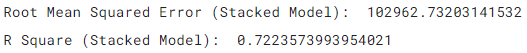

## MODEL STACKING : BASE LEARNER - XGB & LGBM, META LEARNER - LGBMRegressor

In [36]:
# import optuna
# from sklearn.metrics import mean_squared_error, r2_score
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# import numpy as np

# def xgb_objective(trial):
#     param_grid = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 150),
#         'learning_rate': trial.suggest_float('learning_rate', 0.03, 0.07),
#         'num_leaves': trial.suggest_int('num_leaves', 80, 100),
#         'max_depth': trial.suggest_categorical('max_depth', [1, 5, 8]),
#         'lambda_l1': trial.suggest_float('lambda_l1', 0, 0.05),
#         'lambda_l2': trial.suggest_float('lambda_l2', 0, 0.2),
#     }
#     model = XGBRegressor(**param_grid)
#     model.fit(x_train, y_train)
#     preds = model.predict(x_test)
#     return r2_score(y_test, preds)

# with warnings.catch_warnings():
#     warnings.filterwarnings("ignore", message="No further splits with positive gain, best gain: -inf")

#     def lgbm_objective(trial):
#         param_grid = {
#             'num_leaves': trial.suggest_int('num_leaves', 80, 160),
#             'n_estimators': trial.suggest_int('n_estimators', 200, 400),
#             'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 20, 60),
#             'max_depth': trial.suggest_categorical('max_depth', [-1, 5, 8, 12]),
#             'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.2),
#             'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.5, 2.0),
#             'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.5, 2.0)
#         }
#         model = LGBMRegressor(**param_grid)
#         model.fit(x_train, y_train)
#         preds = model.predict(x_test)
#         return r2_score(y_test, preds)

# xgb_study = optuna.create_study(study_name='XGB OPTUNA', direction='maximize')
# xgb_study.optimize(xgb_objective, n_trials=400)

# lgbm_study = optuna.create_study(study_name='LGBM OPTUNA', direction='maximize')
# lgbm_study.optimize(lgbm_objective, n_trials=400)

# best_xgb_params = xgb_study.best_params
# best_xgb_model = XGBRegressor(**best_xgb_params)
# best_xgb_model.fit(x_train, y_train)

# best_lgbm_params = lgbm_study.best_params
# best_lgbm_model = LGBMRegressor(**best_lgbm_params)
# best_lgbm_model.fit(x_train, y_train)

# xgb_preds = best_xgb_model.predict(x_test)
# lgbm_preds = best_lgbm_model.predict(x_test)

# stacked_features_train = np.column_stack((xgb_preds, lgbm_preds))

# meta_learner = LGBMRegressor()
# meta_learner.fit(stacked_features_train, y_test)

# stacked_features_test = np.column_stack((best_xgb_model.predict(x_test), best_lgbm_model.predict(x_test)))
# stacked_predictions = meta_learner.predict(stacked_features_test)

# print('LGBM Regressor As Meta Evaluation : ')
# print('Root Mean Squared Error (Stacked Model): ', np.sqrt(mean_squared_error(y_test, stacked_predictions)))
# print('R Square (Stacked Model): ', r2_score(y_test, stacked_predictions))

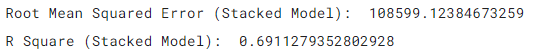

# Conclusion

* During this machine learning project, we tested different models such as XGBoost (XGB), LightGBM (LGBM), and Random Forest (RF) as our base models. 
* To improve the models' performance, we tuned the hyperparameters using Grid Search and Randomized Search methods.
* Additionally, we used Optuna to further enhance the model settings. 
* Our analysis showed that utilizing model stacking was the most successful approach.
* Our base learners were XgBoost and LightGBM.
* We experimented with different metal learners such as Random Forest, XGBoost, LightGBM, Linear Regression and Random Forest gave the best output.